In [16]:
## 分析 Fit-Hi-C, Mustache, Juicer, fanc 所鉴定的loop合集
import pandas as pd
# fithic_f=""
# mustache_f=""
# juicer_f=""
# fanc_f=""
# df_fithic = pd.read_csv(fithic_f, sep="\t", names=['chr1', 's1', 'e1', 'chr2', 's2', 'e2'])
# df_mustache = pd.read_csv(mustache_f, sep="\t")
# df_juicer = pd.read_csv(juicer_f, sep="\t")
# df_fanc = pd.read_csv(fanc_f, sep="\t")
# reaname columns
def re_col(df, tags):
    chr_id = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
    chr_n = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08', 'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13', 'Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04', 'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
    if tags == 'mustache':
        df_loops = df[['BIN1_CHR', 'BIN1_START', 'BIN1_END', 'BIN2_CHROMOSOME', 'BIN2_START', 'BIN2_END']].copy()
        df_loops.columns = ['chr1', 's1', 'e1', 'chr2', 's2', 'e2']
        df_loops['tags'] = [tags]*df_loops.shape[0]
        df_loops['chr1'].replace(chr_id, chr_n , inplace=True)
        df_loops['chr2'].replace(chr_id, chr_n , inplace=True)
        #print(df_loops)
        return df_loops
    if tags == 'fithic':
        df_loops = df.copy()
        df_loops['tags'] =[tags]*df_loops.shape[0]
        return df_loops
    if tags == 'juicer':
        df_loops = df[['#chr1', 'x1', 'x2', 'chr2', 'y1', 'y2']].copy()
        df_loops.columns = ['chr1', 's1', 'e1', 'chr2', 's2', 'e2']
        df_loops['tags'] =[tags]*df_loops.shape[0]
        return df_loops
    if tags == 'fanc':
        df_loop = df.copy()
        df_loops['tags'] =[tags]*df_loops.shape[0]
        return df_loops
# Data structure standardisation
# df_fithic_loop = re_col(df_fithic, 'fithic')
# df_mustache_loop = re_col(df_mustache, 'mustache')
# df_juicer_loop = re_col(df_juicer, 'juicer')
# df_fanc_loop = re_col(df_fanc, 'fanc')
# df_all_loop = df_fithic_loop.concat([df_mustache_loop, df_fithic_loop, df_fanc_loop], axis=1)
# choose_overlap_loops
def choose_overlap_loops(df):
    df_loop = df.copy()
    df_uniq_loop = df_loop.drop_duplicates(keep=False, subset=['chr1','s1', 'e1','chr2','s2', 'e2'])
    print(df_uniq_loop.shape[0])
    df_all_loop = pd.concat([df_loop, df_uniq_loop], axis=0)
    df_overlap_loop = df_all_loop.drop_duplicates(keep=False)
    df_need_loop = df_overlap_loop[['chr1','s1', 'e1','chr2','s2', 'e2']].copy()
    df_need_loop.drop_duplicates(keep='first', inplace=True)
    return df_need_loop

df_a = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/mustache/anthers.tsv", sep="\t")
df_b = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/fithic/anthers_15_00008_loop.bedpe", sep="\t", names=['chr1', 's1', 'e1', 'chr2', 's2', 'e2'])
df_c = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/juicer/enriched_pixels_3000.bedpe", sep='\t')
df_a_loop = re_col(df_a, 'mustache')
df_b_loop = re_col(df_b, 'fithic')
df_c_loop = re_col(df_c, 'juicer')
df_all_loop = pd.concat([df_a_loop, df_b_loop, df_c_loop], axis=0)
df_true_loop = choose_overlap_loops(df_all_loop)
print(df_true_loop.shape[0])

211724
5477


In [10]:
import pandas as pd
def choose_overlap_loops(df):
    df_loop = df.copy()
    #print(df_loop)
    df_uniq_loop = df_loop.drop_duplicates(keep=False, subset=['chr1','start1', 'end1','chr2','start2', 'end2'])
    #print(df_uniq_loop.shape[0])
    df_all_loop = pd.concat([df_loop, df_uniq_loop], axis=0)
    df_overlap_loop = df_all_loop.drop_duplicates(keep=False)
    df_need_loop = df_overlap_loop[['chr1','start1', 'end1','chr2','start2', 'end2']].copy()
    df_need_loop.drop_duplicates(keep='first', inplace=True)
    return df_need_loop
def overlap_loops(fithic, mustache,  chromosight, output_f):
    chr_id = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
    chr_idn = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13',
               'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chr23', 'chr24', 'chr25', 'chr26']
    chr_n = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08',
     'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13', 'Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04',
      'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
    # Fit-Hi-C
    df_fithic = pd.read_csv(fithic, sep='\t', names=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2'])
    # Mustache
    df_mustache = pd.read_csv(mustache, sep='\t', names=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2'])
    df_mustache['chr1'].replace(chr_id, chr_n, inplace=True)
    df_mustache['chr2'].replace(chr_id, chr_n, inplace=True)
    # Peakachu
    df_peakachu = pd.read_csv()
    
    #df_juicer = pd.read_csv(juicer, sep='\t', names=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2'])
    df_chromosight = pd.read_csv(chromosight, sep='\t', names=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2'])
    #df_LASCA = pd.read_csv(LASCA, sep="\t", names=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2'])
    df_fithic['tags'] = ['fithic']*df_fithic.shape[0]
    #df_juicer['tags'] = ['juicer']*df_juicer.shape[0]
    df_mustache['tags'] = ['mustache']*df_mustache.shape[0]
    df_chromosight['tags'] = ['chromosight']*df_chromosight.shape[0]
    #df_LASCA['tags'] = ['LASCA']*df_LASCA.shape[0]
    df_all = pd.concat([df_fithic, df_mustache, df_chromosight], axis=0)
   
    df_overlap = choose_overlap_loops(df_all)
    df_overlap.replace(chr_n, chr_id, inplace=True)
    
    ##将所有染色体名称替换
    df_all.replace(chr_n, chr_id, inplace=True)
    df_all.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/overlap_loop/{0}_all.csv".format(t), index=False)
    #print(df_overlap.shape[0])
    df_overlap.to_csv(output_f, sep="\t", index=False, header=False)
    return df_overlap

tissues = ['root', 'leaf', 'anthers', 'cotyledon', 'hypocotyl', 'stem', 'stigma', 'petal', 'fiber_10DPA', 'fiber_20DPA', 'ovule', 'radicle']
for t in tissues:
    fithic_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/fithic/{0}_10_0001_loop.bedpe".format(t)
    mustache_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/mustache/{0}_mustache.bed".format(t)
    #juicer_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/juicer/{0}_juicer.bed".format(t)
    chromosight_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/chromosight/{0}_chromosight.bed".format(t)
    #LASCA_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/LASCA/{0}_LASCA.bed".format(t)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/overlap_loop/{0}_overlap.bed".format(t)
    df_overlap = overlap_loops(fithic_f, mustache_f, chromosight_f, output_f)

In [6]:
#统计各overlap的数量
import pandas as pd
tissues = ['root', 'leaf', 'anthers', 'cotyledon', 'hypocotyl', 'stem', 'stigma', 'petal', 'fiber_10DPA', 'fiber_20DPA', 'ovule', 'radicle']
for t in tissues:
    df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/overlap_loop/{0}_overlap.bed".format(t), sep="\t")
    print(t, df.shape[0])

root 19977
leaf 16314
anthers 8215
cotyledon 25229
hypocotyl 9744
stem 13236
stigma 7842
petal 16065
fiber_10DPA 13992
fiber_20DPA 12530
ovule 19558
radicle 26855


In [8]:
## 合并Fit-Hi-C，Mustache，Chromosight和Peakachu前25% 的loop，以及四种软件鉴定的重叠loops
import pandas as pd
def choose_overlap_loops(df):
    df_loop = df.copy()
    df_uniq_loop = df_loop.drop_duplicates(keep=False, subset=['chr1','start1', 'end1','chr2','start2', 'end2'])
    df_all_loop = pd.concat([df_loop, df_uniq_loop], axis=0)
    df_overlap_loop = df_all_loop.drop_duplicates(keep=False)
    df_need_loop = df_overlap_loop[['chr1','start1', 'end1','chr2','start2', 'end2']].copy()
    df_need_loop.drop_duplicates(keep='first', inplace=True)
    df_need_loop.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']
    return df_need_loop
## 将overlap loop与前25% 的loops合并
def concat_25precent_overlap_loops(df, tags):
    chr_id = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
    chr_idn = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13',
               'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chr23', 'chr24', 'chr25', 'chr26']
    chr_n = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08',
    'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13', 'Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04',
    'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
    input_25f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/final_loops/25_precent/{}_fithic_mustache_chromsight_peakchu_loop.bed".format(tags)
    df_25_precent = pd.read_csv(input_25f, sep="\t")
    df_25_precent['chrom1'].replace(chr_id, chr_n , inplace=True)
    df_25_precent['chrom2'].replace(chr_id, chr_n , inplace=True)
    df_result = pd.concat([df, df_25_precent], axis=0)
    df_result.drop_duplicates(keep='first', inplace=True, subset=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2'])
    return df_result
def overlap_loops(fithic, mustache,  chromosight, peakachu, tags):
    chr_id = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
    chr_idn = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13',
               'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chr23', 'chr24', 'chr25', 'chr26']
    chr_n = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08',
     'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13', 'Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04',
      'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
    # Fit-Hi-C
    df_fithic = pd.read_csv(fithic, sep='\t', names=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2'])
    # Mustache
    df_mustache = pd.read_csv(mustache, sep='\t', names=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2'])
    df_mustache['chr1'].replace(chr_id, chr_n, inplace=True)
    df_mustache['chr2'].replace(chr_id, chr_n, inplace=True)
    # Peakachu
    df_peakachu = pd.read_csv(peakachu, sep="\t", names=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2'])
    df_peakachu.replace(chr_idn, chr_n, inplace=True)
    # chromsight
    df_chromosight = pd.read_csv(chromosight, sep='\t', names=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2'])
    # Add tags
    df_fithic['tags'] = ['fithic']*df_fithic.shape[0]
    df_peakachu['tags'] = ['peakachu']*df_peakachu.shape[0]
    df_mustache['tags'] = ['mustache']*df_mustache.shape[0]
    df_chromosight['tags'] = ['chromosight']*df_chromosight.shape[0]
    # print(df_fithic.head())
    # print(df_peakachu.head())
    # print(df_mustache.head())
    # print(df_chromosight.head())
    #df_all = pd.concat([df_fithic, df_mustache, df_chromosight], axis=0)
    df_all = pd.concat([df_fithic, df_mustache, df_chromosight, df_peakachu], axis=0)
    ## find overlap loops
    df_overlap = choose_overlap_loops(df_all)
    #print(df_overlap.shape[0])
    # concat loop
    df_overlap = concat_25precent_overlap_loops(df_overlap, tags)
    return df_overlap

tissues = ['anthers', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
for t in tissues:
    fithic_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/fithic/{0}_10_0001_loop.bedpe".format(t)
    mustache_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/mustache/{0}_mustache.bed".format(t)
    chromosight_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/chromosight/{0}_chromosight.bed".format(t)
    peakachu_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/peakachu/{0}_peakachu.bed".format(t)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/final_loops/{0}_final_loop.bed".format(t)
    df_overlap = overlap_loops(fithic_f, mustache_f, chromosight_f, peakachu_f, t)
    print(df_overlap.shape[0])
    df_overlap.to_csv(output_f, sep="\t", index=False)

118041
163830
139540
180537
154797
165406
175759
157033
160463
156524
142253
115527


In [20]:
## 将训练集合定义为3W条loops
import pandas as pd
tissues = ['root', 'leaf', 'anthers', 'cotyledon', 'hypocotyl', 'stem', 'stigma', 'petal', 'fiber_10DPA', 'fiber_20DPA', 'ovule', 'radicle']
for t in tissues:
    all_loop = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/overlap_loop/{0}_all.csv".format(t)
    over_loop = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/overlap_loop/{0}_overlap.bed".format(t)
    test_loop = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/overlap_loop/{0}_test.bed".format(t)
    df_all = pd.read_csv(all_loop)
    df_over = pd.read_csv(over_loop, sep="\t", names=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2'])
    #df_test = pd.read_csv(test_loop, sep="\t")
    df_all = df_all[['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2']].copy()
    df_all_over = pd.concat([df_all, df_over], axis=0)
    df_all_over.drop_duplicates(keep=False, inplace=True)
    samples = 30000 - df_over.shape[0]
    df_choose = df_all_over.sample(samples)
    df_test = pd.concat([df_choose, df_over], axis=0)
    df_test.sort_values(by=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2'], inplace=True)
    df_test.to_csv(test_loop, sep="\t", header=False, index=False)
    


In [38]:
tissues = ['root', 'anthers', 'cotyledon', 'hypocotyl']
chr_id = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chr23', 'chr24', 'chr25', 'chr26']
chr_n = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08', 'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13', 'Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04', 'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/peakachu/{}_peakechu.bed".format(t)
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/peakachu/{}.bed".format(t)
    df = pd.read_csv(input_f, sep="\t", names=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2', 'a', 'b'])
    df.replace(chr_id, chr_n , inplace=True)
    df.to_csv(output_f, sep="\t", index=False, columns=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2'])

In [ ]:
## 给peakachu的结果加上互作reads数目
import sys
interaction_f = sys.argv[1]
peakachu_f = sys.argv[2]
output_f = sys.argv[3]

df_interaction = pd.read_csv(interaction_f, sep="\t")
df_peakachu = pd.read_csv(peakachu_f, sep="\t", names=['chr1', 'start1', 'end1', 'chr2', 'start2', 'end2', 'k', 'p-value'])
chr_id = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chr23', 'chr24', 'chr25', 'chr26']
chr_n = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08', 'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13', 'Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04', 'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
df_peakachu.replace(chr_id, chr_n, inplace=True)
df_peakachu['fragmentMid1'] = df_peakachu['start1'] + 1500
df_peakachu['fragmentMid2'] = df_peakachu['start2'] + 1500
df_interaction['fragmentMid1'] = df_interaction['start1'] + 1500
df_interaction['fragmentMid2'] = df_interaction['start2'] + 1500

df_interaction_N = df_interaction[['chr1', 'fragmentMid1', 'chr2', 'fragmentMid2', 'contactCount']].copy()
df_peakachu_N = df_peakachu[['chr1', 'fragmentMid1', 'chr2', 'fragmentMid2',  'p-value']].copy()
df_result = pd.merge(df_peakachu_N, df_interaction_N, how='left', on=['chr1', 'fragmentMid1', 'chr2', 'fragmentMid2'])
df_result.to_csv(output_f, sep='\t', index=False)
df2 = df_result.dropna()
print(df_result.shape[0], df2.shape[0])



In [14]:
import pandas as pd
tissues = ['root', 'anthers', 'cotyledon', 'hypocotyl', 'leaf', 'stem', 'stigma', 'petal']
df = pd.DataFrame()
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/peakachu_hiACT/network/{}_final_network.txt".format(t)
    df_tmp = pd.read_csv(input_f, sep="\t", names=['source', 'target', 'weight'])
    df = pd.concat([df, df_tmp], axis=0)
df.drop_duplicates(keep='first', inplace=True)
df_A01 = df.query("source.str.contains('Ghir_A01') and target.str.contains('Ghir_A01')", engine='python').copy()
df_A01.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/peakachu_hiACT/louvain_clusting/A01_loop.nx", sep='\t', index=False)

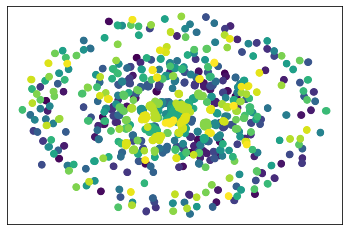

In [6]:
# loop Louvain community clustering
# Nutures
# 20220713

import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# load the karate club graph
G = nx.read_edgelist("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/peakachu_hiACT/louvain_clusting/A01_loop.nx", nodetype=str, data=(('weight', float),), create_using=nx.DiGraph())
# nx.draw(G)
# plt.show()
H = nx.Graph(G)
# #first compute the best partition
partition = community_louvain.best_partition(H)

# # compute the best partition
# partition = community_louvain.best_partition(G)

# # draw the graph
pos = nx.spring_layout(H)
# # color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(H, pos, partition.keys(), node_size=40,
                        cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(H, pos, alpha=0.5)
plt.show()

In [1]:
import pickle
import gzip

from examples import utils

import loompy
import pandas as pd
import numpy as np
import scipy.sparse as sp

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_table("G:/Billfish/VS_code_program/openTSNE-master/data/GSE63472_P14Retina_merged_digital_expression.txt.gz", index_col=0)
data.head()
cluster_ids = pd.read_table("G:/Billfish/VS_code_program/openTSNE-master/data/retina_clusteridentities.txt",  header=None, index_col=0, squeeze=True)


,r1_GGCCGCAGTCCG,r1_CTTGTGCGGGAA,r1_GCGCAACTGCTC,r1_GATTGGGAGGCA,r1_CCTCCTAGTTGG,r1_AGTCAAGCCCTC,r1_GTGCCGCCTCTC,r1_CCTGTGACACAC,r1_AATCTCGTTAAT,r1_GATTTCCTCTGA,...,p1_GAGGGGCTCTAA,p1_AGCCAAGGCTCG,p1_TGAGTCGTCTTA,p1_AACGGTCGCTTT,p1_CGAATACGTGTC,p1_TCAAAAGCCGGG,p1_ATTAAGTTCCAA,p1_CTGTCTGAGACC,p1_TAACGCGCTCCT,p1_ATTCTTGTTCTT
gene,,,,,,,,,,,,,,,,,,,,,
KITL,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
TMTC3,3,0,0,0,2,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
CEP290,1,3,0,2,1,18,10,3,4,3,...,0,0,0,0,0,0,0,0,0,0
4930430F08RIK,2,1,2,0,1,1,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
1700017N19RIK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from openTSNE import TSNE
from examples import utils
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


import gzip
import pickle

with gzip.open("data/macosko_2015.pkl.gz", "rb") as f:
    data = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/macosko_2015.pkl.gz'

In [111]:
## 统计各loops 类型
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t", names=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tags1', 'tags2', 'tissue'])
df['tags'] = df['tags1'].map(str) + "-" + df['tags2'].map(str)
#df['tags'].replace("N-G", "G-N", inplace=True)
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t", index=False)
# df['number'] = [1]*df.shape[0]
# df_result = df.groupby(by=['tissue', 'tags'], as_index=False)['number'].sum()
# df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type_statis.csv", index=False)

In [8]:
## 统计loop类型分为At和Dt两个亚基因组
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")
df['subg'] = df['chrom1'].apply(lambda x: 'At' if 'Ghir_A' in x else 'Dt')
df['tags'].replace(['N-G'], ['G-N'], inplace=True)
df_sta = pd.DataFrame(df[['tissues', 'subg', 'tags']].value_counts(), columns=['number'])
df_sta.reset_index(inplace=True)
df_sta.rename(columns={'tags':'sigs'}, inplace=True)
df_sta.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type_statis_subg.csv", index=False)

In [19]:
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t", columns=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tags1', 'tags2', 'tissue', 'tags'], index=False)

In [ ]:
### 分析各组织特异高活性TAD区间所包含的loops
tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'hypocotyl', 'leaf', 'ovule', 'petal', 'radicle', 'root', 'stem', 'stigma']
df_loop = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")
df_result = pd.DataFrame()
for i in tissues:
    input_region = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/TAD_new/TSG_TAD/TSG_TAD_region/{}_TAD_TSG_region.bed".format(i)
    df_region = pd.read_csv(input_region, sep="\t", names=['chrom', 'start', 'end'])
    for j in tissues:
        print(j)
        df_loop_tissue = df_loop.query("tissue==@j").copy()
        for index, row in df_region.iterrows():
            chrom, start, end = row['chrom'], row['start'], row['end']
            tad_tag = "{0}_{1}_{2}".format(chrom, start, end)
            df_tmp = df_loop_tissue.query("chrom1==@chrom & start1>=@start & end1<=@end & start2>=@start & end2<=@end")[['tissue', 'tags']].copy()
            df_tmp.columns = ['loop_tissue', 'gene_tags']
            df_tmp['TAD_tissue'] = [i]*df_tmp.shape[0]
            df_tmp['tad_tag'] = [tad_tag]*df_tmp.shape[0]
            df_result = pd.concat([df_result, df_tmp], axis=0)

In [42]:
## 统计loops数量以及loops在组织特异高活性TAD范围内出现互作的概率
df_result['number'] = [1]*df_result.shape[0]
df_statistics = df_result.groupby(by=['TAD_tissue', 'loop_tissue', 'gene_tags'], as_index=False)['number'].sum()
tissue = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
loop_number = [118041, 163830, 139540, 180537, 154797, 165406, 175759, 157033, 160463, 156524, 142253, 115527]
df_out = pd.DataFrame()
for i in range(12):
    T, N = tissue[i], loop_number[i]
    df_tmp = df_statistics.query("loop_tissue == @T").copy()
    df_tmp['total_number'] = [N]*df_tmp.shape[0]
    df_out = pd.concat([df_out, df_tmp], axis=0)
df_out['ratio'] = df_out['number']/df_out['total_number']
df_loop_type = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type_statis.csv")
df_loop_type.columns = ['loop_tissue', 'gene_tags', 'loop_type_number']
df_out = pd.merge(df_out, df_loop_type, how='left', on=['loop_tissue', 'gene_tags'])
df_out['type_ratio'] = df_out['number']/df_out['loop_type_number']
df_out.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/TSG/J668_TSG_TAD_loop_number_ratio.csv", index=False)

In [9]:
### 分析各loop anchor 位点所出现的次数
import pandas as pd
def loop_anchor_number(df_loop):
    df_loop['anchor1'] = df_loop['chrom1'].map(str) + "-" + df_loop['start1'].map(str) + "-" + df_loop['end1'].map(str)
    df_loop['anchor2'] = df_loop['chrom2'].map(str) + "-" + df_loop['start2'].map(str) + "-" + df_loop['end2'].map(str)
    df_a, df_b = df_loop[['anchor1']].copy(), df_loop[['anchor2']].copy()
    df_a.rename(columns={'anchor1':'anchor'}, inplace=True)
    df_b.rename(columns={'anchor2':'anchor'}, inplace=True)
    df_c = pd.concat([df_a, df_b], axis=0)
    df_c['number'] = [1]*df_c.shape[0]
    df_return = df_c.groupby(by=['anchor'], as_index=False)['number'].sum()
    df_return.sort_values(by=['number'], ascending=False, inplace=True)
    return df_return
tissues = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/final_loops/{}_final_loop.bed".format(t)
    df = pd.read_csv(input_f, sep="\t")
    df_tmp = loop_anchor_number(df)
    df_tmp['tissues'] = [t]*df_tmp.shape[0] 
    df_result = pd.concat([df_result, df_tmp], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/J668_loop_anchor_number.csv".format(t), index=False)

In [41]:
## 各loop anchor 打上不同的标签
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/J668_loop_anchor_number.csv")
tissues =  ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
for t in tissues:
    df_tissue = df.query("tissues==@t").copy()
    df_tissue.sort_values(by='number', ascending=False)
    #N = df_tissue.shape[0]*0.03
    ## 选择大于5的视为高频互作区域，并将高频互作区域设置等级，再分析其区间所包含的基因，在分析其表达, 梯度设置： 1-5， 6-10， 10-15，15-20，大于20
    df_tissue['tags'] = df_tissue['number'].apply(lambda x: 1 if x<5 else (2 if (5<=x<10) else (3 if (10<=x<15) else (4 if (15<=x<20) else 5))))
    df_tissue[['chr', 'start', 'end']] = df_tissue['anchor'].str.split("-", expand=True)
    df_tissue = df_tissue[['chr', 'start', 'end', 'tags', 'tissues']].copy()
    df_result = pd.concat([df_result, df_tissue], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/J668_all_loop_anchor.bed", sep="\t", index=False, header=False)

In [50]:
## 对loop anchor 富集到的基因打上loop anchor的标签，然后再分析其表达水平
import pandas as pd
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM_long.csv")
df_loopanchor_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/J668_loop_anchor_gene.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId', 'tissues', 'anchor_order'])
df_loopanchor_gene = df_loopanchor_gene[['GeneId', 'tissues', 'anchor_order']].copy()
df = pd.merge(df_gene, df_loopanchor_gene, how='left', on=['GeneId', 'tissues'])
df.fillna(0, inplace=True)
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/J668_gene_loop_anchor_number.csv", index=False)

In [55]:
## 统计基因所受到的loop调控数目 (所有)
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/J668_loop_anchor_gene.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId', 'tissues', 'size'])
df['number'] = [1]*df.shape[0]
df_result = df.groupby(by=['tissues', 'size'], as_index=False)['number'].sum()
print(df_result)


        tissues  size  number
0        anther     1   32856
1        anther     2     304
2        anther     3     105
3        anther     4      33
4        anther     5       8
5     cotyledon     1   42568
6     cotyledon     2     871
7     cotyledon     3     128
8     cotyledon     4      72
9     cotyledon     5      27
10  fiber_10DPA     1   36898
11  fiber_10DPA     2     389
12  fiber_10DPA     3     108
13  fiber_10DPA     4      46
14  fiber_10DPA     5       6
15  fiber_20DPA     1   34458
16  fiber_20DPA     2     380
17  fiber_20DPA     3     114
18  fiber_20DPA     4      52
19  fiber_20DPA     5      17
20    hypocotyl     1   38886
21    hypocotyl     2     632
22    hypocotyl     3     139
23    hypocotyl     4      68
24    hypocotyl     5      15
25         leaf     1   42556
26         leaf     2     957
27         leaf     3     140
28         leaf     4      88
29         leaf     5      38
30        ovule     1   46257
31        ovule     2     881
32        

In [63]:
## 统计基因受到loop的调控次数，所有组织都用7K 个锚点，并统计平均数
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/7K_anchor/J668_gene_7Kanchor_number.bed", sep="\t", names=['anchor_id', 'anchor_number', 'tissues', 'sampleid'])
df_result = df.groupby(by=['tissues', 'anchor_id'], as_index=False)['anchor_number'].mean()
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/7K_anchor/J668_gene_7Kanchor_ratio.bed", sep="\t", index=False)
## 求和
df_result['tags'] = df_result['anchor_id'].apply(lambda x: 1 if x<5 else (2 if (5<=x<10) else (3 if (10<=x<15) else (4 if (15<=x<20) else (5 if (20<=x<=25) else 6 )))))
df_result2 = df_result.groupby(by=['tissues', 'tags'], as_index=False)['anchor_number'].sum()
df_result2.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/7K_anchor/J668_gene_7Kanchor_ratio_order.csv", index=False)

In [121]:
## 随着loop互作增加，基因表达水平的变化情况
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/step2/J668_gene_loop_anchor_number_final.bed", sep="\t")
df_tmp = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM_long.csv")
df_result = pd.merge(df, df_tmp, how='inner', on=['GeneId', 'tissues'])
df_result['tags'] = df_result['number'].apply(lambda x: x if x<=7 else ">=8")
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/step2/J668_gene_loop_anchor_tpm.csv", index=False)

In [120]:
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/step2/J668_gene_loop_anchor_number_final.bed", sep="\t")
df['size'] = [1]*df.shape[0]
df_result = df.groupby(by=['tissues', 'number'], as_index=False)['size'].sum()
print(df_result.head(40))

      tissues  number   size
0      anther       0  37043
1      anther       1  18442
2      anther       2   8386
3      anther       3   3680
4      anther       4   1446
5      anther       5    547
6      anther       6    242
7      anther       7    131
8      anther       8     64
9      anther       9     49
10     anther      10     40
11     anther      11     25
12     anther      12     25
13     anther      13     17
14     anther      14     13
15     anther      15     16
16     anther      16     11
17     anther      17      4
18     anther      18      6
19     anther      19      3
20     anther      20      2
21     anther      21      2
22     anther      22      1
23     anther      24      3
24     anther      30      1
25  cotyledon       0  27129
26  cotyledon       1  18320
27  cotyledon       2  11174
28  cotyledon       3   6170
29  cotyledon       4   3333
30  cotyledon       5   1790
31  cotyledon       6    944
32  cotyledon       7    502
33  cotyledon 

In [98]:
## 分析高频loop互作基因差异表达
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/step2/J668_gene_loop_anchor_tpm.csv")
df['freq'] = df['tags'].apply(lambda x: 'high' if x>=6 else 'low')
df_20DPA_ovule = df.query("(tissues=='fiber_20DPA' | tissues=='ovule') & (freq=='high')")[['GeneId', 'tissues', 'freq']].copy()
#print(df_20DPA_ovule.drop_duplicates(keep=False, subset=['GeneId', 'freq']))
print(df_20DPA_ovule.shape[0])
df_20DPA_ovule.drop_duplicates(keep=False, subset=['GeneId', 'freq'], inplace=True)
print(df_20DPA_ovule.shape[0])
df_tpm = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM_long.csv")
df_20DPA_ovule_tpm = df_tpm.query("tissues=='fiber_20DPA' | tissues=='ovule'").copy()
df_tmp = pd.merge(df_20DPA_ovule_tpm, df_20DPA_ovule[['GeneId']], how='inner', on=['GeneId'])
print(df_tmp.head())
print(df_tmp.shape[0])
print(df_20DPA_ovule.head())
df_result = pd.merge(df_tmp, df_20DPA_ovule, how='left', on=['GeneId', 'tissues'])
print(df_result.shape[0])
df_result.fillna('low', inplace=True)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/step2/J668_20DPA_ovule_diff_anchor.csv", index=False)


695
539
            GeneId      tissues        TPM
0  Ghir_A01G001070        ovule  13.161481
1  Ghir_A01G001070  fiber_20DPA   4.722409
2  Ghir_A01G002570        ovule   0.626373
3  Ghir_A01G002570  fiber_20DPA   0.174301
4  Ghir_A01G003990        ovule   4.545330
1078
                 GeneId tissues  freq
491499  Ghir_A01G001070   ovule  high
491649  Ghir_A01G002570   ovule  high
491791  Ghir_A01G003990   ovule  high
491813  Ghir_A01G004210   ovule  high
492163  Ghir_A01G007710   ovule  high
1078


In [123]:
### 分析不表达的基因，与表达的基因其各loop anchor的比例
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/step2/J668_gene_loop_anchor_tpm.csv")
df['tags2'] = df['TPM'].apply(lambda x: "exp" if x>=0.5 else 'Nexp')
df['number'] = [1]*df.shape[0]
df_result = df.groupby(by=['tissues', 'tags2', 'tags'], as_index=False)['number'].sum()
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/step2/J668_exp_Nexp_loopanchor.csv", index=False)

In [126]:
### 举例说明
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/step2/J668_gene_loop_anchor_number_final.bed", sep="\t")
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM.csv")
df_20DPA_ovule = df_gene[['GeneId', 'fiber_20DPA', 'ovule']].copy()
df_20DPA = df.query("tissues=='fiber_20DPA'")[['chrom', 'start', 'end', 'GeneId', 'number']].copy()
df_ovule = df.query("tissues=='ovule'")[['chrom', 'start', 'end', 'GeneId', 'number']].copy()
df_20DPA.rename(columns={'number':'fiber_20DPA_n'}, inplace=True)
df_ovule.rename(columns={'number':'ovule_n'}, inplace=True)
df_20DPA_ovule_n = pd.merge(df_20DPA, df_ovule, how='inner', on=['chrom', 'start', 'end', 'GeneId'])
df_tmp = pd.merge(df_20DPA_ovule_n, df_20DPA_ovule, how='inner', on=['GeneId'])
# df_ovule_high = df_tmp.query("0<ovule_n<=2 & fiber_20DPA_n==0 & ovule>fiber_20DPA")
# df_20DPA_high = df_tmp.query("0<ovule_n<=2 & fiber_20DPA_n>=6 & ovule>fiber_20DPA")
df_ovule_high = df_tmp.query("ovule_n>fiber_20DPA_n & ovule>fiber_20DPA")
df_20DPA_high = df_tmp.query("ovule_n<fiber_20DPA_n & ovule>fiber_20DPA")
df_ovule_high.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/step2/ovule_HTPM_Hloop_20DPA.bed", sep="\t", index=False)
df_20DPA_high.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/step2/ovule_HTPM_Lloop_20DPA.bed", sep="\t", index=False)

In [129]:
## 分析各组织loop长度的变化及其密度
import pandas as pd
tissues =  ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/final_loops/{}_final_loop.bed".format(t)
    df = pd.read_csv(input_f, sep="\t")
    df['length'] = df['start2'] - df['start1']
    df['subg'] = df['chrom1'].apply(lambda x: 'At' if 'Ghir_A' in str(x) else 'Dt')
    df['tissues'] = [t]*df.shape[0]
    df_result = pd.concat([df_result, df], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/J668_loop_length.csv", index=False)

In [148]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/J668_loop_length.csv")
df_result = pd.DataFrame(columns=['start', 'end', 'number','tissues' ])
for t in tissues:
    df_tissue = df.query("tissues==@t")
    for i in range(0, 4000000, 100000):
        start, end = i, i+100000
        df_tmp = df_tissue.query("@start<=length<@end")
        result_list = [start, end, df_tmp.shape[0], t]
        #print(result_list)
        df_result.loc[df_result.shape[0] ,: ] = result_list
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/J668_density.csv", index=False)

In [18]:
## 将染色质loop分为小于100Kb的短程互作，和大于100Kb的长程互作，并分析短程互作和长程互作中GG GN NN 之间的占比
import pandas as pd
df_loop = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/J668_loop_length.csv")
df_loop['tags'] = df_loop['length'].apply(lambda x: "long" if x>=100000 else 'short')
df_loop_type = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")
df_loop_type = df_loop_type[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissue', 'tags']]
df_loop_type.rename(columns={'tissue':'tissues', 'tags':'loop_type'}, inplace=True)
df_tmp = pd.merge(df_loop, df_loop_type, how='inner', on=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues'])
df_tmp.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type_all.csv", index=False)
df_tmp['number'] = [1]*df_tmp.shape[0]
## 长程与短程loop 关于不同类型的loop占比
df_result = df_tmp.groupby(by=['tissues', 'tags', 'loop_type'], as_index=False)['number'].sum()
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/J668_loop_length_type.csv", index=False)

## 不同组织的两个亚基因组关于长程和短程互作的占比情况
df_result2 = df_tmp.groupby(by=['tissues', 'tags', 'subg'], as_index=False)['number'].sum()
df_result2.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/J668_loop_length_type2.csv", index=False)

In [19]:
df_loop = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/J668_loop_length.csv")
df_loop_type = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")
df_loop_type = df_loop_type[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissue', 'tags']]
df_loop_type.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues', 'tags']
df_result = pd.merge(df_loop, df_loop_type, how='inner', on=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues'])
print(df_result)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/J668_loop_length_type3.csv")

           chrom1    start1      end1    chrom2    start2      end2  length  \
0        Ghir_A01     24000     27000  Ghir_A01     45000     48000   21000   
1        Ghir_A01    546000    549000  Ghir_A01    576000    579000   30000   
2        Ghir_A01   1059000   1062000  Ghir_A01   1092000   1095000   33000   
3        Ghir_A01   1074000   1077000  Ghir_A01   1209000   1212000  135000   
4        Ghir_A01   1248000   1251000  Ghir_A01   1563000   1566000  315000   
...           ...       ...       ...       ...       ...       ...     ...   
1829705  Ghir_D07  22206000  22209000  Ghir_D07  22380000  22383000  174000   
1829706  Ghir_A13  33291000  33294000  Ghir_A13  33324000  33327000   33000   
1829707  Ghir_D07  46671000  46674000  Ghir_D07  46782000  46785000  111000   
1829708  Ghir_D07  38325000  38328000  Ghir_D07  38370000  38373000   45000   
1829709  Ghir_A03  69513000  69516000  Ghir_A03  69534000  69537000   21000   

        subg tissues tags  
0         At  anther  N

In [17]:
## 分析不同长度下G-G, G-N 比例的变化
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/J668_loop_length_type3.csv")
tissues = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
for t in tissues:
    for i in range(0, 980000, 30000):
        j = 30000 + i
        df_tmp = df.query("length>=@i & length<=@j & tissues==@t").copy()
        df_tmp['number'] = [1]*df_tmp.shape[0]
        df_tmp2 = df_tmp.groupby(by=['tags'], as_index=False)['number'].sum()
        total_number = df_tmp.shape[0]
        df_tmp2['ratio'] = df_tmp2['number']/total_number
        df_tmp2['x_lab'] = [i]*df_tmp2.shape[0]
        df_tmp2['tissues'] = [t]*df_tmp2.shape[0]
        df_result = pd.concat([df_result, df_tmp2], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/J668_loop_gradient_ratio.csv", index=False)

In [14]:
# 调整A/B compartment 格式
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/compartment/J668_all_loop_cpt.bed", sep="\t", names =['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues', 'tags1', 'tags2'])
df['tags'] = df['tags1'].map(str) + '-' + df['tags2'].map(str)
df['tags'].replace('B-A', 'A-B', inplace=True)
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/compartment/J668_all_loop_cpt.bed", sep="\t", columns=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues', 'tags'])

In [19]:
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/compartment/J668_all_loop_cpt.bed", sep="\t")
df['length'] = df['start2'] - df['start1']
df['subg'] = df['chrom1'].apply(lambda x: 'At' if 'Ghir_A' in str(x) else 'Dt')
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/compartment/J668_all_loop_cpt3.bed", sep="\t", index=False)

In [21]:
## 不同长度下A-A, A-B, B-B 比例的变化
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/compartment/J668_all_loop_cpt3.bed", sep="\t")
tissues = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
for t in tissues:
    for i in range(0, 980000, 30000):
        j = 30000 + i
        df_tmp = df.query("length>=@i & length<=@j & tissues==@t").copy()
        df_tmp['number'] = [1]*df_tmp.shape[0]
        df_tmp2 = df_tmp.groupby(by=['tags'], as_index=False)['number'].sum()
        total_number = df_tmp.shape[0]
        df_tmp2['ratio'] = df_tmp2['number']/total_number
        df_tmp2['x_lab'] = [i]*df_tmp2.shape[0]
        df_tmp2['tissues'] = [t]*df_tmp2.shape[0]
        df_result = pd.concat([df_result, df_tmp2], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/length_density/compartment/J668_all_loop_cpt_density.csv", index=False)

In [159]:
## 分析保守的loops
import pandas as pd
tissues = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/final_loops/{}_gene_loop.bed".format(t)
    df_t = pd.read_csv(input_f, sep="\t")
    df_t['tissues'] = [t]*df_t.shape[0]
    df_result = pd.concat([df_result, df_t], axis=0)
print(df_result.shape[0])
# df_result['number'] = [1]*df_result.shape[0]
# df_a = df_result.groupby(by=['chrom1','start1','end1','chrom2','start2','end2'], as_index=False)['number'].sum()
# print(df_a)
df_result.drop_duplicates(keep=False, subset=['chrom1','start1','end1','chrom2','start2','end2'], inplace=True)
print(df_result.shape[0])


685775
403730


In [3]:
## 将loop anchor划分为以tab为分隔符的文件
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/J668_loop_anchor_number.csv")
df[['chrom', 'start', 'end']] = df['anchor'].str.split("-", expand=True)
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/J668_loop_anchor_number.bed", sep="\t", index=False, header=False, columns=['chrom', 'start', 'end', 'tissues', 'number', 'anchor'])

In [11]:
## 统计各层级下ATAC-peaks的分布
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/ATAC/J668_loop_anchor_ATAC.bed", sep="\t", names=['chrom', 'start', 'end', 'tissues', 'anchor_number', 'ATAC_number'])
df['anchor_tags'] = df['anchor_number'].apply(lambda x: x if x<=7 else ">=8")
df['ATAC_peaks'] = df['ATAC_number'].apply(lambda x: 'peak' if x>0 else 'nopeak')
df['number'] = [1]*df.shape[0]
#df['number'] = df['ATAC_number'].apply(lambda x: x if x>0 else 1)
df_result = df.groupby(by=['tissues', 'anchor_tags', 'ATAC_peaks'], as_index=False)['number'].sum()
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/ATAC/J668_loop_anchor_ATAC_number.csv", index=False)

In [13]:
## 统计各层级下H3K27ac的分布
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/ChIP/J668_loop_anchor_H3K27ac.bed", sep="\t", names=['chrom', 'start', 'end', 'tissues', 'anchor_number', 'ChIP_number'])
df['anchor_tags'] = df['anchor_number'].apply(lambda x: x if x<=7 else ">=8")
df['ChIP_peaks'] = df['ChIP_number'].apply(lambda x: 'peak' if x>0 else 'nopeak')
df['number'] = [1]*df.shape[0]
#df['number'] = df['ATAC_number'].apply(lambda x: x if x>0 else 1)
df_result = df.groupby(by=['tissues', 'anchor_tags', 'ChIP_peaks'], as_index=False)['number'].sum()
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/ChIP/J668_loop_anchor_H3K27ac_number.csv", index=False)

In [17]:
## 统计各层级下H3K4me3的分布
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/ChIP/J668_loop_anchor_H3K4me3.bed", sep="\t", names=['chrom', 'start', 'end', 'tissues', 'anchor_number', 'ChIP_number'])
df['anchor_tags'] = df['anchor_number'].apply(lambda x: x if x<=7 else ">=8")
df['ChIP_peaks'] = df['ChIP_number'].apply(lambda x: 'peak' if x>0 else 'nopeak')
df['number'] = [1]*df.shape[0]
#df['number'] = df['ATAC_number'].apply(lambda x: x if x>0 else 1)
df_result = df.groupby(by=['tissues', 'anchor_tags', 'ChIP_peaks'], as_index=False)['number'].sum()
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/ChIP/J668_loop_anchor_H3K4me3_number.csv", index=False)

In [22]:
## 统计各层级下subCpt的分布
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/subCpt/J668_loop_anchor_subcpt.bed", sep="\t", names=['chrom', 'start', 'end', 'tissues', 'anchor_number', 'subCpt_tags'])
print(df.shape[0])
df.drop_duplicates(keep='last', inplace=True, subset=['chrom', 'start', 'end', 'tissues'])
print(df.shape[0])
df['anchor_tags'] = df['anchor_number'].apply(lambda x: x if x<=7 else ">=8")
df['number'] = [1]*df.shape[0]
#df['number'] = df['ATAC_number'].apply(lambda x: x if x>0 else 1)
df_result = df.groupby(by=['tissues', 'anchor_tags', 'subCpt_tags'], as_index=False)['number'].sum()
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/subCpt/J668_loop_anchor_subCpt.csv", index=False)

599057
556338


In [53]:
## 以stigma 和 hypocotyl 为例子
## 主要目的是找到一个基因在stigma和hypocotyl上具有loop anchor 差异，并且同时具有ATAC-Seq、H3K27ac、H3K4me3 peaks 修饰上的差异
# 1、loop anchor 数目有差异， hypocotyl stigma 为例子
df_anchor = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/step2/J668_gene_loop_anchor_tpm.csv")
df_hypocotyl = df_anchor.query("tissues=='hypocotyl'")[['chrom', 'start', 'end', 'GeneId', 'number']].copy()
df_stigma = df_anchor.query("tissues=='stigma'")[['chrom', 'start', 'end', 'GeneId',  'number']].copy()

df_hypocotyl.columns = ['chrom', 'start', 'end', 'GeneId', 'hypocotyl_anchor']
df_stigma.columns = ['chrom', 'start', 'end', 'GeneId', 'stigma_anchor']
df_hypo_stig = pd.merge(df_hypocotyl, df_stigma, how='inner', on=['chrom', 'start', 'end', 'GeneId'])
df_hypo_stig['number'] = df_hypo_stig['hypocotyl_anchor'] - df_hypo_stig['stigma_anchor']
df_hypo_stig['anchor_N'] = df_hypo_stig['number'].apply(lambda x: 'hypocotyl' if x>0 else ('stigma' if x<0 else None))
df_hypo_stig.dropna(inplace=True)
print(df_hypo_stig.shape[0])
# 2、打上差异表达标签
df_DEG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/DEG/tissue/hypocotyl_stigma_DEG.csv")
old_tags, new_tags = ['Up', 'Down', 'Not'], ['stigma', 'hypocotyl', None]
df_DEG['sig'].replace(old_tags, new_tags, inplace=True)
df_DEG.dropna(inplace=True)
df_DEG = df_DEG[['GeneId', 'sig']].copy()
df_DEG.columns = ['GeneId', 'DEG']
df_hypo_stig = pd.merge(df_hypo_stig, df_DEG, how='inner', on=['GeneId'])
print(df_hypo_stig.shape[0])
# 3、打上差异的ATAC-Seq 标签
df_ATAC = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/ATAC/diffpeaks/gene/hypocotyl_stigma_annotation_gene.bed", sep=" ")
df_ATAC = df_ATAC.query("annotation!='Distal Intergenic'")[['geneId', 'V4']].copy()
df_ATAC.columns = ['GeneId', 'ATAC']
old_tags = ['-', '+']
new_tags = ['hypocotyl', 'stigma']
df_ATAC['ATAC'].replace(old_tags, new_tags, inplace=True)
df_hypo_stig = pd.merge(df_hypo_stig, df_ATAC, how='inner', on=['GeneId'])
print(df_hypo_stig.shape[0])

# 4、打上H3K27ac的标签
df_H3K27ac = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/Chip_Seq/diffbind/H3K27ac/rawdata/hypocotyl_stigma_H3K27ac_DiffPeaks_annotation.bed", sep=" ")
df_H3K27ac = df_H3K27ac.query("annotation!='Distal Intergenic'")[['geneId', 'V4']].copy()
df_H3K27ac.columns = ['GeneId', 'H3K27ac']
old_tags = ['-', '+']
new_tags = ['hypocotyl', 'stigma']
df_H3K27ac['H3K27ac'].replace(old_tags, new_tags, inplace=True)
df_hypo_stig = pd.merge(df_hypo_stig, df_H3K27ac, how='inner', on=['GeneId'])
print(df_hypo_stig.head())
df_hypo_stig_hypocotyl = df_hypo_stig.query("(number>0 & DEG=='hypocotyl' & ATAC=='hypocotyl' & H3K27ac=='hypocotyl') | (number>0 & DEG=='stigma' & ATAC=='stigma' & H3K27ac=='stigma')")
print(df_hypo_stig_hypocotyl.shape[0])
df_hypo_stig_stigma = df_hypo_stig.query("(number<0 & DEG=='stigma' & ATAC=='stigma' & H3K27ac=='stigma') | (number<0 & DEG=='hypocotyl' & ATAC=='hypocotyl' & H3K27ac=='hypocotyl')")
print(df_hypo_stig_stigma.shape[0])
print(df_hypo_stig_stigma.drop_duplicates(keep='first', subset=['GeneId']).shape[0])
df_hypo_stig_stigma.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/hypocotyl_stigma_example/hypo_stig_stigma.bed", sep="\t", columns=['chrom', 'start', 'end', 'GeneId'], index=False, header=False)
df_hypo_stig_hypocotyl.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/hypocotyl_stigma_example/hypo_stig_hypocotyl.bed", sep="\t", columns=['chrom', 'start', 'end', 'GeneId'], index=False, header=False)

40301
17466
2624
      chrom     start       end           GeneId  hypocotyl_anchor  \
0  Ghir_A01   1665417   1669273  Ghir_A01G001860                 1   
1  Ghir_A01   1665417   1669273  Ghir_A01G001860                 1   
2  Ghir_A01   1665417   1669273  Ghir_A01G001860                 1   
3  Ghir_A01   1665417   1669273  Ghir_A01G001860                 1   
4  Ghir_A01  12650994  12656148  Ghir_A01G007520                 0   

   stigma_anchor  number   anchor_N        DEG       ATAC    H3K27ac  
0              0       1  hypocotyl  hypocotyl  hypocotyl  hypocotyl  
1              0       1  hypocotyl  hypocotyl  hypocotyl  hypocotyl  
2              0       1  hypocotyl  hypocotyl  hypocotyl  hypocotyl  
3              0       1  hypocotyl  hypocotyl  hypocotyl  hypocotyl  
4              2      -2     stigma  hypocotyl  hypocotyl  hypocotyl  
135
82
65


In [ ]:
## 整理所有bin所能包含的信号
import sys
import pandas as pd
inp_f=sys.argv[1]
out_f=sys.argv[2]
df_result = pd.DataFrame()
for line in open(inp_f):
    f1, name = line.strip().split("\t")[0], line.strip().split("\t")[1]
    df = pd.read_csv(f1, sep="\t", name=['chrom', 'start', 'end', name])
    if df_result.shape[0] == 0:
        df_result = df.copy()
    else:
        df_result = pd.merge(df_result, df, how='inner', on=['chrom', 'start', 'end'])
df_result.to_csv(out_f, sep="\t", index=False)

In [5]:
## 分析cis-element 原件
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_3kbin_all_signal_simple.bed", sep="\t")
df_cis = df.query("gene==0 & loop>0 & (H3K4me3>0 | H3K27ac>0 | ATAC>0)").copy()
df_cis.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_cis.bed", sep="\t", index=False)

In [3]:
### 找到每个组织的cis调控元件
import pandas as pd
import numpy as np
df = pd.read_csv("G:\Billfish\J668_multip_tissue_3D-genome\HiC\loops\Cis-element\J668_3kbin_all_signal.bed", sep="\t")
all_name = df.columns.to_list()
tissues = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
for t in tissues:
    for j in 'ATAC', 'H3K27ac', 'H3K4me3', 'loop':
        N = "{0}_{1}".format(t, j)
        if N not in all_name:
            df[N] = [0]*df.shape[0]
df_NG = df.query("gene==0").copy()
for t in tissues:
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/{}_Cis.bed".format(t)
    A_tag, K27_tag, K4_tag, l_tag = "{}_ATAC".format(t), "{}_H3K27ac".format(t), "{}_H3K4me3".format(t), "{}_loop".format(t)
    df_tmp = df_NG[(df_NG[l_tag]>0) & ((df_NG[A_tag]>0) | (df_NG[K27_tag] > 0) | (df_NG[K4_tag] > 0))]
    df_tmp.to_csv(output_f, sep="\t", columns=['chrom', 'start', 'end'], index=False)


In [19]:
## 总结各个组织的活性cis调控元件和非活性cis调控元件
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_cis.bed", sep="\t")
df = df[['chrom', 'start', 'end']].copy()
tissues = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/{}_Cis.bed".format(t)
    df_T = pd.read_csv(input_f, sep="\t")
    df_T['sigs'] = ['active']*df_T.shape[0]
    df_tmp = pd.merge(df, df_T, how='left', on=['chrom', 'start', 'end'])
    df_tmp['tissues'] = [t]*df_tmp.shape[0]
    df_tmp.fillna("inactive", inplace=True)
    df_result = pd.concat([df_result, df_tmp], axis=0)
df_result['subg'] = df_result['chrom'].apply(lambda x: 'At' if 'Ghir_A' in x else 'Dt')
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_active_cis.csv", index=False)

## 统计各组织active 和inactive cis的占比
df_sta = pd.DataFrame(df_result[['tissues', 'subg', 'sigs']].value_counts(), columns=['number'])
df_sta.reset_index(inplace=True)
df_sta.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_active_cis_sta.csv", index=False)

In [3]:
## 分析基因受到的loop 调控方式，1：G-G、2：G-Cis、3: G-N、4：G-N-G、5：G-N-Cis、6：G-N-N、7：G-noloop

import pandas as pd
import sys

## 对非基因区域打上标签，1、间接与基因相关；2、无相关；3、间接与Cis-element相关；4、间接与非基因区相关及其它

# 1、间接与基因相关
def NG(df, df_cis):
    df, df_cis =df.copy(), df_cis.copy()
    df_GN = df.query("tags1=='G' & tags2=='N'")[['chrom2', 'start2', 'end2']].copy()
    df_NG = df.query("tags1=='N' & tags2=='G'")[['chrom1', 'start1', 'end1']].copy()
    df_GN.columns = ['chrom', 'start', 'end']
    df_NG.columns = ['chrom', 'start', 'end']
    df_GN1 = pd.concat([df_GN, df_NG], axis=0)
    df_GN1['number'] = [1]*df_GN1.shape[0]
    df_GN = df_GN1.groupby(by=['chrom', 'start', 'end'], as_index=False)['number'].sum()
    df_GNG = df_GN.query("number>1")[['chrom', 'start', 'end']].copy()
    df_GNG.drop_duplicates(keep='first', inplace=True)
    ## 去除其中N端是Cis anchor
    df_return = pd.concat([df_GNG, df_cis, df_cis], axis=0)
    df_return.drop_duplicates(keep=False, inplace=True)
    #print(df_return)
    return df_return

# 2、确定仅与基因相关的loop anchoer
def Gnone(df, df_cis):
    df = df.copy()
    df_cis = df_cis.copy()
    df_GN = df.query("tags1=='G' & tags2=='N'")[['chrom2', 'start2', 'end2']].copy()
    df_NG = df.query("tags1=='N' & tags2=='G'")[['chrom1', 'start1', 'end1']].copy()
    df_GN.columns = ['chrom', 'start', 'end']
    df_NG.columns = ['chrom', 'start', 'end']
    df_GN1 = pd.concat([df_GN, df_NG], axis=0) ## 1、找到与基因相关的loop anchor
    # df_test = df_GN1.copy()
    # df_test.drop_duplicates(inplace=True)
    # print(df_test.shape[0])

# 3、去掉与NN loop相关重合的anchor
    df_NN = df.query("tags1=='N' & tags2=='N'").copy()
    df_NN1 = df_NN[['chrom1', 'start1', 'end1']].copy()
    df_NN2 = df_NN[['chrom2', 'start2', 'end2']].copy()
    df_NN1.columns = ['chrom', 'start', 'end']
    df_NN2.columns = ['chrom', 'start', 'end']
    #print(df_NN1)
    df_NN = pd.concat([df_NN1, df_NN2], axis=0)
    df_Gnone = pd.concat([df_NN, df_NN, df_GN1], axis=0)
    df_Gnone.drop_duplicates(keep=False, inplace=True)
    #去掉与Gcis相关的loop anchor
    df_return = pd.concat([df_Gnone, df_cis, df_cis], axis=0).drop_duplicates(keep=False) 
    df_return.drop_duplicates(keep='first', inplace=True)
    return df_return

# 4、间接与Cis-element相关
# 想法： 将所有与cis-element 相关的N-N loop选出来，然后判断非cis-element出现的次数，大于1次则说明是存在间接cis-element调控关系
def Ncis(df, df_cis):
    df = df.copy()
    df_cis = df_cis.copy()
    ## 1、找到与基因相关的loops GN 处的N锚点
    df_GN = df.query("tags1=='G' & tags2=='N'")[['chrom2', 'start2', 'end2']].copy()
    df_NG = df.query("tags1=='N' & tags2=='G'")[['chrom1', 'start1', 'end1']].copy()
    df_GN.columns = ['chrom', 'start', 'end']
    df_NG.columns = ['chrom', 'start', 'end']
    df_GN1 = pd.concat([df_GN, df_NG], axis=0) ## 1、找到与基因相关的loop anchor
    df_GN1.columns=['chrom1', 'start1', 'end1']
    ## 1、所有N-N 存在cis 多互作
    df_NN = df.query("tags1=='N' and tags2=='N'").copy()
    #print(df_NN.shape[0])
    df_cis.columns = ['chrom1', 'start1', 'end1']
    df_CisN = pd.merge(df_NN, df_cis, how='inner', on=['chrom1', 'start1', 'end1'])[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']].copy()
    #print(df_CisN.shape[0])
    df_cis.columns = ['chrom2', 'start2', 'end2']
    df_NCis = pd.merge(df_NN, df_cis, how='inner', on=['chrom2', 'start2', 'end2'])[['chrom2', 'start2', 'end2', 'chrom1', 'start1', 'end1']].copy()
    #print(df_NCis.shape[0])
    df_CisN.columns = ['chrom', 'start', 'end', 'chrom1', 'start1', 'end1']
    df_NCis.columns = ['chrom', 'start', 'end', 'chrom1', 'start1', 'end1']
    df_tmp = pd.concat([df_CisN, df_NCis], axis=0)[['chrom1', 'start1', 'end1']]
    df_tmp = pd.merge(df_tmp, df_GN1, how='inner', on=['chrom1', 'start1', 'end1'])[['chrom1', 'start1', 'end1']].copy()
    df_tmp.columns = ['chrom', 'start', 'end']
    #print(df_tmp, 'h')
    df_return = df_tmp
    df_return.drop_duplicates(keep=False, inplace=True)
    #print(df_return.shape[0])
    return df_return

## 5、找到所有与基因相关的非基因loop anchor位点
def NGene_anchor(df):
    df = df.copy()
    ## 1、找到与基因相关的loop anchor
    df_GN = df.query("tags1=='G' & tags2=='N'")[['chrom2', 'start2', 'end2']].copy()
    df_NG = df.query("tags1=='N' & tags2=='G'")[['chrom1', 'start1', 'end1']].copy()
    df_GN.columns = ['chrom', 'start', 'end']
    df_NG.columns = ['chrom', 'start', 'end']
    df_return = pd.concat([df_GN, df_NG], axis=0)
    #print(df_return)
    df_return.drop_duplicates(keep='first', inplace=True)
    #print(df_return.shape[0], 'NGene_anchor')
    return df_return

def Gcis(df, df_cis):
    df, df_cis = df.copy(), df_cis.copy()
    df_GN = df.query("tags1=='G' & tags2=='N'")[['chrom2', 'start2', 'end2']].copy()
    df_NG = df.query("tags1=='N' & tags2=='G'")[['chrom1', 'start1', 'end1']].copy()
    df_GN.columns = ['chrom', 'start', 'end']
    df_NG.columns = ['chrom', 'start', 'end']
    df_GN1 = pd.concat([df_GN, df_NG], axis=0) ## 1、找到与基因相关的loop anchor
    df_GN1.drop_duplicates(inplace=True)
    #print(df_GN1.shape[0], 'GCis')
    df_return = pd.merge(df_GN1, df_cis, how='inner')
    df_return.drop_duplicates(keep='first', inplace=True)
    return df_return
# 6、间接与N相关以及其它, 整理为一个文件
def NN(df, df_cis, tissue):
    df, df_cis = df.copy(), df_cis.copy()
    ## 1、找到所有与基因相关的非基因anchor位点
    df_NGene = NGene_anchor(df)
    ## 2、间接与基因相关的非基因anchor位点
    df_GNG = NG(df, df_cis)
    ## 3、仅与基因相关的非基因anchor位点
    df_Gnone = Gnone(df, df_cis)
    ## 4、间接与cis元件相关的非基因anchor位点
    df_GNCis = Ncis(df, df_cis)
    ## 5、间接与无功能区相关的非基因anchor位点
    #print(df_NGene.shape[0])
    df_GNN = pd.concat([df_NGene, df_GNG, df_GNCis, df_Gnone, df_cis, df_cis], axis=0)
    #print(df_NGene.shape[0], df_GNG.shape[0], df_Gnone.shape[0], df_GNCis.shape[0], df_cis.shape[0])
    df_GNN.drop_duplicates(inplace=True, keep=False)
    ## 6、直接与基因相关的Cis
    df_GCis = Gcis(df, df_cis)
    df_GCis['tags'] = ['GCis']*df_GCis.shape[0]
    df_GNG['tags'] = ['GNG']*df_GNG.shape[0]
    df_Gnone['tags'] = ['Gnone']*df_Gnone.shape[0]
    df_GNCis['tags'] = ['GNCis']*df_GNCis.shape[0]
    df_GNN['tags'] = ['GNN']*df_GNN.shape[0]
    
    df_result = pd.concat([df_GCis, df_GNG, df_GNCis, df_Gnone, df_GNN], ignore_index=True)
    
    df_result.drop_duplicates(keep='first', inplace=True, subset=['chrom', 'start', 'end'])
    #print(df_GCis.shape[0], df_GNG.shape[0], df_GNCis.shape[0], df_Gnone.shape[0], df_GNN.shape[0])
    df_result['number'] = [1]*df_result.shape[0]
    #print(df_result.shape[0], 'NN')
    ##  将与基因相关的非基因区域anchor 标签写出来
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_level/{}_level_loop_GN_Nanchor.csv".format(tissue)
    df_result.to_csv(output_f, index=False)
    
    return df_result

## 7、找到所有基因锚点
def Gene_anchor(df):
    df = df.copy()
    df_GG = df.query("tags=='G-G'")
    #print(df_GG.shape[0])
    df1 = df_GG[['chrom1', 'start1', 'end1']].copy()
    df2 = df_GG[['chrom2', 'start2', 'end2']].copy()
    df1.columns = ['chrom', 'start', 'end']
    df2.columns = ['chrom', 'start', 'end']
    df_return = pd.concat([df1, df2], axis=0)
    #print(df_return.shape[0])
    df_return.drop_duplicates(keep='first', inplace=True)
    df_return['tags'] = ['GG']*df_return.shape[0]
    return df_return
## 找到所有G-N loop并调整
def GN_loop(df):
    df = df.copy()
    df_GN = df.query("tags1=='G' & tags2=='N'")[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']].copy()
    df_NG = df.query("tags1=='N' & tags2=='G'")[['chrom2', 'start2', 'end2', 'chrom1', 'start1', 'end1']].copy()
    df_GN.columns = ['chrom1', 'start1', 'end1', 'chrom', 'start', 'end']
    df_NG.columns = ['chrom1', 'start1', 'end1', 'chrom', 'start', 'end']
    df_return = pd.concat([df_GN, df_NG], axis=0)
    # print(df_return)
    # print(df_return.shape[0])
    return df_return
## 对G-N loop 打上标签
def GN_anchor(df, df_cis, tissue):
    df, df_cis = df.copy(), df_cis.copy()
    df_anchor_tags = NN(df, df_cis, tissue)
    df_GNanchor = GN_loop(df)
    df_anchor_tags['number'] = [1]*df_anchor_tags.shape[0]

    df_tmp = pd.merge(df_GNanchor, df_anchor_tags, how='left', on=['chrom', 'start', 'end'])    #print(df_tmp)
    df_tmp['number'] = [1]*df_tmp.shape[0]
    df_tmp.drop_duplicates(keep='first', inplace=True, subset=['chrom', 'start', 'end'])

    
    df_Ganchor = df_tmp[['chrom1', 'start1', 'end1', 'tags']].copy()
    df_Ganchor.columns = ['chrom', 'start', 'end', 'tags']
    ## 排序
    df_mapping = pd.DataFrame({"tags_sort":['GCis', 'GNG', 'GNCis', 'Gnone', 'GNN']})
    sort_mapping = df_mapping.reset_index().set_index('tags_sort')
    df_Ganchor['tags_sort'] = df_Ganchor['tags'].map(sort_mapping['index'])
    df_Ganchor.sort_values(by=['tags_sort'], inplace=True)
    df_Ganchor = df_Ganchor[['chrom', 'start', 'end', 'tags']].copy()
    return df_Ganchor

##  对所有基因区域打上标签
def Gene_anchor_tags(df, df_cis, tissue):
    df, df_cis = df.copy(), df_cis.copy()
    df_GG = Gene_anchor(df)
    #print(df_GG.shape[0])
    df_GN = GN_anchor(df, df_cis, tissue)
    df_GN['number'] = [1]*df_GN.shape[0]
    df_result = pd.concat([df_GG, df_GN], axis=0)
    #print(df_result)
    df_result['number'] = [1]*df_result.shape[0]
    df_groupby = df_result.groupby(by=['tags'], as_index=False)['number'].sum()
    #print(df_groupby)
    return df_result
tissues = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_loop_type = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")
for t in tissues:
    print(t)
    cis_input = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/{0}_cis.bed".format(t)
    level_loop_output = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_level/{0}_level_loop_gene_anchor.bed".format(t)
    df_loop_tissue = df_loop_type.query("tissue==@t").copy()
    df_cis = pd.read_csv(cis_input, sep="\t")
    #print(df_cis)
    df_result = Gene_anchor_tags(df_loop_tissue, df_cis, t)
    df_result.to_csv(level_loop_output, sep="\t", index=False, header=False)

anther
leaf
hypocotyl
cotyledon
stem
root
radicle
ovule
fiber_10DPA
fiber_20DPA
petal
stigma


In [268]:
## 给基因锚点打上TPM 
import pandas as pd
df_anchor_gene = pd.read_csv("G:\Billfish\J668_multip_tissue_3D-genome\HiC\loops\loop_level/J668_level_loop.bed", sep="\t", names=['GeneId', 'tags', 'tissues'])
df_gene = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM_long.csv")
df_result = pd.merge(df_anchor_gene, df_gene, how='right', on=['GeneId', 'tissues'])
df_result.fillna("None", inplace=True)
df_result.to_csv("G:\Billfish\J668_multip_tissue_3D-genome\HiC\loops\loop_level/J668_level_loop_TPM.csv",  index=False)

In [11]:
## 分析GN 的N端所包含的anchor 锚点数目
tissues = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df_result = pd.DataFrame()
for t in tissues:
    GN_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_level/{}_level_loop_GN_Nanchor.csv".format(t)
    anchor_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/J668_loop_anchor_number.bed"
    df_GN = pd.read_csv(GN_f)
    df_anchor = pd.read_csv(anchor_f, sep="\t", names=['chrom', 'start', 'end', 'tissue', 'loop_number', 'tags'])
    df_tissue = df_anchor.query("tissue==@t")[['chrom', 'start', 'end', 'tissue', 'loop_number']].copy()
    df_tmp = pd.merge(df_GN, df_tissue, how='inner', on=['chrom', 'start', 'end'])
    df_result = pd.concat([df_result, df_tmp], axis=0)
    print(df_GN.shape[0], df_tmp.shape[0])
output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_level/Nanchor_number/J668_GN_Nanchor_number.csv"
df_result.to_csv(output_f, index=False)

21812 21812
33638 33638
27231 27231
34682 34682
30433 30433
31369 31369
36326 36326
33959 33959
26533 26533
25040 25040
27793 27793
21708 21708


In [18]:
## 各种类型的loops 随机选择100条，来作图分析
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_level/hypocotyl_level_loop_gene_anchor.bed", sep="\t", names=['chrom', 'start', 'end', 'tags', 'number'])
df_result = pd.DataFrame()
for t in ['GG', 'Gnone', 'GCis', 'GNG', 'GNCis', 'GNN']:
    df_tags = df.query("tags==@t").copy()
    df_tmp = df_tags.sample(100)
    df_result = pd.concat([df_result, df_tmp], axis=0)
df_GNG = df.query("tags=='GNCis'").copy()
df_GNG.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_level/hypocotyl_example_GNCis.bed", sep="\t", index=False, header=False)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_level/hypocotyl_example_sample.bed", sep="\t", index=False, header=False)

In [6]:
## 分析各cis-element loop 的调控关系
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_3kbin_all_signal.bed", sep="\t")
df_cis = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_cis.bed", sep="\t")
df_cis_position = df_cis[['chrom', 'start', 'end']].copy()
tissues = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
loop_list = ["{}_loop".format(i) for i in tissues]
chr_list = ['chrom', 'start', 'end']
tags_list = chr_list + loop_list
df_loop_anchor = df[tags_list]
df_cis_anthor = pd.merge(df_loop_anchor, df_cis_position, how='inner', on=['chrom', 'start', 'end'])
print(df_cis_anthor.shape[0])
df_cis_anthor.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_loop_anthor.bed", sep="\t", index=False)


39994


In [25]:
df_loop_anther = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/J668_loop_anchor_number.bed", sep="\t", names=['chrom', 'start', 'end', 'tissues', 'number', 'tags'])
df_loop_anther_wide = df_loop_anther.pivot(index='tags', columns="tissues", values='number')
df_loop_anther_wide.reset_index(inplace=True)
df_loop_anther_wide[['chrom', 'start', 'end']] = df_loop_anther_wide['tags'].str.split("-", expand=True)
df_loop_anther_wide.fillna(0, inplace=True)
df_loop_anther_wide['start'] = df_loop_anther_wide['start'].map(int)
df_loop_anther_wide['end'] = df_loop_anther_wide['end'].map(int)
df_cis = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_cis.bed", sep="\t")
df_cis_position = df_cis[['chrom', 'start', 'end']].copy()
df_cis_loop_anther = pd.merge(df_cis_position, df_loop_anther_wide, how='inner', on=['chrom', 'start', 'end'])
df_cis_loop_anther.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_cis_element_loop_anther.bed", sep="\t", index=False)

In [36]:
## 分析高热点cis调控元件的有无
import pandas as pd
# 找两个组织间差异的高hot 热点
def diff_hot_cis(df, tissue1, tissue2):
    df_two_tissue = df[['chrom', 'start', 'end', tissue1, tissue2]].copy()
    df_tissue_diff = df_two_tissue[df_two_tissue[tissue1] != df_two_tissue[tissue2]]
    df_return= df_tissue_diff[((df_tissue_diff[tissue1] == 0) & (df_tissue_diff[tissue2] >= 4)) | ((df_tissue_diff[tissue1] >= 4) & (df_tissue_diff[tissue2] == 0))]
    return df_return
# # 找差异的高hot cis 热点互作的基因区域
# def gene_anchor(df_loop, tissue1, tissue2):

# 执行命令
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_cis_element_loop_anther.bed", sep="\t")
df_tissue = diff_hot_cis(df, 'hypocotyl', 'stigma')
df_tissue.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/HotCis/tissue_diff/J668_diff_hot_cis.bed", sep="\t", columns=['chrom', 'start', 'end'], index=False, header=False)


In [31]:
tissues = ['anther', 'leaf', 'hypocotyl', 'cotyledon', 'stem', 'root', 'radicle', 'ovule', 'fiber_10DPA', 'fiber_20DPA', 'petal', 'stigma']
df = pd.DataFrame()
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/final_loops/{}_final_loop.bed".format(t)
    df_tmp = pd.read_csv(input_f, sep="\t")
    df_tmp['tissues'] = [t]*df_tmp.shape[0]
    df = pd.concat([df, df_tmp], axis=0)
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/final_loops/J668_all_loop.csv", index=False)

In [47]:
## 分析完全保守，动态保守和unique loops
import pandas as pd
#df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/final_loops/J668_all_loop.csv")
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")
#df = df.query("tags=='G-G' | tags=='G-N'")[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues']].copy()
#df = df.query("tags=='G-G' ")[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues']].copy()
#df = df.query("tags=='G-N' ")[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues']].copy()
#df = df.query("tags=='N-N'")[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues']].copy()

def tissue_loop_type(df):
    df = df.copy()
    df['number'] = [1]*df.shape[0]
    df_tiss_loop_number = df.groupby(by=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2'], as_index=False)['number'].sum()
    df_uniq = df_tiss_loop_number.query("number==1").copy()
    df_conserved = df_tiss_loop_number.query("number==12").copy()
    df_dynamic = df_tiss_loop_number.query("number>1 & number<12").copy()
    print(df_uniq.shape[0], df_conserved.shape[0], df_dynamic.shape[0])
    return df_uniq, df_conserved, df_dynamic
df_uniq, df_conserved, df_dynamic = tissue_loop_type(df)

## 1、分析uniq 的数目
df_uniq = pd.merge(df, df_uniq, how='inner', on=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2'])
df_uniq_group = df_uniq.groupby(by=['tissues'], as_index=False)['number'].sum()
print(df_uniq_group)

## 2、分析保守的loop数目
df_dynamic['number2'] = [1]*df_dynamic.shape[0]
df_dynamic = df_dynamic.groupby(by=['number'], as_index=False)['number2'].sum()
print(df_dynamic)

1242957 28 235082
        tissues  number
0        anther   79349
1     cotyledon  126678
2   fiber_10DPA  109858
3   fiber_20DPA  112708
4     hypocotyl   99745
5          leaf  116636
6         ovule  100371
7         petal   90424
8       radicle  109051
9          root  107318
10         stem  112177
11       stigma   78642
   number  number2
0       2   166912
1       3    41945
2       4    14661
3       5     6151
4       6     2749
5       7     1352
6       8      709
7       9      370
8      10      164
9      11       69


In [11]:
# 根据cis元件和基因的同源性来去除一部分cis元件
import pandas as pd
import re
pattern = r'[A-Z][0-9]{2}'
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/cis_gene_homo/Ghir_AD_cis_blast.txt", sep="\t", names=['q_id', 's_id', 'identity', 'alig_length', 'mismatch', 'gap', 'q_start', 'q_end', 's_start', 's_end', 'e-value', 'bin_score'])
df['q_tags'] = df['q_id'].apply(lambda x: re.findall(pattern,x)[0] if re.findall(pattern,x) else "")
df['s_tags'] = df['s_id'].apply(lambda x: re.findall(pattern,x)[0] if re.findall(pattern,x) else "")
df['q_length'] = df['q_end'] - df['q_start']
df_need = df.query("q_length>=1000 & q_tags==s_tags")[['q_id']].drop_duplicates(keep='first', subset=['q_id']).copy() ## 确定可能同源的cis元件
# 去除cis元件
df_cis = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_cis.bed", sep="\t")
df_no_H3K4me3 = df_cis.query("H3K4me3==0")[['chrom', 'start', 'end']].copy()
df_cis = df_cis.query("H3K4me3>0").copy()
df_cis['q_id'] = df_cis['chrom'].map(str) + "_" + (df_cis['start']+1).map(str) + "-" + df_cis['end'].map(str) + ":."
df_tags = df_cis[['q_id']].copy()
df_total = pd.concat([df_need, df_need, df_tags], axis=0)
df_total.drop_duplicates(keep=False, inplace=True)

df_total[['chr-start', 'end']] = df_total['q_id'].str.split("-", expand=True)
df_total[['chrs','id', 'start']] = df_total['chr-start'].str.split("_", expand=True)
df_total['chr'] = df_total['chrs'].map(str) + "_" + df_total['id'].map(str)

print("与基因重复的cis数目: ", df_cis.shape[0] - df_total.shape[0])
df_total = df_total[['chr', 'start', 'end']].copy()
df_total.columns = ['chrom', 'start', 'end']
df_total['start'] = df_total['start'].map(int)-1
df_total = pd.concat([df_total, df_no_H3K4me3], axis=0)
df_total.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/cis_gene_homo/J668_cis_hg_filter.bed", sep="\t", index=False, columns=['chrom', 'start', 'end'])

与基因重复的cis数目:  950


In [7]:
df_total.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Tissue_diffloop_gene/result.csv", index=False)

In [3]:
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_cis.bed", sep="\t")
df.drop_duplicates(keep=False, inplace=True, subset=['chrom', 'start', 'end'])
print(df.shape[0])

39994


In [2]:
## 划分保守loops和动态loops anchor
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")
df_Gloop = df.query("tags=='G-G' | tags=='G-N'")[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']].copy()
print(df_Gloop.shape[0])
def tissue_loop_type(df):
    df = df.copy()
    df['number'] = [1]*df.shape[0]
    df_tiss_loop_number = df.groupby(by=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2'], as_index=False)['number'].sum()
    df_uniq = df_tiss_loop_number.query("number==1").copy()
    df_conserved = df_tiss_loop_number.query("number>1").copy()
    print(df_uniq.shape[0], df_conserved.shape[0])
    return df_uniq, df_conserved
def loop_anchor(df):
    df1 = df[['chrom1', 'start1', 'end1']].copy()
    df2 = df[['chrom2', 'start2', 'end2']].copy()
    df2.columns = ['chrom1', 'start1', 'end1']
    df_return = pd.concat([df1, df2], axis=0)
    df_return.drop_duplicates(keep='first', inplace=True)
    return df_return
df_uniq_loop, df_conserved_loop = tissue_loop_type(df_Gloop)
df_uniq_anchor = loop_anchor(df_uniq_loop)
df_conserved_anchor = loop_anchor(df_conserved_loop)
df_uniq_anchor.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_conserved_dynamic/J668_uniq_loop_anchor.bed", sep="\t", index=False, header=False)
df_conserved_anchor.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_conserved_dynamic/J668_conserved_loop_anchor.bed", sep="\t", index=False, header=False)


685775
403730 107326


In [72]:
# 分析保守的loops和特有的loops 其稳定的loop anchor数目
# 1、对于特异的loop anchor 数目较多，选择与保守的loop 数目相同，并且取数目平均值
import numpy as np
def loop_anchor(df):
    df1 = df[['chrom1', 'start1', 'end1']].copy()
    df2 = df[['chrom2', 'start2', 'end2']].copy()
    df2.columns = ['chrom1', 'start1', 'end1']
    df_return = pd.concat([df1, df2], axis=0)
    df_return.drop_duplicates(keep=False, inplace=True)
    return df_return
def loop_sample(df):
    all_number = []
    for i in range(100):
        df_tmp = df.sample(107326)
        df_tmp = loop_anchor(df_tmp)
        number = 107326*2 - df_tmp.shape[0]
        all_number.append(number)
    return np.mean(all_number)
df_conserved_anchor = loop_anchor(df_conserved_loop)
conserved_keep_anchor = 107326*2 - df_conserved_anchor.shape[0]
uniq_keep_anchor = loop_sample(df_uniq_loop)
print(conserved_keep_anchor, uniq_keep_anchor)

146816 127511.36


In [74]:
a, b = conserved_keep_anchor, 107326*2-conserved_keep_anchor
c, d = uniq_keep_anchor, 107326*2-uniq_keep_anchor
print(a, b, c, d)

146816 67836 127511.36 87140.64


In [80]:
## bnmapper 鉴定出的同源cis元件
import pandas as pd
bn_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/bnmapper/At_Cis_Dt_25.bed"
cis_f1 = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_At.bed"
cis_f2 = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_Dt.bed"
df_bn = pd.read_csv(bn_f, sep="\t", names =['chrom', 'start', 'end', 'bn_tags'])
df_cis1 = pd.read_csv(cis_f1, sep="\t", names=['chrom', 'start', 'end', 'cis1'])
df_cis2 = pd.read_csv(cis_f2, sep="\t", names=['chrom', 'start', 'end', 'cis2'])

df_result = pd.DataFrame()
for index, row in df_bn.iterrows():
    C, S, E, T = row['chrom'], row['start'], row['end'], row['bn_tags']
    df_tmp = df_cis2.query("chrom==@C & end>=@S & start<=@E").copy()
    df_tmp['cis1'] = [T]*df_tmp.shape[0]
    df_result = pd.concat([df_result, df_tmp], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/bnmapper/At_vs_Dt_homo.txt", sep="\t", index=False)

In [81]:
## bnmapper 鉴定出的同源cis元件
import pandas as pd
bn_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/bnmapper/Dt_Cis_At_25.bed"
cis_f2 = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_At.bed"
cis_f1 = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_Dt.bed"
df_bn = pd.read_csv(bn_f, sep="\t", names =['chrom', 'start', 'end', 'bn_tags'])
df_cis1 = pd.read_csv(cis_f1, sep="\t", names=['chrom', 'start', 'end', 'cis1'])
df_cis2 = pd.read_csv(cis_f2, sep="\t", names=['chrom', 'start', 'end', 'cis2'])

df_result = pd.DataFrame()
for index, row in df_bn.iterrows():
    C, S, E, T = row['chrom'], row['start'], row['end'], row['bn_tags']
    df_tmp = df_cis2.query("chrom==@C & end>=@S & start<=@E").copy()
    df_tmp['cis1'] = [T]*df_tmp.shape[0]
    df_result = pd.concat([df_result, df_tmp], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/bnmapper/Dt_vs_At_homo.txt", sep="\t", index=False)

In [87]:
# bnmapper 结果合并
df1 = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/bnmapper/At_vs_Dt_homo.txt", sep="\t")
df2 = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/bnmapper/Dt_vs_At_homo.txt", sep="\t")
df1.columns = ['chrom', 'start', 'end', 'cis1', 'cis2']
df = pd.concat([df1, df2], axis=0)[['cis1', 'cis2']].copy()
df.drop_duplicates(keep='first', subset=['cis1', 'cis2'], inplace=True)

df_cis1 = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_Dt.bed", sep="\t", names=['chrom1', 'start1', 'end1','cis1'])
df_cis2 = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_At.bed", sep="\t", names=['chrom2', 'start2', 'end2','cis2'])

df_a = pd.merge( df, df_cis1, how='left', on=['cis1'])
df_ab = pd.merge(df_a, df_cis2, how='left', on=['cis2'])
df_ab.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/bnmapper/J668_cis_hg_bnmapper.bed", sep="\t", index=False)


In [ ]:
## 同源cis 元件
import pandas as pd
blast_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/blastx/Ghir_HCis_At_blast_25_signel.txt"
cis_f1 = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_At.bed"
cis_f2 = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_Dt.bed"

df = pd.read_csv(blast_f, sep="\t", names=['chrom', 'start', 'end', 'tags'])
df_cis1 = pd.read_csv(cis_f1, sep="\t", names=['chrom2', 'start2', 'end2', 'cis2_tags'])
df_cis2 = pd.read_csv(cis_f2, sep="\t", names=['chrom', 'start', 'end', 'cis_tags'])

df_result = pd.DataFrame()
for index, row in df.iterrows():
    C, S, E, T = row['chrom'], row['start'], row['end'], row['tags']
    df_tmp = df_cis2.query("chrom==@C & end>=@S & start<=@E").copy()
    df_tmp['tags'] = [T]*df_tmp.shape[0]
    df_result = pd.concat([df_result, df_tmp], axis=0)
df_result.columns = ['chrom1', 'start1', 'end1', 'cis1_tags', 'tags']
df_result[['chrom2_start2', 'end2']] = df_result['tags'].str.split("-", expand = True)
df_result[['chroma', 'chromb', 'starta']] = df_result['chrom2_start2'].str.split("_", expand = True)
df_result['start2'] = df_result['starta'].map(int) - 1

df_result['end2'] = df_result['end2'].map(int)
df_result['chrom2'] = df_result['chroma'].map(str) + "_" + df_result['chromb'].map(str)
df_result = pd.merge(df_result, df_cis1, how='inner', on=['chrom2', 'start2', 'end2'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/blastx/Ghir_HCis_At_vs_Dt.bed", sep="\t", index=False, columns=['chrom1', 'start1', 'end1', 'cis1_tags', 'chrom2', 'start2', 'end2', 'cis2_tags'])

In [102]:
# 同源cis元件
import pandas as pd
blast_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/blastx/Ghir_HCis_Dt_blast_25_signel.txt"
cis_f2 = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_At.bed"
cis_f1 = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_Dt.bed"

df = pd.read_csv(blast_f, sep="\t", names=['chrom', 'start', 'end', 'tags'])
df_cis1 = pd.read_csv(cis_f1, sep="\t", names=['chrom2', 'start2', 'end2', 'cis2_tags'])
df_cis2 = pd.read_csv(cis_f2, sep="\t", names=['chrom', 'start', 'end', 'cis_tags'])

df_result = pd.DataFrame()
for index, row in df.iterrows():
    C, S, E, T = row['chrom'], row['start'], row['end'], row['tags']
    df_tmp = df_cis2.query("chrom==@C & end>=@S & start<=@E").copy()
    df_tmp['tags'] = [T]*df_tmp.shape[0]
    df_result = pd.concat([df_result, df_tmp], axis=0)
df_result.columns = ['chrom1', 'start1', 'end1', 'cis1_tags', 'tags']
df_result[['chrom2_start2', 'end2']] = df_result['tags'].str.split("-", expand = True)
df_result[['chroma', 'chromb', 'starta']] = df_result['chrom2_start2'].str.split("_", expand = True)
df_result['start2'] = df_result['starta'].map(int) - 1

df_result['end2'] = df_result['end2'].map(int)
df_result['chrom2'] = df_result['chroma'].map(str) + "_" + df_result['chromb'].map(str)
df_result = pd.merge(df_result, df_cis1, how='inner', on=['chrom2', 'start2', 'end2'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/blastx/Ghir_HCis_Dt_vs_At.bed", sep="\t", index=False, columns=['chrom1', 'start1', 'end1', 'cis1_tags', 'chrom2', 'start2', 'end2', 'cis2_tags'])

In [29]:
# 同源非基因区anchor
import pandas as pd
blast_f = "G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/Ghir_HNgene_At_blast.txt"
#blast_f = "G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/test.txt"
cis_f1 = "G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/At_nGene_anchor.bed"
cis_f2 = "G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/Dt_nGene_anchor.bed"

df = pd.read_csv(blast_f, sep="\t", names=['chrom', 'start', 'end', 'tags'])
df_cis1 = pd.read_csv(cis_f1, sep="\t", names=['chrom', 'start', 'end'])
df_cis2 = pd.read_csv(cis_f2, sep="\t", names=['chrom', 'start', 'end'])

## 整理非基因anchor格式，也就是给非基因anchor打标签
def NGeneAnchor_format(df, subg_tags):
    df = df.copy()
    df['subg'] = [subg_tags]*df.shape[0]
    df['number'] = range(df.shape[0])
    df['sigs'] = df['subg'] + df['number'].map(str)
    df_return = df[['chrom', 'start', 'end', 'sigs']].copy()
    return df_return
df_cis1 = NGeneAnchor_format(df_cis1, 'At')
df_cis2 = NGeneAnchor_format(df_cis2, 'Dt')
## 切分为单条染色体，并查找对应的区段
chrs_At = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08', 'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13']
chrs_Dt = ['Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04', 'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
# 对格式进行调整
def tags_format(df):
    df[['a', 'b']] = df['tags'].str.split("-", expand=True )
    df[['a1', 'a2', 'a3']] = df['a'].str.split("_", expand=True)
    df[['b1', 'b2']] = df['b'].str.split(":", expand=True)
    df['chrom2'] = df['a1'] + "_" + df['a2']
    df['start2'] = df['a3'].map(int) - 1
    df['end2'] = df['b1'].map(int)
    df_return = df[['chrom', 'start', 'end', 'sigs', 'chrom2', 'start2', 'end2']].copy()
    return df_return

def region_pair(df, df_tags, chr_tags):
    df_return = pd.DataFrame()
    for c in chr_tags:
        df_chr = df.query("chrom == @c").copy()
        df_tags_chr = df_tags.query("chrom == @c").copy()
        for index, row in df_chr.iterrows():
            C, S, E, T = row['chrom'], row['start'], row['end'], row['tags']
            df_tmp = df_tags_chr.query("chrom==@C & end>=@S & start<=@E").copy()
            df_tmp['tags'] = [T]*df_tmp.shape[0]
            df_return = pd.concat([df_return, df_tmp], axis=0)
    df_return = tags_format(df_return)
    return df_return

def final_format(df, df_cis):
    df, df_cis = df.copy(), df_cis.copy()
    df_cis.columns = ['chrom2', 'start2', 'end2', 'sigs2']
    df_return = pd.merge(df, df_cis, how='inner', on=['chrom2', 'start2', 'end2'])
    return df_return
df_result = region_pair(df, df_cis2, chrs_Dt)
df_result = final_format(df_result, df_cis1)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/At_NgeneAnchor_blast_Dt.bed", sep="\t", index=False)


In [ ]:
# 同源非基因区anchor, 从At基因组的非基因anchor 找对应于Dt基因组上的区域
import pandas as pd
blast_f = "G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/Ghir_HNgene_Dt_blast.txt"
#blast_f = "G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/test.txt"

cis_f1 = "G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/Dt_nGene_anchor.bed"
cis_f2 = "G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/At_nGene_anchor.bed"

df = pd.read_csv(blast_f, sep="\t", names=['chrom', 'start', 'end', 'tags'])
df_cis1 = pd.read_csv(cis_f1, sep="\t", names=['chrom', 'start', 'end'])
df_cis2 = pd.read_csv(cis_f2, sep="\t", names=['chrom', 'start', 'end'])

## 整理非基因anchor格式，也就是给非基因anchor打标签
def NGeneAnchor_format(df, subg_tags):
    df = df.copy()
    df['subg'] = [subg_tags]*df.shape[0]
    df['number'] = range(df.shape[0])
    df['sigs'] = df['subg'] + df['number'].map(str)
    df_return = df[['chrom', 'start', 'end', 'sigs']].copy()
    return df_return
df_cis1 = NGeneAnchor_format(df_cis1, 'Dt')
df_cis2 = NGeneAnchor_format(df_cis2, 'At')
## 切分为单条染色体，并查找对应的区段
chrs_At = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08', 'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13']
chrs_Dt = ['Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04', 'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
# 对格式进行调整
def tags_format(df):
    df[['a', 'b']] = df['tags'].str.split("-", expand=True )
    df[['a1', 'a2', 'a3']] = df['a'].str.split("_", expand=True)
    df[['b1', 'b2']] = df['b'].str.split(":", expand=True)
    df['chrom2'] = df['a1'] + "_" + df['a2']
    df['start2'] = df['a3'].map(int) - 1
    df['end2'] = df['b1'].map(int)
    df_return = df[['chrom', 'start', 'end', 'sigs', 'chrom2', 'start2', 'end2']].copy()
    return df_return

def region_pair(df, df_tags, chr_tags):
    df_return = pd.DataFrame()
    for c in chr_tags:
        df_chr = df.query("chrom == @c").copy()
        df_tags_chr = df_tags.query("chrom == @c").copy()
        for index, row in df_chr.iterrows():
            C, S, E, T = row['chrom'], row['start'], row['end'], row['tags']
            df_tmp = df_tags_chr.query("chrom==@C & end>=@S & start<=@E").copy()
            df_tmp['tags'] = [T]*df_tmp.shape[0]
            df_return = pd.concat([df_return, df_tmp], axis=0)
    df_return = tags_format(df_return)
    return df_return

def final_format(df, df_cis):
    df, df_cis = df.copy(), df_cis.copy()
    df_cis.columns = ['chrom2', 'start2', 'end2', 'sigs2']
    df_return = pd.merge(df, df_cis, how='inner', on=['chrom2', 'start2', 'end2'])
    return df_return
df_result = region_pair(df, df_cis2, chrs_At)
df_result = final_format(df_result, df_cis1)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/Dt_NgeneAnchor_blast_At.bed", sep="\t", index=False)


In [ ]:
# 同源非基因区anchor， 从Dt基因组的非基因anchor 找对应于At基因组上的区域
import pandas as pd
blast_f = "G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/Ghir_HNgene_At_blast.txt"
#blast_f = "G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/test.txt"
cis_f1 = "G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/At_nGene_anchor.bed"
cis_f2 = "G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/Dt_nGene_anchor.bed"

df = pd.read_csv(blast_f, sep="\t", names=['chrom', 'start', 'end', 'tags'])
df_cis1 = pd.read_csv(cis_f1, sep="\t", names=['chrom', 'start', 'end'])
df_cis2 = pd.read_csv(cis_f2, sep="\t", names=['chrom', 'start', 'end'])

## 整理非基因anchor格式，也就是给非基因anchor打标签
def NGeneAnchor_format(df, subg_tags):
    df = df.copy()
    df['subg'] = [subg_tags]*df.shape[0]
    df['number'] = range(df.shape[0])
    df['sigs'] = df['subg'] + df['number'].map(str)
    df_return = df[['chrom', 'start', 'end', 'sigs']].copy()
    return df_return
df_cis1 = NGeneAnchor_format(df_cis1, 'At')
df_cis2 = NGeneAnchor_format(df_cis2, 'Dt')
## 切分为单条染色体，并查找对应的区段
chrs_At = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08', 'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13']
chrs_Dt = ['Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04', 'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
# 对格式进行调整
def tags_format(df):
    df[['a', 'b']] = df['tags'].str.split("-", expand=True )
    df[['a1', 'a2', 'a3']] = df['a'].str.split("_", expand=True)
    df[['b1', 'b2']] = df['b'].str.split(":", expand=True)
    df['chrom2'] = df['a1'] + "_" + df['a2']
    df['start2'] = df['a3'].map(int) - 1
    df['end2'] = df['b1'].map(int)
    df_return = df[['chrom', 'start', 'end', 'sigs', 'chrom2', 'start2', 'end2']].copy()
    return df_return

def region_pair(df, df_tags, chr_tags):
    df_return = pd.DataFrame()
    for c in chr_tags:
        df_chr = df.query("chrom == @c").copy()
        df_tags_chr = df_tags.query("chrom == @c").copy()
        for index, row in df_chr.iterrows():
            C, S, E, T = row['chrom'], row['start'], row['end'], row['tags']
            df_tmp = df_tags_chr.query("chrom==@C & end>=@S & start<=@E").copy()
            df_tmp['tags'] = [T]*df_tmp.shape[0]
            df_return = pd.concat([df_return, df_tmp], axis=0)
    df_return = tags_format(df_return)
    return df_return

def final_format(df, df_cis):
    df, df_cis = df.copy(), df_cis.copy()
    df_cis.columns = ['chrom2', 'start2', 'end2', 'sigs2']
    df_return = pd.merge(df, df_cis, how='inner', on=['chrom2', 'start2', 'end2'])
    return df_return
df_result = region_pair(df, df_cis2, chrs_Dt)
df_result = final_format(df_result, df_cis1)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/At_NgeneAnchor_blast_Dt.bed", sep="\t", index=False)


In [48]:
## 将以At 找Dt和以Dt 找At 的非基因区域对应起来
import pandas as pd
df_At = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/At_NgeneAnchor_blast_Dt.bed", sep="\t")
df_Dt = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/Dt_NgeneAnchor_blast_At.bed", sep="\t")

df_At.columns = ['chrom_Dt', 'start_Dt', 'end_Dt', 'sigs_Dt', 'chrom_At', 'start_At', 'end_At', 'sigs_At']
df_Dt.columns = ['chrom_At', 'start_At', 'end_At', 'sigs_At', 'chrom_Dt', 'start_Dt', 'end_Dt', 'sigs_Dt']
df_At_Dt = pd.concat([df_At, df_Dt], axis=0)
df_At_Dt['tags'] = range(df_At_Dt.shape[0])

df_At_Dt_single = df_At_Dt.drop_duplicates(keep='first', subset=['chrom_Dt', 'start_Dt', 'end_Dt', 'sigs_Dt', 'chrom_At', 'start_At', 'end_At', 'sigs_At'])
df_duplicates = pd.concat([df_At_Dt, df_At_Dt_single], axis=0)
df_duplicates.drop_duplicates(keep=False, inplace=True)

df_Dt_anchor = df_duplicates[['chrom_Dt', 'start_Dt', 'end_Dt']].copy()
df_At_anchor = df_duplicates[['chrom_At', 'start_At', 'end_At']].copy()

df_At_anchor.drop_duplicates(keep='first', inplace=True)
df_Dt_anchor.drop_duplicates(keep='first', inplace=True)
print("同源染色体间的同源非基因区域中At 亚基因组的anchor 数目：", df_At_anchor.shape[0])
print("同源染色体间的同源非基因区域中Dt 亚基因组的anchor 数目：", df_Dt_anchor.shape[0])

df_duplicates['At_tags'] = ['At']*df_duplicates.shape[0]
df_duplicates['Dt_tags'] = ['Dt']*df_duplicates.shape[0]
df_duplicates['At_number'] = range(df_duplicates.shape[0])
df_duplicates['Dt_number'] = range(df_duplicates.shape[0])
df_duplicates['At_homo_tags'] = df_duplicates['At_tags'] + df_duplicates['At_number'].map(str)
df_duplicates['Dt_homo_tags'] = df_duplicates['Dt_tags'] + df_duplicates['Dt_number'].map(str)
df_duplicates.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/strict/At_homo_Dt_homo_NgeneAnchor_strict.bed', sep="\t", index=False, columns = ['chrom_At', 'start_At', 'end_At', 'At_homo_tags', 'sigs_At', 'chrom_Dt', 'start_Dt', 'end_Dt', 'Dt_homo_tags', 'sigs_Dt'])

同源染色体间的同源非基因区域中At 亚基因组的anchor 数目： 78240
同源染色体间的同源非基因区域中Dt 亚基因组的anchor 数目： 76257


In [155]:
## 取并集
import pandas as pd
df_At = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/At_NgeneAnchor_blast_Dt.bed", sep="\t")
df_Dt = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/Dt_NgeneAnchor_blast_At.bed", sep="\t")
df_At = df_At[['chrom', 'start', 'end', 'chrom2', 'start2', 'end2']].copy()
df_Dt = df_Dt[['chrom', 'start', 'end', 'chrom2', 'start2', 'end2']].copy()

## 将At参考和Dt参考的结果合并
df_At.columns = ['chrom_Dt', 'start_Dt', 'end_Dt', 'chrom_At', 'start_At', 'end_At']
df_Dt.columns = ['chrom_At', 'start_At', 'end_At', 'chrom_Dt', 'start_Dt', 'end_Dt']
df_At_Dt = pd.concat([df_At, df_Dt], axis=0)
df_At_Dt.drop_duplicates(keep='first', inplace=True) ## 获得合集 同源bin

## 打上同源tags标签
df_At_Dt['number'] = range(df_At_Dt.shape[0])
df_At_Dt['Dt'] = ['Dt']*df_At_Dt.shape[0]
df_At_Dt['At'] = ['At']*df_At_Dt.shape[0]
df_At_Dt['At_tags'] = df_At_Dt['At'].map(str) + df_At_Dt['number'].map(str)
df_At_Dt['Dt_tags'] = df_At_Dt['Dt'].map(str) + df_At_Dt['number'].map(str)
df_At_Dt = df_At_Dt[['chrom_Dt', 'start_Dt', 'end_Dt', 'chrom_At', 'start_At', 'end_At', 'At_tags', 'Dt_tags']].copy()

## 统计所存在的同源anchor数目
df_Dt_anchor = df_At_Dt[['chrom_Dt', 'start_Dt', 'end_Dt']].copy()
df_At_anchor = df_At_Dt[['chrom_At', 'start_At', 'end_At']].copy()

df_At_anchor.drop_duplicates(keep='first', inplace=True)
df_Dt_anchor.drop_duplicates(keep='first', inplace=True)
print("同源染色体间的同源非基因区域中At 亚基因组的anchor 数目：", df_At_anchor.shape[0])
print("同源染色体间的同源非基因区域中Dt 亚基因组的anchor 数目：", df_Dt_anchor.shape[0])

df_At_Dt.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/loose/At_homo_Dt_homo_NgeneAnchor_loose.bed", sep="\t", index=False)

同源染色体间的同源非基因区域中At 亚基因组的anchor 数目： 359887
同源染色体间的同源非基因区域中Dt 亚基因组的anchor 数目： 186362


In [42]:
## 分析有多少同源anchor非基因anchor区域是满足 两个同源染色体间的对应关系
import pandas as pd
import re
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/At_homo_Dt_homo_NgeneAnchor.bed", sep="\t")
pattern = r'[0-9]+'
df['At_chr_number'] = df['chrom_At'].str.findall(pattern)
df['Dt_chr_number'] = df['chrom_Dt'].str.findall(pattern)
df_homo_chr = df.query("At_chr_number == Dt_chr_number")
df_Nhomo_chr = df.query("At_chr_number != Dt_chr_number")
print("其中同源染色体间的非基因区域同源anchor数目是:",df_homo_chr.shape[0])
print("其中非同源染色体间的非基因区域同源anchor数目是:",df_Nhomo_chr.shape[0])


其中同源染色体间的非基因区域同源anchor数目是: 73446
其中非同源染色体间的非基因区域同源anchor数目是: 27420


In [46]:
## 分析非基因同源anchor区域的同源cis元件
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/At_homo_Dt_homo_NgeneAnchor.bed", sep="\t")
## 给非基因anchor 区域打标签
df_cis_At = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_At.bed", sep="\t", names=['chrom_At', 'start_At', 'end_At', 'tags_At'])
df_cis_Dt = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_Dt.bed", sep="\t", names=['chrom_Dt', 'start_Dt', 'end_Dt', 'tags_Dt'])
df_cis_At = df_cis_At[['chrom_At', 'start_At', 'end_At']].copy()
df_cis_Dt = df_cis_Dt[['chrom_Dt', 'start_Dt', 'end_Dt']].copy()
df_cis_At['cis_At'] = ['Cis']*df_cis_At.shape[0]
df_cis_Dt['cis_Dt'] = ['Cis']*df_cis_Dt.shape[0]
## 同源cis元件
df_a = pd.merge(df, df_cis_At, how='left', on=['chrom_At', 'start_At', 'end_At'])
df_ab = pd.merge(df_a, df_cis_Dt, how='left', on=['chrom_Dt', 'start_Dt', 'end_Dt'])
df_homo_cis = df_ab.query("cis_At=='Cis' & cis_Dt=='Cis'").copy()
df_homo_cis.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/J668_homo_cis2.bed", sep="\t", index=False)

print("确定同源cis元件数目：", df_homo_cis.shape[0])

确定同源cis元件数目： 3311


In [68]:
## 1、整理出同源基因anchor, 这些bin包含包含了超过25%的基因占比
import pandas as pd
df_hg_pairs = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/Ghir_homo_gene_pairs.txt", sep="\t")
df_gene_bin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/3kb_bin_gene.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId'])
print(df_hg_pairs.shape[0])
## At_homo_gene
df_gene_bin.columns = ['chrom_At', 'start_At', 'end_At', 'GeneId_At']
df_a = pd.merge(df_hg_pairs, df_gene_bin, how='left', on=['GeneId_At'])
print(df_a.shape[0])
df_gene_bin.columns = ['chrom_Dt', 'start_Dt', 'end_Dt', 'GeneId_Dt']
df_ab = pd.merge(df_a, df_gene_bin, how='left', on=['GeneId_Dt'])
print(df_ab.shape[0])
df_ab.dropna(inplace=True)
df_ab.drop_duplicates(inplace=True, subset=['chrom_At', 'start_At', 'end_At', 'chrom_Dt', 'start_Dt', 'end_Dt'])
print(df_ab.shape[0])
df_ab['number'] = range(df_ab.shape[0])
df_ab['At_tags'] = ['AtG']*df_ab.shape[0]
df_ab['Dt_tags'] = ['DtG']*df_ab.shape[0]
df_ab['At_homo_tags'] = df_ab['At_tags'] + df_ab['number'].map(str)
df_ab['Dt_homo_tags'] = df_ab['Dt_tags'] + df_ab['number'].map(str)
df_ab.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/homo_gene_anchor/J668_homo_gene_bin1.bed", sep="\t", index=False, columns=['chrom_At', 'start_At', 'end_At', 'At_homo_tags', 'chrom_Dt', 'start_Dt', 'end_Dt', 'Dt_homo_tags'])

25293
57905
158175
154054


In [61]:
## 1、整理出同源基因anchor, 这些bin包含包含了超过25%的基因占比
import pandas as pd
df_hg_pairs = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/Ghir_homo_gene_pairs.txt", sep="\t")
df_gene_bin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/3kb_bin_gene_25ratio.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId'])
print(df_hg_pairs.shape[0])
## At_homo_gene
df_gene_bin.columns = ['chrom_At', 'start_At', 'end_At', 'GeneId_At']
df_a = pd.merge(df_hg_pairs, df_gene_bin, how='left', on=['GeneId_At'])
print(df_a.shape[0])
df_gene_bin.columns = ['chrom_Dt', 'start_Dt', 'end_Dt', 'GeneId_Dt']
df_ab = pd.merge(df_a, df_gene_bin, how='left', on=['GeneId_Dt'])
print(df_ab.shape[0])
df_ab.dropna(inplace=True)
df_ab.drop_duplicates(inplace=True, subset=['chrom_At', 'start_At', 'end_At', 'chrom_Dt', 'start_Dt', 'end_Dt'])
print(df_ab.shape[0])
df_ab['number'] = range(df_ab.shape[0])
df_ab['At_tags'] = ['AtG']*df_ab.shape[0]
df_ab['Dt_tags'] = ['DtG']*df_ab.shape[0]
df_ab['At_homo_tags'] = df_ab['At_tags'] + df_ab['number'].map(str)
df_ab['Dt_homo_tags'] = df_ab['Dt_tags'] + df_ab['number'].map(str)
df_ab.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/homo_gene_anchor/J668_homo_gene_bin.bed", sep="\t", index=False, columns=['chrom_At', 'start_At', 'end_At', 'At_homo_tags', 'chrom_Dt', 'start_Dt', 'end_Dt', 'Dt_homo_tags'])

25293
49882
122801
117007


In [71]:
## 分析同源基因bin，和同源非基因bin 分别包含多少anchor数目
import pandas as pd
def bin_number(df):
    df = df.copy()
    df_a = df[['chrom_At', 'start_At', 'end_At']].copy()
    df_b = df[['chrom_Dt', 'start_Dt', 'end_Dt']].copy()
    df_ab = pd.concat([df_a, df_b], axis=0)
    df_ab.drop_duplicates(keep='first', inplace=True)
    print("非冗余bin的数目: ", df_ab.shape[0])
df_HGbin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/homo_gene_anchor/J668_homo_gene_bin.bed", sep="\t")
df_HNGbin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/At_homo_Dt_homo_NgeneAnchor.bed", sep="\t")

bin_number(df_HGbin)
bin_number(df_HNGbin)

非冗余bin的数目:  85799
非冗余bin的数目:  154497


In [158]:
## 将同源非基因anchor 和同源基因anchor 整理为一个文件
import pandas as pd
df_HGbin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/homo_gene_anchor/J668_homo_gene_bin.bed", sep="\t")
df_HNGbin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/strict/At_homo_Dt_homo_NgeneAnchor_strict.bed", sep="\t")
df_HNGbin = df_HNGbin[['chrom_At', 'start_At', 'end_At', 'At_homo_tags', 'chrom_Dt', 'start_Dt', 'end_Dt', 'Dt_homo_tags']].copy()
df_Hbin = pd.concat([df_HGbin, df_HNGbin], axis=0)
df_Hbin.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/strict/J668_Hbin_pairs_strict.bed", sep="\t", index=False)

In [201]:
## 将同源非基因anchor 和同源基因anchor 整理为一个文件
#! strict
# import pandas as pd
# df_HGbin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/homo_gene_anchor/J668_homo_gene_bin.bed", sep="\t")
# df_HNGbin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/strict/At_homo_Dt_homo_NgeneAnchor_strict.bed", sep="\t")
# df_HNGbin = df_HNGbin[['chrom_At', 'start_At', 'end_At', 'At_homo_tags', 'chrom_Dt', 'start_Dt', 'end_Dt', 'Dt_homo_tags']].copy()
# df_Hbin = pd.concat([df_HGbin, df_HNGbin], axis=0)
# df_Hbin.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/strict/J668_Hbin_pairs_strict.bed", sep="\t", index=False)

#! loose
import pandas as pd
df_HGbin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/homo_gene_anchor/J668_homo_gene_bin.bed", sep="\t")
df_HNGbin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/loose/At_homo_Dt_homo_NgeneAnchor_loose.bed", sep="\t")
df_HNGbin.columns = ['chrom_Dt', 'start_Dt', 'end_Dt', 'chrom_At', 'start_At', 'end_At', 'At_homo_tags', 'Dt_homo_tags']
df_Hbin_pairs = pd.concat([df_HGbin, df_HNGbin], axis=0)
df_Hbin_pairs.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/loose/J668_Hbin_pairs_loose.bed", sep="\t", index=False)



In [203]:
## 确定同源bin区间 
#! strict
# import pandas as pd
# df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/strict/J668_Hbin_pairs_strict.bed", sep="\t")
# df_At = df[['chrom_At', 'start_At', 'end_At', 'At_homo_tags']].copy()
# df_Dt = df[['chrom_Dt', 'start_Dt', 'end_Dt', 'Dt_homo_tags']].copy()
# df_At.columns = ['chrom', 'start', 'end', 'tags']
# df_Dt.columns = ['chrom', 'start', 'end', 'tags']
# df_AtDt = pd.concat([df_At, df_Dt], axis=0)
# df_AtDt.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/strict/J668_Hbin_strict.bed", sep="\t", index=False)
#! loose
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/loose/J668_Hbin_pairs_loose.bed", sep="\t")
df_At = df[['chrom_At', 'start_At', 'end_At', 'At_homo_tags']].copy()
df_Dt = df[['chrom_Dt', 'start_Dt', 'end_Dt', 'Dt_homo_tags']].copy()
df_At.columns = ['chrom', 'start', 'end', 'tags']
df_Dt.columns = ['chrom', 'start', 'end', 'tags']
df_AtDt = pd.concat([df_At, df_Dt], axis=0)
df_AtDt.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/loose/J668_Hbin_loose.bed", sep="\t", index=False)


In [206]:
## 将同源染色体loop 分为不同的类型，1、同源和非同源互作。2、同源非loop anchor。 3、保守。 4、同源，多loop调控
import pandas as pd
## 给loop anchor 打上 同源标签
def loop_anchor_tags(df_loop, df_bin_tags):
    df_loop, df_bin_tags = df_loop.copy(), df_bin_tags.copy()
    ## 由于存在一个bin打上了多个标签的情况，因此将所有的bin去重
    df_bin_tags['tags'] = ['Hbin']*df_bin_tags.shape[0]
    df_bin_tags.drop_duplicates(inplace=True)

    df_bin_tags.columns = ['chrom1', 'start1', 'end1', 'tags1']
    df_a = pd.merge(df_loop, df_bin_tags, how='left', on=['chrom1', 'start1', 'end1'])
    df_bin_tags.columns = ['chrom2', 'start2', 'end2', 'tags2']
    df_ab = pd.merge(df_a, df_bin_tags, how='left', on=['chrom2', 'start2', 'end2'])
    df_ab.fillna("NHbin", inplace=True)
    return df_ab

#! 为了找同源anchor 但是对应的anchor没有loops这种情况
## 将同源anchor对转换为bin，bin-tags， loop数目格式
def HBin_number(df):
    df = df[['chrom_At', 'start_At', 'end_At', 'anchor_number_At', 'chrom_Dt', 'start_Dt', 'end_Dt', 'anchor_number_Dt']].copy()
    df_at = df[['chrom_At', 'start_At', 'end_At', 'anchor_number_Dt']].copy()
    df_dt = df[['chrom_Dt', 'start_Dt', 'end_Dt', 'anchor_number_At']].copy()
    ## 将一个bin包含多个对于的bin所包含的loop 数目进行求和
    df_at_sum = df_at.groupby(by=['chrom_At', 'start_At', 'end_At'], as_index=False)['anchor_number_Dt'].sum()
    df_dt_sum = df_dt.groupby(by=['chrom_Dt', 'start_Dt', 'end_Dt'], as_index=False)['anchor_number_At'].sum()
    df_at_sum.columns = ['chrom', 'start', 'end', 'number']
    df_dt_sum.columns = ['chrom', 'start', 'end', 'number']
    df_return = pd.concat([df_at_sum, df_dt_sum], axis=0)
    return df_return
## 分析同源anchor 所包含的loop数目
def HBin_LN(df_Hbin, df_bin_number):
    df_Hbin, df_bin_number = df_Hbin.copy(), df_bin_number.copy()
    df_bin_number.columns = ['chrom_At', 'start_At', 'end_At', 'anchor_number_At']
    df_a = pd.merge(df_Hbin, df_bin_number, how='left', on=['chrom_At', 'start_At', 'end_At'])
    df_bin_number.columns = ['chrom_Dt', 'start_Dt', 'end_Dt', 'anchor_number_Dt']
    df_ab = pd.merge(df_a, df_bin_number, how='left', on=['chrom_Dt', 'start_Dt', 'end_Dt'])
    df_ab.fillna(0, inplace=True)
    df_return = HBin_number(df_ab)
    return df_return
## 给loop anchor 打上 对应的同源anchor的数目
def loop_anchor_number(df_loop, df_bin_number):
    df_loop, df_bin_number = df_loop.copy(), df_bin_number.copy()
    df_bin_number.columns = ['chrom1', 'start1', 'end1', 'number1_pair']
    df_a = pd.merge(df_loop, df_bin_number, how='left', on=['chrom1', 'start1', 'end1'])
    df_bin_number.columns = ['chrom2', 'start2', 'end2', 'number2_pair']
    df_ab = pd.merge(df_a, df_bin_number, how='left', on=['chrom2', 'start2', 'end2'])
    df_ab.fillna(0, inplace=True)
    return df_ab

# ## 分析同源保守的loops数目
# 1、整理所有同源tags 对
def Hbin_tags_pair(df_Hbin_pair):
    df_Hbin_pair = df_Hbin_pair.copy()
    df_Hbin_pair['pair_tags'] = df_Hbin_pair['At_homo_tags'].map(str) + "-" + df_Hbin_pair['Dt_homo_tags'].map(str)
    df_a = df_Hbin_pair[['chrom_At', 'start_At', 'end_At', 'pair_tags']].copy()
    df_b = df_Hbin_pair[['chrom_Dt', 'start_Dt', 'end_Dt', 'pair_tags']].copy()
    df_a.columns = ['chrom', 'start', 'end', 'pair_tags']
    df_b.columns = ['chrom', 'start', 'end', 'pair_tags']
    df_return = pd.concat([df_a, df_b], axis=0)
    df_return.drop_duplicates(keep='first', inplace=True)
    #print(df_return.head())
    return df_return
# 2、给所有的loop anchor 打上 同源tags 对标签
def loop_Hbin_tags(df_loop_Hbin_pairs, df_Hbin_tags_pair):
    df_loop_Hbin_pairs, df_Hbin_tags_pair = df_loop_Hbin_pairs.copy(), df_Hbin_tags_pair.copy()
    df_Hbin_tags_pair.columns = ['chrom1', 'start1', 'end1', 'pair_tags1']
    df_a = pd.merge(df_loop_Hbin_pairs, df_Hbin_tags_pair, how='left', on=['chrom1', 'start1', 'end1'])
    df_Hbin_tags_pair.columns = ['chrom2', 'start2', 'end2', 'pair_tags2']
    df_ab = pd.merge(df_a, df_Hbin_tags_pair, how='left', on=['chrom2', 'start2', 'end2'])
    df_ab['pair_tags'] = df_ab['pair_tags1'].map(str) + "-" + df_ab['pair_tags2'].map(str)
    ## 对标签进行排序
    for index, row in df_ab.iterrows():
        sorted_tags = "-".join(sorted(row['pair_tags'].split("-")))
        df_ab.loc[index, 'sorted_pair_tags'] = sorted_tags
    df_return = df_ab[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'sorted_pair_tags']].copy()
    df_return.drop_duplicates(keep='first', inplace=True)
    #print(df_return.head())
    return df_return 
# 3、计算亚基因组同源loops
def Homo_loops(df):
    df = df.copy()
    df['number'] = [1]*df.shape[0]
    df_tags = df.groupby(by=['sorted_pair_tags'], as_index=False)['number'].sum()
    df_conserved_loop_tags = df_tags.query("number>1")['sorted_pair_tags'].copy()
    df_conserved_loop = pd.merge(df, df_conserved_loop_tags, how='inner', on=['sorted_pair_tags'])
    df_return = df_conserved_loop.copy()
    return df_return

## 1、有非同源anchor的互作
def NHanchor_loops(df):
    df = df.copy()
    df_loops = df.query("tags1 == 'NHbin' | tags2 == 'NHbin'").copy()
    df_return = df_loops.copy()
    return df_return

## 2、有同源anchor 但无loop互作
def Hanchor_Nloops(df):
    df = df.copy()
    #df_loops = df.query("tags1 != 'NHbin' & tags2 != 'NHbin' &  number1_pair == 0 & number2_pair == 0" ).copy()
    df_loops = df.query("tags1 != 'NHbin' & tags2 != 'NHbin' &  (number1_pair == 0 | number2_pair == 0)" ).copy()
    df_return = df_loops.copy()
    return df_return

## 4、将所有结果整合，并且给动态loop打上标签
def all_loops_tags(df_loops, df_NHanchor_loops, df_Hanchor_Nloops, df_conserved_loops):
    df_loops, df_NHanchor_loops, df_Hanchor_Nloops, df_conserved_loops = df_loops.copy(), df_NHanchor_loops.copy(), df_Hanchor_Nloops.copy(), df_conserved_loops.copy()
    ## 1、NHanchor_loops
    df_NHanchor_loops['tags'] = ['NHanchor']*df_NHanchor_loops.shape[0]
    df_NHanchor_loops = df_NHanchor_loops[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tags']].copy()
    ## 2、Hanchor_Nloops
    df_Hanchor_Nloops['tags'] = ['NHloops']*df_Hanchor_Nloops.shape[0]
    df_Hanchor_Nloops = df_Hanchor_Nloops[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tags']].copy()
    ## 3、dynamic loops
    df_conserved_loops['tags'] = ['Conserved']*df_conserved_loops.shape[0]
    df_conserved_loops = df_conserved_loops[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tags']].copy()
    df_three = pd.concat([df_NHanchor_loops, df_Hanchor_Nloops, df_conserved_loops], axis=0)
    df_loop = pd.merge(df_loops, df_three, how='left', on=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2'])
    df_loop.fillna("Dynamic", inplace=True)
    df_loop.drop_duplicates(keep='first', inplace=True)
    return df_loop
    


In [4]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/J668_subg_loop_compare2.bed", sep="\t")
df['number'] = [1]*df.shape[0]
df_return = df.groupby(by=['tags', 'tissues'], as_index=False)['number'].sum()
df_return.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/J668_subg_loop_compare_statics.bed", sep="\t", index=False)


In [187]:
# ## 2、分析保守的同源loops
# def homo_loops(df, ):
df_anther_loop = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/final_loops/anther_final_loop.bed", sep="\t")
df_Hbin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/strict/J668_Hbin_strict.bed", sep="\t")
df_Hbin_pair = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/strict/J668_Hbin_pairs_strict.bed", sep="\t")
# 读取每个bin的loop数目
df_LN = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/J668_loop_anchor_number.bed", sep="\t", names=['chrom', 'start', 'end', 'tissues', 'number', 'tags'])
# 选择anther 的bin loop数目
df_anther_LN = df_LN.query("tissues=='anther'")[['chrom', 'start', 'end', 'number']].copy()

# 1、加上同源cis 标签
df_anther_loop_tags = loop_anchor_tags(df_anther_loop, df_Hbin) ## 加上同源，非同源标签
#print(df_anther_loop_tags.shape[0])
# #2、加上对应亚基因组 number标签
df_Hbin_LN = HBin_LN(df_Hbin_pair, df_anther_LN) ## 计算每个同源bin 所对应的同源bin 包含的loops 数目
df_anther_loop_tags = loop_anchor_number(df_anther_loop_tags, df_Hbin_LN) ## 给bin 加上loop数目标签

#! 1、确定为序列缺失loops
df_NHanchor_loops = NHanchor_loops(df_anther_loop_tags)
#! 2、确定为loop anchor 同源但是缺少对应的loops
df_Hanchor_Nloops = Hanchor_Nloops(df_anther_loop_tags)
#print(df_NHanchor_loops.shape[0])

#! 3、确定保守的loops
# 1、确定两端都是同源的loop anchor
df_Hanchor = df_anther_loop_tags.query("tags1=='Hbin' & tags2=='Hbin'").copy()
df_Hbin_pair = Hbin_tags_pair(df_Hbin_pair)
df_loop_tags = loop_Hbin_tags(df_Hanchor, df_Hbin_pair)
df_conserved_loops = Homo_loops(df_loop_tags)

df_NHanchor_loops.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/strict/anther_NHanchor.bed", sep="\t", index=False)
df_Hanchor_Nloops.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/strict/anther_Nloops.bed", sep="\t", index=False)
df_conserved_loops.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/strict/anther_conserved.bed", sep="\t", index=False)
#! 4、确定动态调控的loops, 并给所有loop 打上标签
df_result = all_loops_tags(df_anther_loop, df_NHanchor_loops, df_Hanchor_Nloops, df_conserved_loops)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/strict/anther_subg_loop_compare.bed", sep="\t", index=False)


In [ ]:
## 1、确定非同源基因bin 中并不包含同源基因bin
import pandas as pd
df_HGbin = pd.read_csv("")

In [ ]:
## 对严格的非同源基因对做整理分析
tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'hypocotyl', 'leaf', 'ovule', 'petal', 'radicle', 'root', 'stem', 'stigma']
#tissues = ['anther']
df_Hbin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/strict/J668_Hbin_strict.bed", sep="\t") ## 
df_Hbin_pair = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/strict/J668_Hbin_pairs_strict.bed", sep="\t")
df_LN = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/J668_loop_anchor_number.bed", sep="\t", names=['chrom', 'start', 'end', 'tissues', 'number', 'tags'])
# print(df_Hbin.head())
# print(df_Hbin_pair.head())
for t in tissues:
    input_loop = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/final_loops/{}_final_loop.bed".format(t)
    output_loop = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/strict/{}_subg_loop_compare.bed".format(t)
    df_Tloops = pd.read_csv(input_loop, sep="\t")
    df_T_LN = df_LN.query("tissues == @t")[['chrom', 'start', 'end', 'number']].copy()
    print(df_T_LN.head())
    # 1、打上同源cis 标签
    df_Tloops = loop_anchor_tags(df_Tloops, df_Hbin)
    # 2、加上同源bin所包含的loop数目标签
    df_Hbin_LN = HBin_LN(df_Hbin_pair, df_T_LN)
    df_Tloops = loop_anchor_number(df_Tloops, df_Hbin_LN) ## 给loop anchor打上对于的同源bin所包含的loop数目标签
    # 3、序列缺失loops
    df_NHanchor_loops = NHanchor_loops(df_Tloops)
    # 4、同源，但loops缺失
    df_Hanchor_Nloops = Hanchor_Nloops(df_Tloops)
    # 5、保守的loops
    df_Hanchor = df_Tloops.query("tags1=='Hbin' & tags2=='Hbin'").copy() ## 选出两端都是同源bin的loops
    df_Hbin_pair2 = Hbin_tags_pair(df_Hbin_pair) ## 给同源bin打上 自身tags和对应的tags
    df_loop_tags = loop_Hbin_tags(df_Hanchor, df_Hbin_pair2) ## 给两端都是同源bin的loop 打上同源bin对的标签
    df_conserved_loops = Homo_loops(df_loop_tags) ## 确定保守的loops
    # 6、将所有的loop 进行划分
    df_result = all_loops_tags(df_Tloops, df_NHanchor_loops, df_Hanchor_Nloops, df_conserved_loops)
    df_result.to_csv(output_loop, sep="\t", index=False)
    

In [312]:
## 调整loop， 之前定义NHloops 将loops 两端都视为 非loops anchor， 现在将其中一端视为非loop anchor
tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'hypocotyl', 'leaf', 'ovule', 'petal', 'radicle', 'root', 'stem', 'stigma']
def loop_type_number(df):
    df = df.copy()
    df['number'] = [1]*df.shape[0]
    df_number = df.groupby(by='tags', as_index=False)['number'].sum()
    print(df_number)
for t in tissues:
    df_tmp = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/{}_subg_loop_compare.bed".format(t), sep="\t")
    df_NHloops = df_tmp.query("tags1=='Hbin' & tags2=='Hbin' & (number1_pair==0 | number2_pair==0)").copy()
    df_NHloops['tags'] = ['NHloops']*df_NHloops.shape[0]
    df_result = pd.concat([df_tmp, df_NHloops])
    df_result.drop_duplicates(keep='last', inplace=True, subset=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2'])
    output_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/{}_subg_loop_compare2.bed".format(t)
    df_result.to_csv(output_f, sep="\t", index=False)

In [ ]:
## 对宽松的非同源基因对做整理分析
tissues = ['hypocotyl', 'anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA',  'leaf', 'ovule', 'petal', 'radicle', 'root', 'stem', 'stigma']
#tissues = [ 'root', 'stem', 'stigma']
#tissues = ['anther']
df_Hbin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/loose/J668_Hbin_loose.bed", sep="\t") ## 
df_Hbin_pair = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/homo_nogene/loose/J668_Hbin_pairs_loose.bed", sep="\t")
df_LN = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/J668_loop_anchor_number.bed", sep="\t", names=['chrom', 'start', 'end', 'tissues', 'number', 'tags'])

for t in tissues:
    input_loop = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/final_loops/{}_final_loop.bed".format(t)
    output_loop = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/{}_subg_loop_compare.bed".format(t)
    df_Tloops = pd.read_csv(input_loop, sep="\t")
    df_T_LN = df_LN.query("tissues == @t")[['chrom', 'start', 'end', 'number']].copy()
    #print(df_T_LN.head())
    # 1、打上同源cis 标签
    df_Tloops = loop_anchor_tags(df_Tloops, df_Hbin)
    #print(df_Tloops)
    # # 2、加上同源bin所包含的loop数目标签
    df_Hbin_LN = HBin_LN(df_Hbin_pair, df_T_LN)
    df_Tloops = loop_anchor_number(df_Tloops, df_Hbin_LN) ## 给loop anchor打上对于的同源bin所包含的loop数目标签
    print(df_Tloops)
    # # 3、序列缺失loops
    df_NHanchor_loops = NHanchor_loops(df_Tloops)
    # # 4、同源，但loops缺失
    df_Hanchor_Nloops = Hanchor_Nloops(df_Tloops)
    # # 5、保守的loops
    df_Hanchor = df_Tloops.query("tags1=='Hbin' & tags2=='Hbin'").copy() ## 选出两端都是同源bin的loops
    df_Hbin_pair2 = Hbin_tags_pair(df_Hbin_pair) ## 给同源bin打上 自身tags和对应的tags
    df_loop_tags = loop_Hbin_tags(df_Hanchor, df_Hbin_pair2) ## 给两端都是同源bin的loop 打上同源bin对的标签
    df_conserved_loops = Homo_loops(df_loop_tags) ## 确定保守的loops
    # # 6、将所有的loop 进行划分
    df_result = all_loops_tags(df_Tloops, df_NHanchor_loops, df_Hanchor_Nloops, df_conserved_loops)
    #print(df_result)
    df_result.to_csv(output_loop, sep="\t", index=False)
    

In [128]:
## 将cis 标签加入loop 的tags
#import pandas as pd
def loop_add_cis(df_loop, df_cis):
    df_loop, df_cis = df_loop.copy(), df_cis.copy()
    #df_loop[['type1', 'type2']] = df_loop['loop_type'].str.split("-", expand = True)
    df_cis = df_cis[['chrom', 'start', 'end']].copy()
    df_cis['cis'] = ['Cis']*df_cis.shape[0]
    df_cis.columns = ['chrom1', 'start1', 'end1', 'Cis1']
    df_a = pd.merge(df_loop, df_cis, how='left', on=['chrom1', 'start1', 'end1'])
    df_cis.columns = ['chrom2', 'start2', 'end2', 'Cis2']
    df_ab = pd.merge(df_a, df_cis, how='left', on=['chrom2', 'start2', 'end2'])
    df_ab['Cis1'] = df_ab['Cis1'].fillna(df_ab['tags1'])
    df_ab['Cis2'] = df_ab['Cis2'].fillna(df_ab['tags2'])
    df_ab['loop_type'] = df_ab['Cis1'] + '-' + df_ab['Cis2']
    # old_tags = ['Cis-G', 'N-Cis']
    # new_tags = ['G-Cis', 'Cis-N']
    # df_ab['loop_type'].replace(old_tags, new_tags)
    df_return = df_ab[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2',  'tissues', 'tags', 'loop_type']].copy()
    return df_return

df_loop = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")
df_cis = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_cis.bed", sep="\t")
df_result = loop_add_cis(df_loop, df_cis)
#print(df_result.query("chrom1=='Ghir_A01' & start2==2310000 & end2==2313000 & chrom2=='Ghir_A01' & start1==2115000 & end1==2118000"))
#df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type_all2.csv", index=False)



## 将NG, Cis-G, 基因放在前面去
def NG_CisG(df):
    df_NG_CisG = df.query("loop_type=='N-G' | loop_type=='Cis-G' | loop_type=='N-Cis'").copy()
    df_other = df.query("~(loop_type=='N-G' | loop_type=='Cis-G' | loop_type=='N-Cis')").copy()
    df_NG_CisG.columns = ['chrom2', 'start2', 'end2', 'chrom1', 'start1', 'end1', 'tissues', 'tags', 'loop_type'].copy()
    old_tags, new_tags = ['N-G', 'Cis-G', 'N-Cis'], ['G-N', 'G-Cis', 'Cis-N']
    df_NG_CisG['loop_type'].replace(old_tags, new_tags, inplace=True)
    df_return = pd.concat([df_other, df_NG_CisG], axis=0)
    return df_return
df_result = NG_CisG(df_result)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type_cis.csv", index=False)

In [243]:
## 统计各不同类型loop所包含G-G，G-Cis，G-N的比例
import pandas as pd
tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'hypocotyl', 'leaf', 'ovule', 'petal', 'radicle', 'root', 'stem', 'stigma']
df_all = pd.DataFrame()
for t in tissues:
    input_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/{}_subg_loop_compare.bed".format(t)
    df_tmp = pd.read_csv(input_f, sep="\t")
    df_tmp = df_tmp[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tags']].copy()
    df_tmp.columns = ['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'type']
    df_tmp['tissues'] = [t]*df_tmp.shape[0]
    df_all = pd.concat([df_all, df_tmp], axis=0)
df_loop_type = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type_all2.csv")
df_loop = pd.merge(df_all, df_loop_type, how='inner', on=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues'])

## 将与基因相关的loop拉出来
df_loop_G = df_loop.query("loop_type.str.contains('G')").copy()
df_loop_G['number'] = [1]*df_loop_G.shape[0]

df_Total_number = df_loop_G.groupby(by=['loop_type', 'tissues'], as_index=False)['number'].sum()
df_number = df_loop_G.groupby(by=['loop_type', 'tissues', 'type'], as_index=False)['number'].sum()
df_result = pd.merge(df_Total_number, df_number, how='inner', on=['loop_type', 'tissues'])
df_result['ratio'] = df_result['number_y']/df_result['number_x']
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/J668_loop_mutip_type_statics.csv", index=False)

In [313]:
## 将所有不同类型的loop合并为一个文件
import pandas as pd
tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'hypocotyl', 'leaf', 'ovule', 'petal', 'radicle', 'root', 'stem', 'stigma']
df_result = pd.DataFrame()
for t in tissues:
    df_tmp = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/{}_subg_loop_compare2.bed".format(t), sep="\t")
    df_tmp['tissues'] = [t]*df_tmp.shape[0]
    df_result = pd.concat([df_result, df_tmp], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/J668_subg_loop_compare2.bed", sep="\t", index=False)

In [1]:
## 分析前三种类型的loops 与同源基因bias表达相关的数目
import pandas as pd
# 1、找到同源bias 基因bin
def BiasG_bin(df_bias, df_GBin):
    df_bias, df_GBin = df_bias.copy(), df_GBin.copy()
    df_result = pd.merge(df_bias, df_GBin, how='inner', on=['GeneId'])
    #print(df_result.shape[0])
    return df_result
# 2、分析各loops对于Bias 基因的影响
def loop_bias(df_loop, df_bias):
    df_loop, df_bias = df_loop.copy(), df_bias.copy()
    df_bias.columns = ['GeneId1', 'TPM1', 'Bias1', 'tissues', 'chrom1', 'start1', 'end1']
    df_a = pd.merge(df_loop, df_bias, how='left', on=['chrom1', 'start1', 'end1', 'tissues'])
    #print(df_a.shape[0])
    df_bias.columns = ['GeneId2', 'TPM2', 'Bias2', 'tissues', 'chrom2', 'start2', 'end2']
    df_ab = pd.merge(df_a, df_bias, how='left', on=['chrom2', 'start2', 'end2', 'tissues'])
    #print(df_ab.shape[0])
    df_return = df_ab.dropna(subset=['Bias1', 'Bias2'], how='all')
    return df_return

# 统计数目
def stat_number(df):
    def tissues_number(df, tags):
        df = df.copy()
        df['number'] = [1]*df.shape[0]
        df_return = df.groupby(by=['tissues'], as_index=False)['number'].sum()
        df_return.columns = ['tissues', tags]
        return df_return
    df = df.copy()
    df_NHanchor = df.query("tags_At=='NHanchor' | tags_Dt=='NHanchor'").copy()
    df_NHloop = df.query("(tags_At=='NHloops' | tags_Dt=='NHloops')").copy()
    df_dynamic = df.query("tags_At=='Dynamic' | tags_Dt=='Dynamic'").copy()
    df_a = df_NHloop.query("tissues=='hypocotyl'")
    print("hypcotyl 数目：", df_a.shape[0])
    
    df_NHanchor.drop_duplicates(keep='first', subset=['GeneId_At', 'GeneId_Dt', 'tissues'], inplace=True)
    df_NHloop.drop_duplicates(keep='first', subset=['GeneId_At', 'GeneId_Dt', 'tissues'], inplace=True)
    df_dynamic.drop_duplicates(keep='first', subset=['GeneId_At', 'GeneId_Dt', 'tissues'], inplace=True)
    df_a = df_NHloop.query("tissues=='hypocotyl'")
    print("hypcotyl 去重后的数目：", df_a.shape[0])
    print(df_NHloop.head())
    df_NHanchor = tissues_number(df_NHanchor, 'NHanchor')
    df_NHloop = tissues_number(df_NHloop, 'NHloop')
    print(df_NHloop)
    df_dynamic = tissues_number(df_dynamic , 'Dynamic')
    df_a = pd.merge(df_NHanchor, df_NHloop, how='inner', on=['tissues'])
    df_return = pd.merge(df_a, df_dynamic, how='inner', on=['tissues'])
    return df_return

# 3、统计分析各类loop所影响的同源基因bias表达数目
def BiasG_stat(df_loop_Bias, df_bias_pairs):
    #df_loop_Bias['number'] = [1]*df_loop_Bias.shape[0]
    df_loop_Bias, df_bias_pairs = df_loop_Bias.copy(), df_bias_pairs[['GeneId_At', 'GeneId_Dt', 'tissues']].copy()
    ## 与loop相关的bias表达基因
    print(df_loop_Bias.shape[0])
    df_a = df_loop_Bias[['tissues', 'GeneId1', 'tags']].copy()
    df_b = df_loop_Bias[['tissues', 'GeneId2', 'tags']].copy()
    df_a.columns = ['tissues', 'GeneId', 'tags']
    df_b.columns = ['tissues', 'GeneId', 'tags']
    df_ab = pd.concat([df_a, df_b], axis=0)
    df_ab.drop_duplicates(keep='first', inplace=True)
    # df_hypocotyl = df_ab.query("tissues=='hypocotyl' & tags=='NHloops'").copy()
    # print(df_hypocotyl.shape[0])
    ## bias 表达同源基因对
    df_loop_bias = df_ab.dropna()
    df_hypocotyl = df_loop_bias.query("tissues=='hypocotyl' & tags=='NHloops'").copy()
    print(df_hypocotyl.shape[0])
    
    df_loop_bias.columns = ['tissues', 'GeneId_At', 'tags_At']
    df_a = pd.merge(df_bias_pairs, df_loop_bias, how='left', on=['GeneId_At', 'tissues'])
    df_loop_bias.columns = ['tissues', 'GeneId_Dt', 'tags_Dt']
    df_ab = pd.merge(df_a, df_loop_bias, how='left', on=['GeneId_Dt', 'tissues'])
    df_ab.dropna(subset=['tags_At', 'tags_Dt'], how='all', inplace=True)
    #print(df_ab.head())
    df_hypocotyl = df_ab.query("(tags_At=='NHloops' | tags_Dt=='NHloops') & tissues=='hypocotyl'").copy()
    print(df_hypocotyl.shape[0])
    df_hypocotyl.drop_duplicates(keep='first', subset=['GeneId_At', 'GeneId_Dt', 'tissues'], inplace=True)
    print(df_hypocotyl.shape[0])
    ## 统计各类型loop 所影响的同源基因对数目
    df_result = stat_number(df_ab)
    return df_result
df_Bias = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_long.bed", sep="\t")
df_Bias_pair = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed", sep="\t")
df_GBin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/3kb_bin_gene.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId'])
df_loop = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/J668_subg_loop_compare2.bed", sep="\t")
df_BiasG_bin = BiasG_bin(df_Bias, df_GBin)
print(df_BiasG_bin.shape[0], df_loop.shape[0])
df_loop_Bias = loop_bias(df_loop, df_BiasG_bin)

df_LBias_stat = BiasG_stat(df_loop_Bias, df_Bias_pair)
#print(df_LBias_stat)
df_LBias_stat.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/test/hg/J668_loop_type_Bias.csv", index=False)


317751 1829710
169937
3166
3862
2833
hypcotyl 数目： 3862
hypcotyl 去重后的数目： 2833
          GeneId_At        GeneId_Dt tissues  tags_At   tags_Dt
1   Ghir_A03G006670  Ghir_D03G012160  anther  NHloops       NaN
4   Ghir_A05G006440  Ghir_D05G006510  anther      NaN   NHloops
7   Ghir_A09G014910  Ghir_D09G014170  anther  NHloops       NaN
9   Ghir_A01G018960  Ghir_D01G020400  anther  NHloops  NHanchor
11  Ghir_A07G022270  Ghir_D07G022350  anther      NaN   NHloops
        tissues  NHloop
0        anther    3020
1     cotyledon    3128
2   fiber_10DPA    3142
3   fiber_20DPA    3026
4     hypocotyl    2833
5          leaf    2865
6         ovule    2484
7         petal    3595
8       radicle    2643
9          root    2862
10         stem    2990
11       stigma    3400


In [329]:
## 找到hypocotyl 锚点的差异
import pandas as pd
df_hypocotyl_NHanchor = df_loop_Bias.query("tags=='NHanchor' & tissues=='hypocotyl'").copy()
# ## 加上cis的标签，选择有cis差异tags
df_cis = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/hypocotyl_Cis.bed", sep="\t")
df_HGPair_position = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/all_homo_gene_pairs_position.txt", sep="\t")
df_cis['cis'] =['Cis']*df_cis.shape[0]
df_cis.columns = ['chrom1', 'start1', 'end1', 'cis1']
df_a = pd.merge(df_hypocotyl_NHanchor, df_cis, how='left', on=['chrom1', 'start1', 'end1'])
df_cis.columns = ['chrom2', 'start2', 'end2', 'cis2']
df_ab = pd.merge(df_a, df_cis, how='left', on=['chrom2', 'start2', 'end2'])
df_NHanchor_cis = df_ab.query("cis1=='Cis' | cis2=='Cis'")
## 得到与NHanchor loop 相关的同源bias 表达基因
df_a = df_NHanchor_cis[['GeneId1']].copy()
df_b = df_NHanchor_cis[['GeneId2']].copy()
df_a.columns = ['GeneId']
df_b.columns = ['GeneId']
df_ab = pd.concat([df_a, df_b], axis=0)
df_geneid = df_ab.dropna()
print(df_geneid.shape[0])
## 找到bias基因所对应的同源基因
df_geneid.columns = ['GeneId_At']
df_a = pd.merge(df_HGPair_position, df_geneid, how='inner', on=['GeneId_At'])
df_geneid.columns = ['GeneId_Dt']
df_b = pd.merge(df_HGPair_position, df_geneid, how='inner', on=['GeneId_Dt'])
df_ab = pd.concat([df_a, df_b], axis=0)
df_ab.drop_duplicates(keep='first', inplace=True)
## 得到基因的位置以及标签
df_ab['number'] = range(df_ab.shape[0])
df_at = df_ab[['chr_at', 'start_at', 'end_at', 'GeneId_At', 'number']].copy()
df_dt = df_ab[['chr_dt', 'start_dt', 'end_dt', 'GeneId_Dt', 'number']].copy()
df_at.columns = ['chrom', 'start', 'end', 'GeneId', 'number']
df_dt.columns = ['chrom', 'start', 'end', 'GeneId', 'number']
df_all = pd.concat([df_at, df_dt], axis=0)
df_all.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/NHanchor/hypocotyl_NHanchor_Hgene_position.bed", sep="\t", index=False, header=False)


427


In [21]:
# ## 确定hypocotyl 中NHloops与 同源基因Bias 表达有关
# import pandas as pd
df_loop_Bias = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/J668_loop_Bias.bed", sep="\t")
df_HG_pairs = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/all_homo_gene_pairs_position.txt", sep="\t")
def HG_pairs(df_loop_Bias, df_HG):
    df_hypocotyl = df_loop_Bias.query("tissues=='hypocotyl' & tags=='NHloops'").copy()
    df_a = df_hypocotyl[['GeneId1']].copy()
    df_b = df_hypocotyl[['GeneId2']].copy()
    df_a.columns = ['GeneId']
    df_b.columns = ['GeneId']
    df_ab = pd.concat([df_a, df_b], axis=0)
    df_ab.drop_duplicates(keep='first', inplace=True)
    print(df_ab.shape[0])
    
    df_ab.columns = ['GeneId_At']
    df_a = pd.merge(df_HG, df_ab, how='inner', on=['GeneId_At'])
    df_ab.columns = ['GeneId_Dt']
    df_b = pd.merge(df_HG, df_ab, how='inner', on=['GeneId_Dt'])
    df_ab = pd.concat([df_a, df_b], axis=0)
    df_ab.drop_duplicates(keep='first', inplace=True)
    print(df_ab.shape[0])
    df_ab['number'] = range(df_ab.shape[0])
    df_a = df_ab[['chr_at', 'start_at', 'end_at', 'GeneId_At', 'number']].copy()
    df_b = df_ab[['chr_dt', 'start_dt', 'end_dt', 'GeneId_Dt', 'number']].copy()
    df_a.columns = ['chrom', 'start', 'end', 'GeneId', 'number']
    df_b.columns = ['chrom', 'start', 'end', 'GeneId', 'number']
    df_ab = pd.concat([df_a, df_b], axis=0)
    return df_ab
df_hypocotyl_NHloops_Bias = HG_pairs(df_loop_Bias, df_HG_pairs)
df_hypocotyl_NHloops_Bias.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/NHloops/hypocotyl_NHanchor_Hgene_position.bed", sep="\t", index=False, header=False)

2994
2670


In [40]:
## 分析Dynamic 所能影响的同源bias 表达基因
import pandas as pd
df_loop_Bias = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/J668_loop_Bias.bed", sep="\t")
df_HG_pairs = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/all_homo_gene_pairs_position.txt", sep="\t")
def HG_pairs(df_loop_Bias, df_HG):
    df_hypocotyl = df_loop_Bias.query("tissues=='hypocotyl' & tags=='Dynamic'").copy()
    df_a = df_hypocotyl[['GeneId1']].copy()
    df_b = df_hypocotyl[['GeneId2']].copy()
    df_a.columns = ['GeneId']
    df_b.columns = ['GeneId']
    df_ab = pd.concat([df_a, df_b], axis=0)
    df_ab.drop_duplicates(keep='first', inplace=True)
    print(df_ab.shape[0])
    df_ab.columns = ['GeneId_At']
    df_a = pd.merge(df_HG, df_ab, how='inner', on=['GeneId_At'])
    df_ab.columns = ['GeneId_Dt']
    df_b = pd.merge(df_HG, df_ab, how='inner', on=['GeneId_Dt'])
    df_ab = pd.concat([df_a, df_b], axis=0)
    df_ab.drop_duplicates(keep='first', inplace=True)
    print(df_ab.shape[0])
    df_ab['number'] = range(df_ab.shape[0])
    df_a = df_ab[['chr_at', 'start_at', 'end_at', 'GeneId_At', 'number']].copy()
    df_b = df_ab[['chr_dt', 'start_dt', 'end_dt', 'GeneId_Dt', 'number']].copy()
    df_a.columns = ['chrom', 'start', 'end', 'GeneId', 'number']
    df_b.columns = ['chrom', 'start', 'end', 'GeneId', 'number']
    df_ab = pd.concat([df_a, df_b], axis=0)
    return df_ab
df_hypocotyl_NHloops_Bias = HG_pairs(df_loop_Bias, df_HG_pairs)
df_hypocotyl_NHloops_Bias.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/Dynamic/hypocotyl_Dynamic_Hgene_position.bed", sep="\t", index=False, header=False)

2085
1495


In [49]:
df_loop_Bias = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/J668_loop_Bias.bed", sep="\t")
df_hypocotyl_dynamic = df_loop_Bias.query("tags=='Dynamic' & tissues=='hypocotyl'").copy()
df_hypocotyl_dynamic.dropna(subset=['GeneId1', 'GeneId2'], how="any", inplace=True)

## 找出现两次的基因其所对应的loops
df_GeneId1 = df_hypocotyl_dynamic[['GeneId1']].copy()
df_GeneId2 = df_hypocotyl_dynamic[['GeneId2']].copy()
df_GeneId1.columns = ['GeneId']
df_GeneId2.columns = ['GeneId']
df_GeneId = pd.concat([df_GeneId1, df_GeneId2], axis=0)
df_GeneId['number'] = [1]*df_GeneId.shape[0]
df_GeneId_number = df_GeneId.groupby(by=['GeneId'], as_index=False)['number'].sum()
df_ab = df_GeneId_number.query("number>1")[['GeneId']].copy()


## 找同源基因以及其位置
df_HG_pairs = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/all_homo_gene_pairs_position.txt", sep="\t")
df_ab.columns = ['GeneId_At']
df_a = pd.merge(df_HG_pairs, df_ab, how='inner', on=['GeneId_At'])
df_ab.columns = ['GeneId_Dt']
df_b = pd.merge(df_HG_pairs, df_ab, how='inner', on=['GeneId_Dt'])
df_all = pd.concat([df_a, df_b], axis=0)
df_all.drop_duplicates(keep='first', inplace=True)
df_all['number'] = range(df_all.shape[0])

df_at = df_all[['chr_at', 'start_at', 'end_at', 'GeneId_At', 'number']].copy()
df_dt = df_all[['chr_dt', 'start_dt', 'end_dt', 'GeneId_Dt', 'number']].copy()
df_at.columns = ['chrom', 'start', 'end', 'GeneId', 'number']
df_dt.columns = ['chrom', 'start', 'end', 'GeneId', 'number']
df = pd.concat([df_at, df_dt], axis=0)
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/Dynamic/hypocotyl_hbias_anchor.bed", sep="\t", index=False, header=False)

In [294]:
## 找到hypocotyl 锚点的差异
import pandas as pd
df_hypocotyl_NHanchor = df_loop_Bias.query("tags=='NHanchor' & tissues=='hypocotyl'").copy()
#print(df_hypocotyl_NHanchor)
df_a = df_hypocotyl_NHanchor[['chrom1', 'start1', 'end1', 'GeneId1']].copy()
df_b = df_hypocotyl_NHanchor[['chrom2', 'start2', 'end2', 'GeneId2']].copy()
df_a.columns = ['chrom', 'start', 'end', 'GeneId']
df_b.columns = ['chrom', 'start', 'end', 'GeneId']
df_ab = pd.concat([df_a, df_b], axis=0)
df_need = df_ab.query("GeneId != 'Noelement'").copy()
df_need.drop_duplicates(keep='first', inplace=True)
print(df_need)

           chrom     start       end           GeneId
616501  Ghir_A01   2640000   2643000  Ghir_A01G002890
616635  Ghir_A01   9534000   9537000  Ghir_A01G006270
616656  Ghir_A01  10170000  10173000  Ghir_A01G006360
616660  Ghir_A01  10353000  10356000  Ghir_A01G006440
616671  Ghir_A01  10872000  10875000  Ghir_A01G006680
...          ...       ...       ...              ...
756004  Ghir_D03   8178000   8181000  Ghir_D03G005180
756037  Ghir_A05  28830000  28833000  Ghir_A05G027060
756044  Ghir_D10  62301000  62304000  Ghir_D10G023600
756046  Ghir_D03  50325000  50328000  Ghir_D03G017330
756062  Ghir_D12  37581000  37584000  Ghir_D12G010360

[3285 rows x 4 columns]


In [185]:
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/strict/anther_conserved.bed", sep="\t")
df_need = df.query("chrom1=='Ghir_A03' & start1==15750000 & end1 == 15753000 & chrom2 == 'Ghir_A03' & start2 == 16188000 & end2 == 16191000")
print(df_need)

      chrom1    start1      end1    chrom2    start2      end2  \
46  Ghir_A03  15750000  15753000  Ghir_A03  16188000  16191000   
48  Ghir_A03  15750000  15753000  Ghir_A03  16188000  16191000   

                       sorted_pair_tags  number  
46  AtG17302-AtG17307-DtG17302-DtG17307       1  
48  AtG17302-AtG17308-DtG17302-DtG17308       1  


In [217]:
import pandas as pd
df_loop = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/subg_loop_compare/loose/hypocotyl_subg_loop_compare.bed", sep="\t")
df_loop_type = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")
df_hypocotyl_type = df_loop_type.query("tissues=='hypocotyl'")[['chrom1', 'start1', 'end1', 'tags1', 'chrom2', 'start2', 'end2', 'tags2']].copy()
print(df_loop.head())


     chrom1  start1    end1    chrom2  start2    end2  tags1  tags2  \
0  Ghir_A01  267000  270000  Ghir_A01  327000  330000   Hbin   Hbin   
1  Ghir_A01  369000  372000  Ghir_A01  459000  462000  NHbin   Hbin   
2  Ghir_A01  399000  402000  Ghir_A01  435000  438000   Hbin   Hbin   
3  Ghir_A01  450000  453000  Ghir_A01  498000  501000  NHbin  NHbin   
4  Ghir_A01  642000  645000  Ghir_A01  741000  744000  NHbin  NHbin   

   number1_pair  number2_pair      tags  
0           0.0           3.0   Dynamic  
1           0.0           4.0  NHanchor  
2           0.0           0.0   NHloops  
3           0.0           0.0  NHanchor  
4           0.0           0.0  NHanchor  


In [177]:
import pandas as pd

df = pd.DataFrame({'A': [1, 1, 1, 3], 'B': [1, 1,1,  6], 'C': [1, 1, 1, 3]})
print(df)
df[df.duplicated()]

   A  B  C
0  1  1  1
1  1  1  1
2  1  1  1
3  3  6  3


,A,B,C
1,1,1,1
2,1,1,1


In [107]:
## 合并At_vs_Dt 和Dt_vs_At
import pandas as pd
df_a = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/blastx/Ghir_HCis_Dt_vs_At.bed", sep="\t")
df_b = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/blastx/Ghir_HCis_Dt_vs_At.bed", sep="\t")
df_a.columns = ['chrom2', 'start2', 'end2', 'cis2_tags', 'chrom1', 'start1', 'end1', 'cis1_tags']
df = pd.concat([df_a, df_b], axis=0)
df.drop_duplicates(keep='first', inplace=True)
print(df.shape[0])
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/blastx/J668_Hcis_blastx.bed", sep="\t", index=False)

11832


In [108]:
## 分析liftover 所鉴定出的同源cis
import pandas as pd
bn_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/liftover/At_Cis_Dt_liftover_25.bed"
cis_f1 = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_At.bed"
cis_f2 = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_Dt.bed"
df_bn = pd.read_csv(bn_f, sep="\t", names =['chrom', 'start', 'end', 'bn_tags'])
df_cis1 = pd.read_csv(cis_f1, sep="\t", names=['chrom', 'start', 'end', 'cis1'])
df_cis2 = pd.read_csv(cis_f2, sep="\t", names=['chrom', 'start', 'end', 'cis2'])

df_result = pd.DataFrame()
for index, row in df_bn.iterrows():
    C, S, E, T = row['chrom'], row['start'], row['end'], row['bn_tags']
    df_tmp = df_cis2.query("chrom==@C & end>=@S & start<=@E").copy()
    df_tmp['cis1'] = [T]*df_tmp.shape[0]
    df_result = pd.concat([df_result, df_tmp], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/liftover/At_vs_Dt_homo.txt", sep="\t", index=False)

In [109]:
## 分析liftover 所鉴定出的同源cis
import pandas as pd
bn_f = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/liftover/Dt_Cis_At_liftover_25.bed"
cis_f2 = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_At.bed"
cis_f1 = "G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_Dt.bed"
df_bn = pd.read_csv(bn_f, sep="\t", names =['chrom', 'start', 'end', 'bn_tags'])
df_cis1 = pd.read_csv(cis_f1, sep="\t", names=['chrom', 'start', 'end', 'cis1'])
df_cis2 = pd.read_csv(cis_f2, sep="\t", names=['chrom', 'start', 'end', 'cis2'])
df_result = pd.DataFrame()
for index, row in df_bn.iterrows():
    C, S, E, T = row['chrom'], row['start'], row['end'], row['bn_tags']
    df_tmp = df_cis2.query("chrom==@C & end>=@S & start<=@E").copy()
    df_tmp['cis1'] = [T]*df_tmp.shape[0]
    df_result = pd.concat([df_result, df_tmp], axis=0)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/liftover/Dt_vs_At_homo.txt", sep="\t", index=False)

In [110]:
# bnmapper 结果合并
df1 = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/liftover/At_vs_Dt_homo.txt", sep="\t")
df2 = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/liftover/Dt_vs_At_homo.txt", sep="\t")
df1.columns = ['chrom', 'start', 'end', 'cis1', 'cis2']
df = pd.concat([df1, df2], axis=0)[['cis1', 'cis2']].copy()
df.drop_duplicates(keep='first', subset=['cis1', 'cis2'], inplace=True)

df_cis1 = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_Dt.bed", sep="\t", names=['chrom1', 'start1', 'end1','cis1'])
df_cis2 = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/J668_Cis_At.bed", sep="\t", names=['chrom2', 'start2', 'end2','cis2'])

df_a = pd.merge( df, df_cis1, how='left', on=['cis1'])
df_ab = pd.merge(df_a, df_cis2, how='left', on=['cis2'])
df_ab.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/liftover/J668_cis_hg_liftover.bed", sep="\t", index=False)

In [112]:
## 将liftover， bnmapper 和blastx结果合并
df_blastx = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/blastx/J668_Hcis_blastx.bed", sep="\t")
df_bnmapper = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/bnmapper/J668_cis_hg_bnmapper.bed", sep="\t")
df_liftover = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/liftover/J668_cis_hg_liftover.bed", sep="\t")
df_all = pd.concat([df_blastx, df_bnmapper, df_liftover], axis=0)
df_all.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/J668_Hcis-element.bed", sep="\t", index=False)

In [5]:
## 对于hypocotyl 两个亚组bias基因做例子，看看是否具有什么规律
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed", sep="\t")
df_hypocotyl = df.query("tissues=='hypocotyl'").copy()
df_a = df_hypocotyl[['GeneId_At']].copy()
df_b = df_hypocotyl[['GeneId_Dt']].copy()
df_a.columns = ['GeneId']
df_b.columns = ['GeneId']
df_a['tissues'] = range(df_a.shape[0])
df_b['tissues'] = range(df_b.shape[0])
df = pd.concat([df_a, df_b], axis=0)
df_gene_position = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_gene_position.bed", sep="\t")
df_result = pd.merge(df, df_gene_position, how='inner', on=['GeneId'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/hypocotyl_bias_gene_position.bed", sep="\t", columns=['chrs', 'start', 'end', 'GeneId', 'tissues'], index=False)

In [6]:
### 给bias基因打上loop anchor 数目标签
import pandas as pd
df_bias = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed", sep="\t")

df_anchor = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/step2/J668_gene_loop_anchor_number_final.bed", sep="\t")
df_position = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/all_homo_gene_pairs_position.txt", sep="\t")
df_bias_position = pd.merge(df_bias, df_position, how='inner', on=['GeneId_At', 'GeneId_Dt'])
df_anchor = df_anchor[['GeneId', 'tissues', 'number']].copy()
df_anchor.columns = ['GeneId_At', 'tissues', 'number_At']

df_a = pd.merge(df_bias_position, df_anchor, how='left', on=['GeneId_At', 'tissues'])
df_anchor.columns = ['GeneId_Dt', 'tissues', 'number_Dt']
df_ab = pd.merge(df_a, df_anchor, how='left', on=['GeneId_Dt', 'tissues'])

## 去除scaffold
print(df_ab.shape[0])
df_ab = df_ab.query("(~chr_at.str.contains('Scaff')) & (~chr_dt.str.contains('Scaff'))", engine='python')
print(df_ab.shape[0])


## 将成对bias 转换为长的数据格式
def pair_To_long(df):
    df = df.copy()
    df_At = df[['GeneId_At', 'TPM_At', 'sig', 'tissues', 'chr_at', 'start_at', 'end_at', 'number_At']].copy()
    df_Dt = df[['GeneId_Dt', 'TPM_Dt', 'sig', 'tissues', 'chr_dt', 'start_dt', 'end_dt', 'number_Dt']].copy()
    df_At.columns = ['GeneId', 'TPM', 'sig', 'tissues', 'chr', 'start', 'end', 'number']
    df_Dt.columns = ['GeneId', 'TPM', 'sig', 'tissues', 'chr', 'start', 'end', 'number']
    df_return = pd.concat([df_At, df_Dt], axis=0)
    return df_return

## 分析基因位于染色体什么位置
def gene_chr_position(df):
    Ghir_chr = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08', 'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13',
                'Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04', 'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
    Ghir_size = [117757855, 108092100, 113059412, 85149810, 109419610, 124056332, 97782242, 122376713, 82102766, 114851205, 123212122, 107672493, 108376418,
                63209094, 69838496, 52700144, 56430500, 62933208, 66869448, 59257364, 69039221, 52819285, 68005838, 72942580, 62694377, 63343036]
    df_result = pd.DataFrame()
    for i in range(26):
        chrs, size = Ghir_chr[i], Ghir_size[i]
        df_tmp = df.query("chr==@chrs").copy()
        df_tmp['start_ratio'] = df_tmp['start'].apply(lambda x: x/size)
        df_tmp['end_ratio'] = df_tmp['end'].apply(lambda x: (size-x)/size)
        df_tmp['position_ratio'] = df_tmp[['start_ratio', 'end_ratio']].min(axis=1)
        df_result = pd.concat([df_result, df_tmp], axis=0)
    return df_result
df = pair_To_long(df_ab)
df_result = gene_chr_position(df)
print(df_result.shape[0]/2)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/gene_position/J668_bias_gene_position_long.bed", sep="\t", index=False)


70048
69782
69782.0


In [69]:
## 将bias 基因转换为成对基因格式
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/gene_position/J668_bias_gene_position_long.bed", sep="\t")
df_pair = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/J668_HG_pairs.csv")

def pair(df, df_pair):
    df, df_pair = df.copy(), df_pair.copy()
    df.drop_duplicates(keep='first', subset=['GeneId','tissues'], inplace=True)
    #print(df.shape[0]/2)
    Ghir_chr = ['Ghir_A01', 'Ghir_A02', 'Ghir_A03', 'Ghir_A04', 'Ghir_A05', 'Ghir_A06', 'Ghir_A07', 'Ghir_A08', 'Ghir_A09', 'Ghir_A10', 'Ghir_A11', 'Ghir_A12', 'Ghir_A13',
                'Ghir_D01', 'Ghir_D02', 'Ghir_D03', 'Ghir_D04', 'Ghir_D05', 'Ghir_D06', 'Ghir_D07', 'Ghir_D08', 'Ghir_D09', 'Ghir_D10', 'Ghir_D11', 'Ghir_D12', 'Ghir_D13']
    tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'ovule', 'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma']
    df_return = pd.DataFrame()
    number = 0 
    for t in tissues:
        df_a = df.query("chr.str.contains('Ghir_A') & tissues == @t", engine='python')[['GeneId', 'TPM', 'sig', 'tissues', 'number', 'position_ratio']].copy()
        df_d = df.query("chr.str.contains('Ghir_D') & tissues == @t", engine='python')[['GeneId', 'TPM', 'sig', 'tissues', 'number', 'position_ratio']].copy()
        #print(df_a.shape[0], df_d.shape[0])
        number += df_a.shape[0]
        df_a.columns = ['GeneId_At', 'TPM_At', 'sig', 'tissues', 'number_At', 'position_At']
        df_d.columns = ['GeneId_Dt', 'TPM_Dt', 'sig', 'tissues', 'number_Dt', 'position_Dt']
        df_At = pd.merge(df_pair, df_a, how='inner', on=['GeneId_At'])
        df_AtDt = pd.merge(df_At, df_d, how='inner', on=['GeneId_Dt', 'sig', 'tissues'])
        #print(df_At.shape[0], df_AtDt.shape[0])
        df_return = pd.concat([df_return , df_AtDt], axis=0)
    return df_return

df_result = pair(df, df_pair)
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/gene_position/J668_bias_gene_position_pair.bed", sep="\t", index=False)

In [80]:
## 将成对的同源bias 基因划分为由loop影响的基因对，不由loop影响的基因对
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/gene_position/J668_bias_gene_position_pair.bed", sep="\t")
df_noloop = df.query("number_At == 0 & number_Dt == 0").copy()
df_loop = df.query("number_At != 0 | number_Dt != 0").copy()
df_noloop['tags'] = ['noloop']*df_noloop.shape[0]
df_loop['tags'] = ['loop']*df_loop.shape[0]

df_all = pd.concat([df_noloop, df_loop], axis=0)
print(df_all.head())
#df_anther = df_all.query("tissues=='anther'")

df_a = df_all[['position_At', 'tags', 'tissues']].copy()
df_b = df_all[['position_Dt', 'tags', 'tissues']].copy()
df_a.columns = ['position', 'tags', 'tissues']
df_b.columns = ['position', 'tags', 'tissues']
df = pd.concat([df_a, df_b], axis=0)
df.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/gene_position/J668_anther_bias_gene_chr_position.csv", index=False)

          GeneId_At        GeneId_Dt     TPM_At    sig tissues  number_At  \
0   Ghir_A01G000190  Ghir_D01G000200   1.050841  BiasD  anther          0   
1   Ghir_A01G000230  Ghir_D01G000240  69.419666  BiasA  anther          0   
5   Ghir_A01G000330  Ghir_D01G000340   4.044175  BiasA  anther          0   
8   Ghir_A01G000540  Ghir_D01G000520   4.033785  BiasA  anther          0   
12  Ghir_A01G000850  Ghir_D01G000800   0.465625  BiasD  anther          0   

    position_At     TPM_Dt  number_Dt  position_Dt    tags  
0      0.001200  13.540072          0     0.001897  noloop  
1      0.001404  11.728125          0     0.002329  noloop  
5      0.001912   0.633772          0     0.003351  noloop  
8      0.003567   0.042982          0     0.005783  noloop  
12     0.005632   7.436080          0     0.009164  noloop  


In [92]:
## 分析非loop 引起的bias, 多loop引起的bias 和同loop不同互作所引起的bias 表达
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/gene_position/J668_bias_gene_position_pair.bed", sep="\t")
df_noloop = df.query("number_At==0 & number_Dt==0").copy()
df_sameloop = df.query("number_At==number_Dt & number_At!=0").copy()
df_zore_other = df.query("(number_At==0 & number_Dt!=0) | (number_Dt==0 & number_At!=0)").copy()
df_diffloop = pd.concat([df, df_noloop, df_sameloop, df_zore_other], axis=0)
df_diffloop.drop_duplicates(keep=False, inplace=True)
print(df_noloop.shape[0], df_sameloop.shape[0], df_zore_other.shape[0], df_diffloop.shape[0], df.shape[0])

12430 8086 25679 18171 64366


In [7]:
## 分析非同源cis调控元件调控差异所引同源基因bias表达

# 1、确定与非同源cis调控元件相关的loops
import pandas as pd

## 将成对的同源cis转换为单列同源cis
def pairsTosingle(df):
    df_a = df[['chrom1', 'start1', 'end1']].copy()
    df_b = df[['chrom2', 'start2', 'end2']].copy()
    df_a.columns = ['chrom', 'start', 'end']
    df_b.columns = ['chrom', 'start', 'end']
    df_return = pd.concat([df_a, df_b], axis=0)
    return df_return


## 过滤与同源cis相关的cis元件
def data_filter(df_cis, df_hcis):
    df_NHcis = pd.concat([df_cis, df_hcis], axis=0)
    df_NHcis.drop_duplicates(keep=False, inplace=True)
    return df_NHcis

## 找与非同源cis相关的loops
def NHcis_loop(df_loop, df_NHcis):
    df_loop, df_NHcis = df_loop.copy(), df_NHcis.copy()
    df_G_loop = df_loop.query("tags.str.contains('G')", engine='python').copy()
    df_NHcis.columns = ['chrom1', 'start1', 'end1']
    df_a = pd.merge(df_G_loop, df_NHcis, how='inner', on=['chrom1', 'start1', 'end1'])
    df_NHcis.columns = ['chrom2', 'start2', 'end2']
    df_b = pd.merge(df_G_loop, df_NHcis, how='inner', on=['chrom2', 'start2', 'end2'])
    df_return = pd.concat([df_a, df_b], axis=0)
    df_return.drop_duplicates(keep='first', inplace=True)
    return df_return

## 找到与同源bias表达基因相关的loops anchor
def biasG_anchor():
    df_bias_G = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_long.bed", sep="\t")
    df_gene_anchor = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/3kb_bin_gene.bed", sep="\t", names=['chrom1', 'start1', 'end1', 'GeneId'])
    df_return = pd.merge(df_bias_G, df_gene_anchor, how='inner', on=['GeneId'])
    return df_return

## 调整G-N loop格式, 将基因放在前面
def data_format(df):
    df_a = df.query("tags1=='G' & tags2=='N'")[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues']].copy()
    df_b = df.query("tags1=='N' & tags2=='G'")[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues']].copy()
    df_b.columns = ['chrom2', 'start2', 'end2', 'chrom1', 'start1', 'end1', 'tissues']
    df_return = pd.concat([df_a, df_b], axis=0)
    return df_return

## 分析哪些bias 基因受到非同源cis的调控
def biasG_NHcis(df_gene, df_loop):
    df_gene, df_loop = df_gene.copy(), df_loop.copy()
    df_return = pd.merge(df_gene, df_loop, how='inner', on=['chrom1', 'start1', 'end1', 'tissues'])
    return df_return 

## 将受到非同源cis调控元件所影响的基因切换为pairs形式
def HG_pairs(df):
    df = df[['GeneId', 'tissues', 'tags']].copy()
    df.columns = ['GeneId_At', 'tissues', 'tags_At']
    df_pairs = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_pair.bed", sep="\t")
    df_a = pd.merge(df_pairs, df, how='left', on=['GeneId_At', 'tissues'])
    df.columns = ['GeneId_Dt', 'tissues', 'tags_Dt']
    df_return = pd.merge(df_a, df, how='left', on=['GeneId_Dt', 'tissues'])
    df_return.fillna('Ncis', inplace=True)
    df_return = df_return.query("tags_At=='G-N' | tags_Dt=='G-N'")
    print(df_return)
    return df_return
df_cis = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/cis_gene_homo/J668_cis_hg_filter.bed", sep="\t")
df_hcis_pairs = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/Cis-element/homo_cis/J668_Hcis-element.bed", sep="\t")
df_loop = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")
df_hcis = pairsTosingle(df_hcis_pairs)
df_NHcis = data_filter(df_cis, df_hcis)
df_NHcis_loop = NHcis_loop(df_loop, df_NHcis)
#print(df_NHcis_loop.head())
df_biasG_anchor = biasG_anchor()
#print(df_biasG_anchor.head())
df_biasG_NHcis = biasG_NHcis(df_biasG_anchor, df_NHcis_loop)
df_biasG_NHcis_pairs = HG_pairs(df_biasG_NHcis)
df_biasG_NHcis_pairs.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/nHcis_bias/J668_NHcis_biasG_pairs.bed", sep="\t", index=False)


             GeneId_At    sig tissues        GeneId_Dt     TPM_At     TPM_Dt  \
6      Ghir_A09G014910  BiasA  anther  Ghir_D09G014170  77.521673   0.726142   
7      Ghir_A01G018960  BiasD  anther  Ghir_D01G020400   1.449371  10.457469   
8      Ghir_A01G018960  BiasD  anther  Ghir_D01G020400   1.449371  10.457469   
12     Ghir_A12G005210  BiasD  anther  Ghir_D12G005160   0.309670  51.338024   
23     Ghir_A08G015650  BiasD  anther  Ghir_D08G016460   4.106777  59.236539   
...                ...    ...     ...              ...        ...        ...   
70884  Ghir_A05G002550  BiasD  stigma  Ghir_D05G002690   0.214057   1.558473   
70891  Ghir_A02G008650  BiasD  stigma  Ghir_D02G008960   0.237562   0.539087   
70910  Ghir_A05G022790  BiasD  stigma  Ghir_D05G022710   0.241080   0.691860   
70920  Ghir_A02G002580  BiasD  stigma  Ghir_D02G002980   0.720662   1.467550   
70921  Ghir_A06G002600  BiasA  stigma  Ghir_D06G002460   0.852241   0.421026   

      tags_At tags_Dt  
6         G-N  

In [35]:
## 找到非同源cis元件所引起的差异表达基因位置
import pandas as pd
df_biasG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/nHcis_bias/J668_NHcis_biasG_pairs.bed", sep="\t")
df_Gposition = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_gene_position.bed", sep="\t")
def gene_position(df_biasG, df_Gposition):
    df_biasG, df_Gposition = df_biasG.copy(), df_Gposition.copy()
    df_a, df_d = df_biasG[['GeneId_At', 'tissues']].copy(), df_biasG[['GeneId_Dt', 'tissues']].copy()
    df_a.columns = ['GeneId', 'tissues']
    df_d.columns = ['GeneId', 'tissues']
    df_a['number'] = range(df_a.shape[0])
    df_d['number'] = range(df_d.shape[0])
    df = pd.concat([df_a, df_d], axis=0)
    df_return = pd.merge(df, df_Gposition, how='inner', on=['GeneId'])
    return df_return 
df_genePosition = gene_position(df_biasG, df_Gposition)
print(df_genePosition.shape[0])
df_genePosition.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/nHcis_bias/J668_NHcis_biasG_position.bed", sep="\t", index=False)

5244


In [34]:
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/nHcis_bias/J668_NHcis_biasG_position.bed", sep="\t")
df_hypocotyl = df.query("tissues == 'hypocotyl'").copy()
df_hypocotyl.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/nHcis_bias/J668_NHcis_biasG_hypocotyl.bed", sep="\t", columns=['chrs', 'start', 'end', 'GeneId', 'number'], header=False, index=False)

In [43]:
# 分析loop 有无对于同源基因差异表达影响
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/gene_position/J668_bias_gene_position_pair.bed", sep="\t")
df_zore_other = df.query("(number_At==0 & number_Dt!=0) | (number_Dt==0 & number_At!=0)").copy()
df_hypocotyl = df_zore_other.query("tissues=='hypocotyl'").copy()
def gene_position(df_biasG, df_Gposition):
    df_biasG, df_Gposition = df_biasG.copy(), df_Gposition.copy()
    df_a, df_d = df_biasG[['GeneId_At', 'tissues']].copy(), df_biasG[['GeneId_Dt', 'tissues']].copy()
    df_a.columns = ['GeneId', 'tissues']
    df_d.columns = ['GeneId', 'tissues']
    df_a['number'] = range(df_a.shape[0])
    df_d['number'] = range(df_d.shape[0])
    df = pd.concat([df_a, df_d], axis=0)
    df_return = pd.merge(df, df_Gposition, how='inner', on=['GeneId'])
    return df_return 
print(df_hypocotyl)
df_Gposition = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/RNA_seq/Gh_gene_position.bed", sep="\t")
df_hypocotyl = gene_position(df_hypocotyl, df_Gposition)
df_hypocotyl.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/loop_yn_bias/J688_hypocotyl_loop_ys.bed", sep="\t", columns=['chrs', 'start', 'end', 'GeneId', 'number'], header=False, index=False)


             GeneId_At        GeneId_Dt     TPM_At    sig    tissues  \
26248  Ghir_A01G000150  Ghir_D01G000160  22.753054  BiasA  hypocotyl   
26252  Ghir_A01G000380  Ghir_D01G000380   0.430021  BiasD  hypocotyl   
26253  Ghir_A01G000390  Ghir_D01G000390   1.807266  BiasD  hypocotyl   
26254  Ghir_A01G000510  Ghir_D01G000500   0.714468  BiasD  hypocotyl   
26255  Ghir_A01G000670  Ghir_D01G000640   1.193409  BiasD  hypocotyl   
...                ...              ...        ...    ...        ...   
31338  Ghir_A13G023720  Ghir_D13G024440  10.333641  BiasA  hypocotyl   
31341  Ghir_A13G023760  Ghir_D13G024490  12.220609  BiasD  hypocotyl   
31344  Ghir_A13G024020  Ghir_D13G024760  15.563376  BiasD  hypocotyl   
31346  Ghir_A13G024330  Ghir_D13G025060  31.335834  BiasA  hypocotyl   
31352  Ghir_A13G024610  Ghir_D13G025380   0.083009  BiasD  hypocotyl   

       number_At  position_At     TPM_Dt  number_Dt  position_Dt  
26248          1     0.000985   8.449550          0     0.001565  
2

In [45]:
# 分析loop 调控方式的差异对于基因表达的影响
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/gene_position/J668_bias_gene_position_pair.bed", sep="\t")
df_diff = df.query("number_At>0 & number_Dt>0 & number_At != number_Dt").copy()
df_hypocotyl = df_diff.query("tissues=='hypocotyl'").copy()
def gene_position(df_biasG, df_Gposition):
    df_biasG, df_Gposition = df_biasG.copy(), df_Gposition.copy()
    df_a, df_d = df_biasG[['GeneId_At', 'tissues']].copy(), df_biasG[['GeneId_Dt', 'tissues']].copy()
    df_a.columns = ['GeneId', 'tissues']
    df_d.columns = ['GeneId', 'tissues']
    df_a['number'] = range(df_a.shape[0])
    df_d['number'] = range(df_d.shape[0])
    df = pd.concat([df_a, df_d], axis=0)
    df_return = pd.merge(df, df_Gposition, how='inner', on=['GeneId'])
    return df_return 
df_hypocotyl = gene_position(df_hypocotyl, df_Gposition)
df_hypocotyl.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/loop_diff_bias/J668_hypocotyl_loop_diff.bed", sep="\t", columns=['chrs', 'start', 'end', 'GeneId', 'number'], header=False, index=False)
print(df_hypocotyl.shape[0])

2764


In [ ]:
## 分析同源非bias基因受到相同loop 调控情况
import pandas as pd
# 1、整理同源基因对G-G 互作loops
def G_G_loop(df_loop, df_gene_anchor):
    df_loop, df_gene_anchor = df_loop.copy(), df_gene_anchor.copy()
    df_gene_anchor.columns = ['chrom1', 'start1', 'end1', 'GeneId_a']
    df_a = pd.merge(df_loop, df_gene_anchor, how='inner', on=['chrom1', 'start1', 'end1'])
    df_gene_anchor.columns = ['chrom2', 'start2', 'end2', 'GeneId_b']
    df_return = pd.merge(df_a, df_gene_anchor, how='inner', on=['chrom2', 'start2', 'end2'])
    #print(df_return)
    return df_return
# 2、确定loop anchor 位置仅有1
def one_loop(df_HGG, df_anchor):
    df_HGG, df_anchor = df_HGG, df_anchor
    df_anchor = df_anchor[['GeneId', 'tissues', 'number']].copy()
    df_anchor.columns = ['GeneId_a', 'tissues', 'number_a']
    df_a = pd.merge(df_HGG, df_anchor, how='inner', on=['GeneId_a', 'tissues'])
    df_anchor.columns = ['GeneId_b', 'tissues', 'number_b']
    df_return = pd.merge(df_a, df_anchor, how='inner', on=['GeneId_b', 'tissues'])
    df_return = df_return.query("number_a==1 & number_b==1").copy()
    return df_return 
# 3、找到no bias 表达基因
def no_bias_gene(df_gene, df_bias_gene):
    tissues = ['anther', 'cotyledon', 'fiber_10DPA', 'fiber_20DPA', 'ovule', 'hypocotyl', 'leaf', 'petal', 'radicle', 'root', 'stem', 'stigma']
    df_all = pd.DataFrame()
    for t in tissues:
        df_tmp = df_gene[['GeneId']].copy()
        df_tmp['tissues'] = [t]*df_tmp.shape[0]
        df_all = pd.concat([df_all, df_tmp], axis=0)
    df_return = pd.concat([df_all, df_bias_gene], axis=0)
    #print(df_return.shape[0])
    df_return.drop_duplicates(keep=False, inplace=True, subset=['GeneId', 'tissues'])
    df_return.drop(['TPM', 'Bias'], inplace=True, axis=1)
    return(df_return)
# 3、确定loop 两端的基因均没有发生bias表达
def no_bias(df_GG, df_no_bias):
    df_GG, df_no_bias = df_GG.copy(), df_no_bias.copy()
    df_no_bias.columns = ['GeneId_a', 'tissues']
    df_a = pd.merge(df_GG, df_no_bias, how='inner', on=['GeneId_a', 'tissues'])
    df_no_bias.columns = ['GeneId_b', 'tissues']
    df_return = pd.merge(df_a, df_no_bias, how='inner', on=['GeneId_b', 'tissues'])
    return(df_return)

# 4.1 确定重复出现的同源基因对loops
def HG_loop_pair(df):
    df = df.copy()
    df.reset_index(drop=True, inplace=True)
    for index, row in df.iterrows():
        a, b, c, d = row['GeneId_a'], row['GeneId_a_pair'], row['GeneId_b'], row['GeneId_b_pair']
        tags = "-".join(sorted([a, b, c, d]))
        #print(tags)
        df.loc[index, 'tags'] = tags
    df_no_tags_duplicated = df.drop_duplicates(keep=False, subset=['tissues', 'tags'])
    df_return = pd.concat([df, df_no_tags_duplicated], axis=0)
    df_return.drop_duplicates(keep=False, inplace=True)
    #print(df_return)
    return df_return
# 4、找到对应的同源基因对和同源基因对互作的loops
def HG_pairs(df_loop, df_HG_pair):
    df_At = df_loop.query("chrom1.str.contains('Ghir_A')", engine='python').copy()
    df_Dt = df_loop.query("chrom2.str.contains('Ghir_D')", engine='python').copy()
    
    ## At 
    df_HG_pair.columns = ['GeneId_a', 'GeneId_a_pair']
    df_At_a = pd.merge(df_At, df_HG_pair, how='left', on=['GeneId_a'])
    df_HG_pair.columns = ['GeneId_b', 'GeneId_b_pair']
    df_At_ab = pd.merge(df_At_a, df_HG_pair, how='left', on=['GeneId_b'])
    
    ## Dt
    df_HG_pair.columns = ['GeneId_a_pair', 'GeneId_a']
    df_Dt_a = pd.merge(df_Dt, df_HG_pair, how='left', on=['GeneId_a'])
    df_HG_pair.columns = ['GeneId_b_pair', 'GeneId_b']
    df_Dt_ab = pd.merge(df_Dt_a, df_HG_pair, how='left', on=['GeneId_b'])
    
    df_At_Dt = pd.concat([df_At_ab, df_Dt_ab], axis=0)
    df_return = HG_loop_pair(df_At_Dt)
    df_return.sort_values(by=['tags'], inplace=True)
    df_hypocotyl = df_return.query("tissues=='hypocotyl'").copy()
    df_hypocotyl.sort_values(by=['tags'], inplace=True)
    print(df_hypocotyl)
    return df_return

## 数据格式整理
def data_format(df):
    df_a = df[['chrom1', 'start1', 'end1', 'GeneId_a', 'tissues']].copy()
    df_b = df[['chrom2', 'start2', 'end2', 'GeneId_b', 'tissues']].copy()
    df_a.columns = ['chrom', 'start', 'end', 'GeneId', 'tissues']
    df_b.columns = ['chrom', 'start', 'end', 'GeneId', 'tissues']
    df_a['tags'] = range(df_a.shape[0])
    df_b['tags'] = range(df_b.shape[0])
    df_return = pd.concat([df_a, df_b], axis=0)
    return df_return 

df_loop = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/final_loops/J668_all_loop.csv")
df_gene_anchor = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/3kb_bin_gene.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId'])
df_gene_anchor_number = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/anchor/step2/J668_gene_loop_anchor_number_final.bed", sep="\t")
df_GG = G_G_loop(df_loop, df_gene_anchor)
df_GG_loopone = one_loop(df_GG, df_gene_anchor_number) # 得到loop anchor为1 的G-G互作loops

## 得到组织非bias表达的同源基因
df_hg = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/all_homo_gene_position.txt", sep="\t")
df_biasG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_long.bed", sep="\t")
df_no_biasG = no_bias_gene(df_hg, df_biasG)
df_GG_no_bias = no_bias(df_GG_loopone, df_no_biasG)

## 得到两亚组保守的互作loops （anchor等于1的）
df_pairs = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/Ghir_homo_gene_pairs.txt", sep="\t")
df_HG_loop_pairs = HG_pairs(df_GG_no_bias, df_pairs)

## 数据格式整理
df_data = data_format(df_HG_loop_pairs)
df_hypocotyl = df_data.query("tissues == 'hypocotyl'")
df_hypocotyl.drop_duplicates(keep='first', subset=['tags'], inplace=True)
df_hypocotyl.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_bias/loop_conserved_bias/J668_hypocotyl_HG_loop_conserved.bed", sep="\t", index=False, header=False, columns=['chrom', 'start', 'end', 'GeneId', 'tags'])


In [15]:
## 分析G-G互作的基因是否存在不平衡的表达
import pandas as pd
# 1、将G-G锚点互作loops 转换为gene-gene 互作loops
def G_G(df_loop, df_gene):
    df_GG_loop = df_loop.query("tags=='G-G'").copy()
    df_gene.columns = ['chrom1', 'start1', 'end1', 'GeneId1']
    df_a = pd.merge(df_GG_loop, df_gene, how='inner', on=['chrom1', 'start1', 'end1'])
    df_gene.columns = ['chrom2', 'start2', 'end2', 'GeneId2']
    df_return = pd.merge(df_a, df_gene, how='inner', on=['chrom2', 'start2', 'end2'])
    return df_return
# 2、对每个基因添加表达量
def G_G_TPM(df_loop, df_TPM):
    df_loop, df_TPM = df_loop.copy(), df_TPM.copy()
    df_TPM.columns = ['GeneId1', 'tissues', 'TPM1']
    df_a = pd.merge(df_loop, df_TPM, how='inner', on=['GeneId1', 'tissues'])
    df_TPM.columns = ['GeneId2', 'tissues', 'TPM2']
    df_return = pd.merge(df_a, df_TPM, how='inner', on=['GeneId2', 'tissues'])
    return df_return
# 3、筛选基因，loop两端基因表达差异
def loop_nobalance_gene(df_loop):
    df_loop = df_loop.copy()
    df_loop['ratio'] = (df_loop['TPM1']+0.001)/(df_loop['TPM2']+0.001)
    df_loop['sigs'] = df_loop['ratio'].apply(lambda x: 'Blance' if 0.5<x<2 else 'Nblance')
    df_loop['number'] = [1]*df_loop.shape[0]
    df_loop2 = df_loop.copy()
    df_loop2.drop_duplicates(keep='first', subset=['GeneId1', 'GeneId2', 'tissues'], inplace=True)
    df_return = df_loop2.groupby(by=['tissues', 'sigs'], as_index=False)['number'].sum()
    return df_loop, df_return

df_loop = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")
df_loop = df_loop[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues', 'tags']].copy()
df_gene_anchor = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/3kb_bin_gene.bed", sep="\t", names=['chrom1', 'start1', 'end1', 'GeneId'])
df_gene_TPM = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/RNA_Seq_data/J668_all_Tissue_mean_TPM_long.csv")

df_GG = G_G(df_loop, df_gene_anchor)
df_GG_TPM = G_G_TPM(df_GG, df_gene_TPM)
df_no_balance_GG, df_no_balance_GG_sta = loop_nobalance_gene(df_GG_TPM)
df_no_balance_GG.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_GG/J688_GG_loop.csv", index=False)
df_no_balance_GG_sta.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_GG/statistics/J668_GG_loop_statistics.csv", index=False)

In [5]:
## 分析cis调控bias元件是否bias 哪个亚基因组则受到的调控越多
import pandas as pd
# 1、锚点前后校正
# 将确定真正的cis和基因锚点
df_anchor_tags = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")
df_anchor_tags = df_anchor_tags[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tags1', 'tags2', 'tissues']].copy()
df_loop_type = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type_all2.csv")
## 锚点和loop类型合并
df_tmp = pd.merge(df_anchor_tags, df_loop_type, how='inner', on=['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues'])
## 由于之前将N-G和Cis-G 这类loop的标签设置为了G-N， G-Cis, 因此调整anthor1 和anchor2的位置使最终结合实际与G-N,G-Cis相一致
df_tmp_NG = df_tmp.query("tags1=='N' & tags2=='G'")
df_tmp_NG.columns = ['chrom2', 'start2', 'end2', 'chrom1', 'start1', 'end1', 'tags2', 'tags1', 'tissues', 'length', 'subg', 'tags', 'loop_type']
df_tmp_not_NG = df_tmp.query("~(tags1=='N' & tags2=='G')")
df_result = pd.concat([df_tmp_not_NG, df_tmp_NG], axis=0)
df_result.to_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type_all3.csv', index=False)
## 找到G-Cis 以及G-N-Cis





In [20]:
## 分析bias基因有多少是受到G-Cis和G-G调控
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/final_loops/J668_all_loop_gene_cis.csv")
df_HBG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_long.bed", sep="\t")
df_HBG = df_HBG[['GeneId', 'Bias', 'tissues']].copy()
df_HBG.columns = ['Bias']

df_a = pd.merge(df, df_HBG, how='inner', on=[''])
print(df_HBG.head())

     chrom1   start1     end1    chrom2   start2     end2  length subg  \
0  Ghir_A01   546000   549000  Ghir_A01   576000   579000   30000   At   
1  Ghir_A01  1059000  1062000  Ghir_A01  1092000  1095000   33000   At   
2  Ghir_A01  1248000  1251000  Ghir_A01  1563000  1566000  315000   At   
3  Ghir_A01  1248000  1251000  Ghir_A01  1563000  1566000  315000   At   
4  Ghir_A01  1323000  1326000  Ghir_A01  1341000  1344000   18000   At   

  tissues   tags loop_type          GeneId1          GeneId2        Cis1  \
0  anther  short       G-N       NotElement  Ghir_A01G000730  NotElement   
1  anther  short       G-N       NotElement  Ghir_A01G001330  NotElement   
2  anther   long       G-N  Ghir_A01G001400       NotElement  NotElement   
3  anther   long       G-N  Ghir_A01G001410       NotElement  NotElement   
4  anther  short       G-N       NotElement  Ghir_A01G001540  NotElement   

         Cis2  
0  NotElement  
1  NotElement  
2  NotElement  
3  NotElement  
4  NotElement  
  

In [ ]:
## 分析确定有多少基因受到loop数目正调控影响
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_Gene_anchor.bed", sep="\t", names =['GeneId', 'number', 'tissues'])
df_HBG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_long.bed", sep="\t")
df_all = pd.merge(df, df_HBG, how='inner', on=['GeneId', 'tissues'])[['GeneId', 'tissues', 'number', 'Bias']].copy() # bias 基因loop调控差异
df_HG_pair = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/J668_HG_pairs.csv")
## 确定受到loops 正调控的同源bias 基因
def loop_positive_gene(df_bias_loop, df_HG_pair):
    df_bias_loop, df_HG_pair = df_bias_loop.copy(), df_HG_pair.copy()
    df_bias_loop.columns = ['GeneId_At', 'tissues', 'number_At', 'Bias']
    df_a = pd.merge(df_bias_loop, df_HG_pair, how='right', on=['GeneId_At'])
    df_bias_loop.columns = ['GeneId_Dt', 'tissues', 'number_Dt', 'Bias']
    df_ab = pd.merge(df_a, df_bias_loop, how='left', on=['GeneId_Dt','tissues'])
    df_ab['Bias_x'].fillna(df_ab['Bias_y'], inplace=True)
    df_ab.drop('Bias_y', inplace=True, axis=1)
    df_ab.rename(columns={'Bias_x':'Bias'}, inplace=True)
    df_ab.fillna(0, inplace=True)
    df_return = df_ab.query("(Bias=='BiasA' & number_At>number_Dt) | (Bias=='BiasD' & number_Dt>number_At)").copy()
    return df_return
df_bias = loop_positive_gene(df_all, df_HG_pair)
df_bias.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_loop_positive_hg_bias_pair.csv", index=False)
# 统计受loop正调控的基因数目
def sta_number(df):
    df = df.copy()
    df['number'] = [1]*df.shape[0]
    df_result = df.groupby(by=['tissues'], as_index=False)['number'].sum()
    return df_result
df_bias_sta = sta_number(df_bias)
df_bias_sta.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_loop_positive_hg_bias_sta.csv", index=False)


In [175]:
## 分析这其中有多少基因比例是与G-G, G-Cis，G-N-G， G-N-Cis 有关
import pandas as pd
df_loop_bias = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_loop_positive_hg_bias_pair.csv")
df_gene_bin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/3kb_bin_gene.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId'])
df_loop = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type_cis.csv")
# 得到bias基因id
def get_bias_gene(df):
    df_geneAt = df[['GeneId_At', 'tissues']].copy()
    df_geneDt = df[['GeneId_Dt', 'tissues']].copy()
    df_geneAt.columns = ['GeneId', 'tissues']
    df_geneDt.columns = ['GeneId', 'tissues']
    df_return = pd.concat([df_geneAt, df_geneDt], axis=0)
    return df_return
# 得到bias基因对于的loop anchor
def get_loop_anchor(df_gene, df_gene_bin):
    df_gene, df_gene_bin = df_gene.copy(), df_gene_bin.copy()
    df_return = pd.merge(df_gene, df_gene_bin, how='inner', on=['GeneId'])
    return df_return
# 分析有多少基因是能和G-G, G-Cis互作
def GG_GCis(df_gene_bin, df_loop):
    df_gene_bin, df_loop = df_gene_bin.copy(), df_loop.copy()
    df_gene_bin.columns = ['GeneId1', 'tissues', 'chrom1', 'start1', 'end1']
    df_a = pd.merge(df_gene_bin, df_loop, how='inner', on=['chrom1', 'start1', 'end1', 'tissues'])
    df_gene_bin.columns = ['GeneId2', 'tissues', 'chrom2', 'start2', 'end2']
    df_b = pd.merge(df_gene_bin, df_loop, how='inner', on=['chrom2', 'start2', 'end2', 'tissues'])
    df_return = pd.concat([df_a, df_b], axis=0)
    return df_return


def GNCis(df_GN, df_CisN):
    df_GN, df_CisN = df_GN.copy(), df_CisN.copy()
    df_GN.drop_duplicates(subset=['chrom2', 'start2', 'end2', 'tissues'], inplace=True, keep='first')
    df_all = pd.concat([df_GN, df_CisN], axis=0)
    df_return = df_all[df_all.duplicated(['chrom2', 'start2', 'end2', 'tissues'], keep=False)]
    #df_return = df_tmp.drop_duplicates(keep='last', subset=['chrom2', 'start2', 'end2', 'tissues'])
    #print(df_return.shape[0])
    return df_return

# 分析确定GNG和GNCis
def GNG_GNCis(df, df_loop):
    df, df_loop = df.copy(), df_loop.copy()
    df_CisN = df_loop.query("loop_type=='Cis-N'").copy()
    df_GN_all = df_loop.query("loop_type=='G-N'").copy()
    df_GN = df.query("loop_type == 'G-N'").copy()
    df_GCis = df.query("loop_type == 'G-Cis'").copy()
    df_GG = df.query("loop_type == 'G-G'").copy()
    df_GNG = GNCis(df_GN, df_GN_all)
    df_GNCis = GNCis(df_GN, df_CisN)
    print(df_GG.shape[0], df_GCis.shape[0], df_GNG.shape[0], df_GNCis.shape[0])
    df_return = pd.concat([df_GG, df_GCis, df_GNG, df_GNCis], axis=0)
    return df_return

df_gene = get_bias_gene(df_loop_bias)
df_bias_gene_bin = get_loop_anchor(df_gene, df_gene_bin)
df_GG_GCis = GG_GCis(df_bias_gene_bin, df_loop)
df_result = GNG_GNCis(df_GG_GCis, df_loop)

### 得到所有正loop数目调控的bias基因所相关的GG, G-Cis, GNG, GNCis 相关的loops
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_positive_loop_gene_GG_GN_GNG_GNCis.csv", index=False)

Empty DataFrame
Columns: [GeneId2, tissues, chrom2, start2, end2, chrom1, start1, end1, tags, loop_type]
Index: []
39387 9130 144259 29065


In [289]:
## 分析这其中有多少基因比例是与G-G, G-Cis，G-N-G， G-N-Cis 有关 同源基因相关的所有都仅包含同源基因
import pandas as pd
df_gene_bin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/3kb_bin_gene.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId'])
df_loop = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type_cis.csv")
# 得到bias基因id
def get_bias_gene(df):
    df_geneAt = df[['GeneId_At', 'tissues']].copy()
    df_geneDt = df[['GeneId_Dt', 'tissues']].copy()
    df_geneAt.columns = ['GeneId', 'tissues']
    df_geneDt.columns = ['GeneId', 'tissues']
    df_return = pd.concat([df_geneAt, df_geneDt], axis=0)
    return df_return
# 得到bias基因对于的loop anchor
def get_loop_anchor(df_gene, df_gene_bin):
    df_gene, df_gene_bin = df_gene.copy(), df_gene_bin.copy()
    df_return = pd.merge(df_gene, df_gene_bin, how='inner', on=['GeneId'])
    return df_return

# 分析有多少基因是能和G-G, G-Cis互作
def GG_GCis(df_gene_bin, df_loop):
    df_gene_bin, df_loop = df_gene_bin.copy(), df_loop.copy()
    df_gene_bin.columns = ['GeneId1', 'tissues', 'chrom1', 'start1', 'end1']
    df_a = pd.merge(df_gene_bin, df_loop, how='inner', on=['chrom1', 'start1', 'end1', 'tissues'])
    df_gene_bin.columns = ['GeneId2', 'tissues', 'chrom2', 'start2', 'end2']
    df_GG = pd.merge(df_gene_bin, df_a, how='inner', on=['chrom2', 'start2', 'end2', 'tissues'])
    df_GG.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_HG_GG_loop.csv", index=False)
    df_GCis = df_a.query("loop_type=='G-Cis'").copy()
    df_return = pd.concat([df_GG, df_GCis], axis=0)
    df_return['GeneId2'].fillna('Cis', inplace=True)
    return df_return

def GNG(df_gene_bin, df_loop):
    df_gene_bin, df_loop = df_gene_bin.copy(), df_loop.copy()
    df_gene_bin.columns = ['GeneId1', 'tissues', 'chrom1', 'start1', 'end1']
    df_a = pd.merge(df_gene_bin, df_loop, how='inner', on=['chrom1', 'start1', 'end1', 'tissues'])
    df_GN = df_a.query("loop_type=='G-N'").copy()
    df_GNG = df_GN[df_GN.duplicated(subset=['chrom2', 'start2', 'end2', 'tissues'], keep=False)].copy()
    df_GNG['GeneId2']=['NotElement']*df_GNG.shape[0]
    return df_GNG

def GNCis1(df_GN, df_CisN):
    df_GN, df_CisN = df_GN.copy(), df_CisN.copy()
    df_GN.drop_duplicates(subset=['chrom2', 'start2', 'end2', 'tissues'], inplace=True, keep='first')
    df_all = pd.concat([df_GN, df_CisN], axis=0)
    df_return = df_all[df_all.duplicated(['chrom2', 'start2', 'end2', 'tissues'], keep=False)]
    return df_return

# 分析确定GNG和GNCis
def GNCis(df, df_loop):
    df, df_loop = df.copy(), df_loop.copy()  
    df.columns = ['GeneId1', 'tissues', 'chrom1', 'start1', 'end1']
    df_GN = pd.merge(df, df_loop, how='inner', on=['chrom1', 'start1', 'end1', 'tissues']).query("loop_type=='G-N'").copy()
    df_GN_Nanchor = df_GN[['chrom2', 'start2', 'end2', 'tissues']].copy()
    df_GN_Nanchor.drop_duplicates(keep='first', inplace=True)
    print(df_GN_Nanchor.shape[0])
    ## 找到与GN的N端重合的CisN loop
    df_CisN = df_loop.query("loop_type=='Cis-N'").copy()
    df_Cis_N = pd.merge(df_CisN, df_GN_Nanchor, how='inner', on=['chrom2', 'start2', 'end2', 'tissues'])
    ## 重叠的N锚点
    df_overlap_Nanchor = df_Cis_N[['chrom2', 'start2', 'end2', 'tissues']].copy()
    df_overlap_Nanchor.drop_duplicates(keep='first', inplace=True)
    ## GN loop
    df_GN = pd.merge(df_GN, df_overlap_Nanchor, how='inner', on=['chrom2', 'start2', 'end2', 'tissues'])
    
    df_GNCis = pd.concat([df_GN, df_Cis_N], axis=0)
    df_GNCis['GeneId1'].fillna("Cis", inplace=True)
    df_GNCis['GeneId2'] = ['NotElement']*df_GNCis.shape[0]
    return df_GNCis
df_loop_bias = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_loop_positive_hg_bias_pair.csv")

df_loop_bias = df_loop_bias.query("Bias=='BiasD'")


df_gene = get_bias_gene(df_loop_bias)
df_bias_gene_bin = get_loop_anchor(df_gene, df_gene_bin)
df_GG_GCis = GG_GCis(df_bias_gene_bin, df_loop)
df_GNG = GNG(df_bias_gene_bin, df_loop)
df_GNCis = GNCis(df_bias_gene_bin, df_loop)
df_GNG.sort_values(by=['tissues', 'chrom2', 'start2', 'end2'], inplace=True)
df_GNCis.sort_values(by=['tissues', 'chrom2', 'start2', 'end2'], inplace=True)
df_result = pd.concat([df_GG_GCis, df_GNG, df_GNCis], axis=0)

# #edge at
# df_result['tags'] = ['BiasA']*df_result.shape[0]
# df_edge = df_result[['GeneId1', 'GeneId2', 'tags', 'tissues']].copy()
# df_edge.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/BiasAt_edge.csv", index=False)

#edge dt
df_result['tags'] = ['BiasD']*df_result.shape[0]
df_edge = df_result[['GeneId1', 'GeneId2', 'tags', 'tissues']].copy()
df_edge.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/BiasDt_edge.csv", index=False)

11114


In [448]:
## 将所有的互作整理为边格式，  hypocotyl
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_positive_loop_gene_GG_GN_GNG_GNCis.csv")
df_HG_GG = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_HG_GG_loop.csv")
T = 'hypocotyl'
## 整理GG 互作, 去掉同源GG 
def GG(df, df_gene_bin):
    df_GG = df.query("loop_type=='G-G'").copy()
    #print(df_GG.query("GeneId2=='Ghir_A09G014510'"))
    
    ## 同源基因
    df_GG_bin = df_GG[['chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2']].copy()
    df_gene_bin.columns = ['GeneId1', 'chrom1', 'start1', 'end1']
    df_a = pd.merge(df_GG_bin, df_gene_bin, how='inner', on=['chrom1', 'start1', 'end1'])
    df_gene_bin.columns = ['GeneId2', 'chrom2', 'start2', 'end2']
    df_ab = pd.merge(df_a, df_gene_bin, how='inner', on=['chrom2', 'start2', 'end2'])
    #print(df_ab.query("GeneId2.str.contains('Ghir_A09G014510')", engine='python'))
    
    df_GG_gene = df_ab[['GeneId1', 'GeneId2']].copy()
    
    # 非同源基因
    df_a_none = df_GG[df_GG['GeneId1'].isnull()]
    df_a_not_none = df_GG.dropna(subset=['GeneId1'])
    
    df_a = pd.concat([df_a_not_none, df_ab], axis=0, ignore_index=True)
    df_a.drop_duplicates(keep=False, inplace=True, subset=['GeneId1', 'chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues'])
    #print(df_a.query("GeneId2=='Ghir_A09G014510'"))
    df_b_none = df_a[df_a['GeneId2'].isnull()]
    df_b_not_none = df_a.dropna(subset=['GeneId2'])
    df_a_b = pd.concat([df_b_not_none, df_ab], axis=0, ignore_index=True)
    df_a_b.drop_duplicates(keep=False, inplace=True, subset=['GeneId2', 'chrom1', 'start1', 'end1', 'chrom2', 'start2', 'end2', 'tissues'])
    df_NHGG = pd.concat([df_a_none, df_b_none, df_a_b], axis=0, ignore_index=True)

    print(df_NHGG.query("GeneId2=='Ghir_A09G014510'"))
    
    df_G1 = df_NHGG.query("GeneId2.isnull()").copy()
    df_G2 = df_NHGG.query("GeneId1.isnull()").copy()
    df_G1 = df_G1[['GeneId1']].copy()
    df_G2 = df_G2[['GeneId2']].copy()
    #print(df_G2.query("GeneId2=='Ghir_A09G014510'"))
    df_G1.columns = ['Source']
    df_G2.columns = ['Source']
    df_G1G2 = pd.concat([df_G1, df_G2], axis=0)
    df_G1G2['Target'] = ['Gene']*df_G1G2.shape[0]
    df_NHG = df_G1G2.drop_duplicates(keep='first')
    
    #print(df_GG_gene.query("GeneId1==GeneId2"))
    #df_GG_gene = df_GG_gene.query("GeneId1!=GeneId2").copy()
    df_GG_gene.drop_duplicates(keep='first', inplace=True)
    
    df_GG_gene.columns = ['Source', 'Target']
    #print(df_GG_gene)
    ## 总结所有GG
    df_return = pd.concat([df_NHG, df_GG_gene], axis=0)
    return df_return
# def HG_HG(df):
#     df_HG = df[['GeneId1', 'GeneId2']].copy()
#     df_HG.columns = ['Source', 'Target']
#     df_HG = df_HG.query("Source != Target").copy()
#     df_HG.drop_duplicates(keep='first', inplace=True)
#     return df_HG
def GCis(df):
    df_GCis = df.query("loop_type=='G-Cis'").copy()
    df_return = df_GCis[['GeneId1']].copy()
    df_return.columns = ['Source']
    df_return['Target'] = ['Cis']*df_return.shape[0]
    df_return.drop_duplicates(keep='first', inplace=True)
    return df_return
def GN(df):
    df_GN = df.query("loop_type=='G-N'").copy()
    df_GN = df_GN.query("~GeneId1.isnull()")
    df_return = df_GN[['GeneId1']].copy()
    df_return.columns = ['Source']
    df_return['Target'] = ['NotElement']*df_return.shape[0]
    df_return.drop_duplicates(keep='first', inplace=True)
    #print(df_return)
    return df_return

df_T = df.query("tissues==@T")
df_HG_T = df_HG_GG.query("tissues==@T")

df_gbin = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/3kb_bin_gene.bed", sep="\t", names=['chrom', 'start', 'end', 'GeneId'])
df_bias = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_loop_positive_hg_bias_pair.csv")
df_Bias_T = df_bias.query("tissues=='hypocotyl'").copy()
df_Bias_G = pd.DataFrame(pd.concat([df_Bias_T['GeneId_At'], df_Bias_T['GeneId_Dt']], axis=0, ignore_index=True), columns=['GeneId'])
df_Bias_G = df_Bias_G.query("GeneId.str.contains('Ghir')", engine='python').copy()
df_Bias_G.drop_duplicates(keep='first', inplace=True)
df_Bias_bin = pd.merge(df_Bias_G, df_gbin, how='inner', on=['GeneId'])


df_GG = GG(df_T, df_Bias_bin)
df_GCis = GCis(df_T)
df_GN = GN(df_T)
print(df_GN)
df_result = pd.concat([df_GG, df_GCis, df_GN], axis=0)




# ## 确定哪些基因是bias a 哪些基因是bias dt
# df_bias = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/homo_gene2/gene_bias/all_tissue_bias_gene_long.bed", sep="\t")
# df_bias_T = df_bias.query("tissues==@T")[['GeneId', 'Bias']].copy()
# df_bias_T.columns = ['Source', 'Bias']
# df_result = pd.merge(df_all, df_bias_T, how='inner', on=['Source'])
df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network2/hypocotyl_HBG_interaction.csv", index=False)

C:\Users\pc\AppData\Local\Temp\ipykernel_13004\2114696152.py:3: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_positive_loop_gene_GG_GN_GNG_GNCis.csv")


    GeneId1    tissues    chrom1    start1      end1    chrom2    start2  \
494     NaN  hypocotyl  Ghir_A09  69753000  69756000  Ghir_A09  69816000   

         end2 tags loop_type          GeneId2  
494  69819000  G-G       G-G  Ghir_A09G014510  
                Source      Target
48548  Ghir_A01G002510  NotElement
48577  Ghir_A01G003170  NotElement
48597  Ghir_A01G003820  NotElement
48615  Ghir_A01G004740  NotElement
48635  Ghir_A01G004910  NotElement
...                ...         ...
70551  Ghir_D13G020130  NotElement
70556  Ghir_D13G020390  NotElement
70559  Ghir_D13G020400  NotElement
70578  Ghir_D13G022400  NotElement
70614  Ghir_D13G024260  NotElement

[1236 rows x 2 columns]


In [436]:
## 构建网络模型
## 得到所有的hypocotyl基因
def get_gene(df):
    df_geneid = pd.DataFrame(pd.concat([df['Source'], df['Target']], axis=0, ignore_index=True), columns=['GeneId'])
    df_geneid = df_geneid.query("GeneId.str.contains('Ghir')").drop_duplicates(keep='first')
    return df_geneid
## 得到同源基因对
def get_hg(df1, df2):
    df1, df2 = df1.copy(), df2.copy()
    df2.columns = ['GeneId_At']
    df_a = pd.merge(df1, df2, how='inner', on=['GeneId_At'])
    df2.columns = ['GeneId_Dt']
    df_b = pd.merge(df1, df2, how='inner', on=['GeneId_Dt'])
    df_return = pd.concat([df_a, df_b], axis=0)
    df_return.drop_duplicates(keep='first', inplace=True)
    return df_return
## 构建网络
# 每个基因都与cis，notelement, 非同源基因 有关, 
def cis_notelement_gene(df):
    df_cis, df_notelement, df_gene = df.copy(), df.copy(), df.copy()
    df_cis.columns = ['source']
    df_notelement.columns = ['source']
    df_gene.columns = ['source']
    df_cis['target'] = ['Cis']*df_cis.shape[0]
    df_notelement['target'] = ['NotElement']*df_notelement.shape[0]
    df_gene['target'] = ['Gene']*df_gene.shape[0]
    df_result = pd.concat([df_cis, df_notelement, df_gene], axis=0, ignore_index=True)
    return df_result
# 构建基因和基因间的调控网络
def GG(df):
    df_source = df.sample(n=3000, replace=True)
    df_target = df.sample(n=3000, replace=True)
    df_source.columns = ['source']
    df_target.columns = ['target']
    df_source.reset_index(drop=True, inplace=True)
    df_target.reset_index(drop=True, inplace=True)
    df_return = pd.concat([df_source, df_target], axis=1)
    df_return = df_return.query("source != target").copy()
    return df_return

def build_net(df):
    # Bias A
    df_BiasA = df.query("Bias=='BiasA'")[['GeneId_At']].copy()
    df_BiasA_GG = GG(df_BiasA)
    df_BiasA_cis_notelement = cis_notelement_gene(df_BiasA)
    df_BiasA_net = pd.concat([df_BiasA_GG, df_BiasA_cis_notelement])
    
    # Bias D
    df_BiasD = df.query("Bias=='BiasD'")[['GeneId_At']].copy()
    df_BiasD_GG = GG(df_BiasD)
    df_BiasD_cis_notelement = cis_notelement_gene(df_BiasD)
    df_BiasD_net = pd.concat([df_BiasD_GG, df_BiasD_cis_notelement])
    
    ## 统一节点
    df_BiasA.columns = ['GeneId']
    df_BiasA['tags'] = ['BiasAt']*df_BiasA.shape[0]
    df_BiasD.columns = ['GeneId']
    df_BiasD['tags'] = ['BiasDt']*df_BiasD.shape[0]
    df_node = pd.concat([df_BiasA, df_BiasD], axis=0, ignore_index=True)
    df_node.reset_index(drop=True, inplace=True)
    df_node.loc[df_node.shape[0], :] = ['Cis', 'Cis']
    df_node.loc[df_node.shape[0], :] = ['NotElement', 'NotElement']
    
    df_result = pd.concat([df_BiasA_net, df_BiasD_net], axis=0, ignore_index=True)
    #print(df_result)
    df_result.loc[df_result.shape[0], :] = ['Cis', 'NotElement']
    df_result.loc[df_result.shape[0], :] = ['Gene', 'NotElement']
    return df_result, df_node


# tissue
T = "hypocotyl"
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_loop_positive_hg_bias_pair.csv")
df_T = df.query("tissues==@T")[['GeneId_At', 'GeneId_Dt', 'Bias']].copy()
print(df_T.head())
df_hypocotyl = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network2/hypocotyl_HBG_interaction.csv")
df_gene = get_gene(df_hypocotyl)
df_hg = get_hg(df_T, df_gene)
df_hg.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network2/hypocotyl_hg_bias.csv", index=False)
df_net, df_node = build_net(df_hg)
df_net.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network2/hypocotyl_net.csv", index=False)
df_node.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network2/hypocotyl_node.csv", index=False)



          GeneId_At        GeneId_Dt   Bias
2   Ghir_A01G000150  Ghir_D01G000160  BiasA
16  Ghir_A01G000380  Ghir_D01G000380  BiasD
27  Ghir_A01G000670  Ghir_D01G000640  BiasD
58  Ghir_A01G001190  Ghir_D01G001190  BiasD
62  Ghir_A01G001380  Ghir_D01G001380  BiasD


In [441]:
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network2/hypocotyl_hg_bias.csv")
df_a = df[['GeneId_At', 'Bias']].copy()
df_b = df[['GeneId_Dt', 'Bias']].copy()
df_a.columns = ['GeneId', 'Bias']
df_b.columns = ['GeneId', 'Bias']
df_ab = pd.concat([df_a, df_b], axis=0)
df_ab.columns = ['Source', 'Bias']
df_edge = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network2/hypocotyl_HBG_interaction.csv")
df_edge = pd.merge(df_edge, df_ab, how='left', on=['Source'])
df_edge.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network2/hypocotyl_HBG_interaction.csv", index=False)

In [449]:
## 生成边
## 构建边
# At subgenome 
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network2/hypocotyl_HBG_interaction.csv")
def build_edge(df, tags, At_gene, Dt_gene):
    df_tmp = df.query("Source.str.contains(@tags) | Target.str.contains(@tags)")[['Source', 'Target']].copy()
    if tags == 'Ghir_D':
        df_tmp.replace(Dt_gene, At_gene, inplace=True)
    df_tmp = df_tmp.query("Source != Target").copy()
    df_tmp.reset_index(inplace=True, drop=True)    
    df_tmp['Type'] = ['Undirected']*df_tmp.shape[0]
    df_tmp['Id'] = range(df_tmp.shape[0])
    df_tmp['Lable'] = [None]*df_tmp.shape[0]
    df_tmp['timeset'] = [None]*df_tmp.shape[0]
    df_tmp['Weight'] = [1]*df_tmp.shape[0]
    print(df_tmp)
    df_tmp.loc[df_tmp.shape[0], :] = ['Cis', 'NotElement', 'Undirected', df_tmp.shape[0], None, None, 1]
    df_tmp.loc[df_tmp.shape[0], :] = ['Gene', 'NotElement', 'Undirected', df_tmp.shape[0], None, None, 1]
    
    
    return df_tmp
df_hg_pair = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/J668_HG_pairs.csv")
At_gene = df_hg_pair['GeneId_At'].to_list()
Dt_gene = df_hg_pair['GeneId_Dt'].to_list()
df_At_edge = build_edge(df, 'Ghir_A', At_gene, Dt_gene)
df_At_edge.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network2/At_gene_edge.csv", index=False)
df_Dt_edge = build_edge(df, 'Ghir_D', At_gene, Dt_gene)
df_Dt_edge.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network2/Dt_gene_edge.csv", index=False)

               Source      Target        Type    Id Lable timeset  Weight
0     Ghir_A01G000150        Gene  Undirected     0  None    None       1
1     Ghir_A01G002510        Gene  Undirected     1  None    None       1
2     Ghir_A01G002750        Gene  Undirected     2  None    None       1
3     Ghir_A01G002770        Gene  Undirected     3  None    None       1
4     Ghir_A01G003820        Gene  Undirected     4  None    None       1
...               ...         ...         ...   ...   ...     ...     ...
1870  Ghir_A13G016020  NotElement  Undirected  1870  None    None       1
1871  Ghir_A13G016700  NotElement  Undirected  1871  None    None       1
1872  Ghir_A13G017300  NotElement  Undirected  1872  None    None       1
1873  Ghir_A13G021290  NotElement  Undirected  1873  None    None       1
1874  Ghir_A13G024350  NotElement  Undirected  1874  None    None       1

[1875 rows x 7 columns]
               Source      Target        Type    Id Lable timeset  Weight
0     Ghir_A0

In [224]:
df_at = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/BiasAt_edge.csv")
df_dt = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/BiasDt_edge.csv")
df_atdt = pd.concat([df_at, df_dt], axis=0)
df_atdt.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/BiasAtDt_edge.csv", index=False)
df_hypocotyl = df_atdt.query("tissues=='hypocotyl'").copy()
df_hypocotyl.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/BiasAtDt_edge_hypocotyl.csv", index=False)


In [202]:
df_hypocotyl = df_result.query("tissues=='hypocotyl'").copy()
print(df_hypocotyl)
df_hypocotyl_geneid = pd.DataFrame(pd.concat([df_hypocotyl['GeneId1'], df_hypocotyl['GeneId2']], axis=0), columns=['GeneId'])
df_hypocotyl_geneid.dropna(inplace=True)
df_hypocotyl_geneid.drop_duplicates(keep='first', inplace=True)
print(df_hypocotyl_geneid)

              GeneId2    tissues    chrom2     start2       end2  \
15    Ghir_A01G003820  hypocotyl  Ghir_A01    4092000    4095000   
71    Ghir_A01G015380  hypocotyl  Ghir_A01   99771000   99774000   
115   Ghir_A02G008600  hypocotyl  Ghir_A02   20580000   20583000   
133   Ghir_A02G011070  hypocotyl  Ghir_A02   48615000   48618000   
150   Ghir_A02G017130  hypocotyl  Ghir_A02  105585000  105588000   
...               ...        ...       ...        ...        ...   
4089              NaN  hypocotyl  Ghir_D13   34227000   34230000   
4048              NaN  hypocotyl  Ghir_D13   34227000   34230000   
4139              NaN  hypocotyl  Ghir_D13   58143000   58146000   
4140              NaN  hypocotyl  Ghir_D13   58143000   58146000   
1180              NaN  hypocotyl  Ghir_D13   58143000   58146000   

              GeneId1    chrom1     start1       end1 tags loop_type  
15    Ghir_A01G003820  Ghir_A01    4065000    4068000  G-G       G-G  
71    Ghir_A01G015380  Ghir_A01   9976500

In [375]:
## 分析各组织的cis基因有多少是能够受到GG, G-Cis，GNCis， GNG调控的
import pandas as pd
df_loop_positive_hg = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_loop_positive_hg_bias_pair.csv")
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_positive_loop_gene_GG_GN_GNG_GNCis.csv")

df_a = df[['GeneId1', 'tissues']].copy()
df_b = df[['GeneId2', 'tissues']].copy()
df_a.columns = ['GeneId', 'tissues']
df_b.columns = ['GeneId', 'tissues']
df_all = pd.concat([df_a, df_b], axis=0)
df_all.dropna(inplace=True)
df_all.drop_duplicates(keep='first', inplace=True)
print(df_all.shape[0])


df_HG = df_loop_positive_hg[['GeneId_At', 'GeneId_Dt', 'tissues']].copy()

df_all.columns = ['GeneId_At', 'tissues']
df_a = pd.merge(df_HG, df_all, how='inner', on=['GeneId_At', 'tissues'])
df_all.columns = ['GeneId_Dt', 'tissues']
df_b = pd.merge(df_HG, df_all, how='inner', on=['GeneId_Dt', 'tissues'])
df_ab = pd.concat([df_a, df_b], axis=0)
df_ab.drop_duplicates(keep='first', inplace=True)
print(df_ab.query("tissues=='hypocotyl'"))

df_ab.query("tissues=='hypocotyl'").to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/a.csv", index=False)


# df_all['tags'] = ['cis']*df_all.shape[0]
# df_all.columns = ['GeneId_At', 'tissues', 'tags_At']
# df_all.drop_duplicates(keep='first', inplace=True)
# df_a = pd.merge(df_loop_positive_hg, df_all, how='left', on=['GeneId_At', 'tissues'])
# print(df_a.shape[0])
# df_all.columns = ['GeneId_Dt', 'tissues', 'tags_Dt']
# df_b = pd.merge(df_loop_positive_hg, df_all, how='left', on=['GeneId_Dt', 'tissues'])

# df_ab = pd.merge(df_a, df_b, how='left', on=['GeneId_At', 'GeneId_Dt', 'tissues', 'number_At', 'number_Dt', 'Bias'])
# print(df_ab.head())
# ## 确定哪些基因受到了G和Cis的调控
# df_result = df_ab.dropna(subset=['tags_At', 'tags_Dt'], how='all')
# print(df_result)
# df_result.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_loop_positive_hg_bias_pair_G_Cis.csv", index=False)
# df = df_result['tissues'].value_counts()
# print(df)



31406
             GeneId_At        GeneId_Dt    tissues
2      Ghir_A01G000150  Ghir_D01G000160  hypocotyl
54     Ghir_A01G002510  Ghir_D01G002420  hypocotyl
66     Ghir_A01G002750  Ghir_D01G002710  hypocotyl
68     Ghir_A01G002770  Ghir_D01G002740  hypocotyl
75     Ghir_A01G002890  Ghir_D01G002850  hypocotyl
...                ...              ...        ...
15812  Ghir_A13G023370  Ghir_D13G024010  hypocotyl
15823  Ghir_A13G023530  Ghir_D13G024260  hypocotyl
15827  Ghir_A13G023560  Ghir_D13G024290  hypocotyl
15831  Ghir_A13G023760  Ghir_D13G024490  hypocotyl
15839  Ghir_A13G024020  Ghir_D13G024760  hypocotyl

[1820 rows x 3 columns]


C:\Users\pc\AppData\Local\Temp\ipykernel_13004\3119203944.py:4: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_positive_loop_gene_GG_GN_GNG_GNCis.csv")


In [434]:
## 构建loop 数目与bias的调控网络
import pandas as pd
#确定hypocotyl bias受loop数目正调控影响
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/J668_loop_positive_hg_bias_pair.csv")
df_hypocotyl = df.query("tissues=='hypocotyl'").copy()
df_hg = pd.read_csv('G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/BiasAtDt_edge_hypocotyl.csv')
## 得到所有的hypocotyl基因
def get_gene(df):
    df_geneid = pd.DataFrame(pd.concat([df['GeneId1'], df['GeneId2']], axis=0, ignore_index=True), columns=['GeneId'])
    df_geneid = df_geneid.query("GeneId.str.contains('Ghir')").drop_duplicates(keep='first')
    return df_geneid
## 得到同源基因对
def get_hg(df1, df2):
    df1, df2 = df1.copy(), df2.copy()
    df2.columns = ['GeneId_At']
    df_a = pd.merge(df1, df2, how='inner', on=['GeneId_At'])
    df2.columns = ['GeneId_Dt']
    df_b = pd.merge(df1, df2, how='inner', on=['GeneId_Dt'])
    df_return = pd.concat([df_a, df_b], axis=0)
    df_return.drop_duplicates(keep='first', inplace=True)
    return df_return
## 构建网络
# 每个基因都与cis，notelement 有关, 
def cis_notelement(df):
    df_cis, df_notelement = df.copy(), df.copy()
    df_cis.columns = ['source']
    df_notelement.columns = ['source']
    df_cis['target'] = ['Cis']*df_cis.shape[0]
    df_notelement['target'] = ['NotElement']*df_notelement.shape[0]
    df_result = pd.concat([df_cis, df_notelement], axis=0, ignore_index=True)
    return df_result
# 构建基因和基因间的调控网络
def GG(df):
    df_source = df.sample(n=3000, replace=True)
    df_target = df.sample(n=3000, replace=True)
    df_source.columns = ['source']
    df_target.columns = ['target']
    df_source.reset_index(drop=True, inplace=True)
    df_target.reset_index(drop=True, inplace=True)
    df_return = pd.concat([df_source, df_target], axis=1)
    df_return = df_return.query("source != target").copy()
    return df_return

def build_net(df):
    # Bias A
    df_BiasA = df.query("Bias=='BiasA'")[['GeneId_At']].copy()
    df_BiasA_GG = GG(df_BiasA)
    df_BiasA_cis_notelement = cis_notelement(df_BiasA)
    df_BiasA_net = pd.concat([df_BiasA_GG, df_BiasA_cis_notelement])
    
    # Bias D
    df_BiasD = df.query("Bias=='BiasD'")[['GeneId_At']].copy()
    df_BiasD_GG = GG(df_BiasD)
    df_BiasD_cis_notelement = cis_notelement(df_BiasD)
    df_BiasD_net = pd.concat([df_BiasD_GG, df_BiasD_cis_notelement])
    
    ## 统一节点
    df_BiasA.columns = ['GeneId']
    df_BiasA['tags'] = ['BiasAt']*df_BiasA.shape[0]
    df_BiasD.columns = ['GeneId']
    df_BiasD['tags'] = ['BiasDt']*df_BiasD.shape[0]
    df_node = pd.concat([df_BiasA, df_BiasD], axis=0, ignore_index=True)
    df_node.reset_index(drop=True, inplace=True)
    df_node.loc[df_node.shape[0], :] = ['Cis', 'Cis']
    df_node.loc[df_node.shape[0], :] = ['NotElement', 'NotElement']
    
    df_result = pd.concat([df_BiasA_net, df_BiasD_net], axis=0, ignore_index=True)
    #print(df_result)
    df_result.loc[df_result.shape[0], :] = ['Cis', 'NotElement']
    return df_result, df_node

df_hypocotyl_hg = get_gene(df_hg) # 一部分同源基因是包含了同源基因间的GG互作和GNG互作，选出来
df_hypocotyl_hg = get_hg(df_hypocotyl, df_hypocotyl_hg) ## 将这些同源基因所包含的同源基因对选出来
print(df_hypocotyl_hg.query("Bias=='BiasA'").shape[0], df_hypocotyl_hg.query("Bias=='BiasD'").shape[0])
df_hypo_net, df_node = build_net(df_hypocotyl_hg) # 构建网络
df_hypo_net.drop_duplicates(keep='first', inplace=True)
df_hypo_net.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network/J668_hypocotyl_network.csv", index=False)
df_node.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network/J668_hypocotyl_node.csv", index=False)

           GeneId_At    tissues  number_At   Bias        GeneId_Dt  number_Dt
0    Ghir_A01G002890  hypocotyl        2.0  BiasA  Ghir_D01G002850        0.0
1    Ghir_A01G003170  hypocotyl        2.0  BiasA  Ghir_D01G003140        0.0
2    Ghir_A01G003820  hypocotyl        6.0  BiasD  Ghir_D01G003860       10.0
3    Ghir_A01G005590  hypocotyl        3.0  BiasA  Ghir_D01G005830        0.0
4    Ghir_A01G005970  hypocotyl        2.0  BiasA  Ghir_D01G006270        1.0
..               ...        ...        ...    ...              ...        ...
555  Ghir_A13G019660  hypocotyl        0.0  BiasD  Ghir_D13G020400        2.0
556  Ghir_A13G019870  hypocotyl        0.0  BiasD  Ghir_D13G020650        1.0
557  Ghir_A13G019960  hypocotyl        0.0  BiasD  Ghir_D13G020740        2.0
558  Ghir_A13G023240  hypocotyl        0.0  BiasD  Ghir_D13G023860        1.0
559  Ghir_A13G023530  hypocotyl        0.0  BiasD  Ghir_D13G024260        5.0

[892 rows x 6 columns]
399 493


In [277]:
## 构建边
# At subgenome 
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/BiasAtDt_edge_hypocotyl.csv")
def build_edge(df, tags, At_gene, Dt_gene):
    df_tmp = df.query("GeneId1.str.contains(@tags) | GeneId2.str.contains(@tags)")[['GeneId1', 'GeneId2']].copy()
    if tags == 'Ghir_D':
        df_tmp.replace(Dt_gene, At_gene, inplace=True)
    df_tmp.columns = ['Source', 'Target']
    df_tmp = df_tmp.query("Source != Target").copy()
    df_tmp.reset_index(inplace=True, drop=True)    
    df_tmp['Type'] = ['Undirected']*df_tmp.shape[0]
    df_tmp['Id'] = range(df_tmp.shape[0])
    df_tmp['Lable'] = [None]*df_tmp.shape[0]
    df_tmp['timeset'] = [None]*df_tmp.shape[0]
    df_tmp['Weight'] = [1]*df_tmp.shape[0]
    print(df_tmp.shape[0])
    df_tmp.loc[df_tmp.shape[0], :] = ['Cis', 'NotElement', 'Undirected', df_tmp.shape[0], None, None, 1]
    return df_tmp
df_hg_pair = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/new_RNA_Seq/J668_HG_pairs.csv")
At_gene = df_hg_pair['GeneId_At'].to_list()
Dt_gene = df_hg_pair['GeneId_Dt'].to_list()
# df_At_edge = build_edge(df, 'Ghir_A', At_gene, Dt_gene)
# df_At_edge.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network/At_gene_edge.csv", index=False)
df_Dt_edge = build_edge(df, 'Ghir_D', At_gene, Dt_gene)
df_Dt_edge.to_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type_bias/hypocotyl_network/Dt_gene_edge.csv", index=False)

713


In [21]:
## 整理保守loops
import pandas as pd
df = pd.read_csv("G:/Billfish/J668_multip_tissue_3D-genome/HiC/loops/loop_type/J668_loop_type.bed", sep="\t")



Empty DataFrame
Columns: [chrom1, start1, end1, chrom2, start2, end2, tags1, tags2, tissues, tags]
Index: []
